# <span style="color:orange">**MASTER THESIS**</span>

# Ownership Similarity and Investor Identity: Evidence from Family Office and Private Equity Deals  

### MASTER THESIS IN MANAGEMENT ENGINEERING –  TESI MAGISTRALE ININGEGNERIA GESTIONALE  

---

**AUTHOR:** Stefano Sima (10764598)  
**ADVISOR:** Luca Manelli  
**ACADEMIC YEAR:** 2024–2025  

---

<span style="color:orange">**POLITECNICO DI MILANO**</span> 

<br>

# Environment Setup

In [1]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


<br>

# Importing Required Libraries

In [4]:
# Standard library
import re             # regular expressions for string/text parsing
import unicodedata    # normalization of unicode characters (e.g., names, accents)

# Core scientific stack
import numpy as np    # numerical computing, arrays
import pandas as pd   # data manipulation and analysis
import scipy.stats as stats   # statistical functions and distributions

# Visualization
import matplotlib.pyplot as plt   # static plotting
import seaborn as sns             # statistical plotting (heatmaps, boxplots, etc.)
import plotly.express as px       # interactive plotting (quick syntax)
import plotly.graph_objects as go # interactive plotting (fine control)

# Network & Geospatial
import networkx as nx        # network/graph analysis
import geopandas as gpd      # geospatial data analysis
from shapely.geometry import MultiPolygon  # geometric objects for geospatial data

# Statsmodels (econometrics & time series)
import statsmodels.api as sm                # econometric models (Logit, Probit, OLS, RLM, etc.)
import statsmodels.graphics.tsaplots as sgt # time series plots (ACF, PACF, etc.)
from statsmodels.sandbox.stats.runs import runstest_1samp  # runs test for randomness
from statsmodels.stats.diagnostic import het_breuschpagan  # heteroskedasticity test
from statsmodels.stats.outliers_influence import variance_inflation_factor  # multicollinearity (VIF)

# Scikit-learn (metrics)
from sklearn.metrics import (
    confusion_matrix, accuracy_score, roc_auc_score,  # classification performance
    classification_report,                           # classification summary
    roc_curve, auc                                   # ROC curve and AUC
)

# SciPy (specific functions)
from scipy.stats.mstats import winsorize     # winsorization for outlier handling
from scipy.stats import (
    chi2_contingency,  # chi-square test of independence
    norm,              # normal distribution
    shapiro            # Shapiro-Wilk test for normality
)

# Matplotlib utilities
from mpl_toolkits.axes_grid1 import make_axes_locatable  # for advanced axis layouts


<br>

# Data Import and Initial Checks

## Deals Dataset

In [5]:
# Deals dataset
deals_df = pd.read_excel("DEALS DATASET.xlsx", sheet_name="Results")
deals_df.head()

Source Completed/Assumed Completed Date        Target Name  \
0  Zephyr                       2013-01-02   TURBOCOATING SPA   
1  Zephyr                       2013-01-03       SURGITAL SPA   
2  Zephyr                       2013-01-18    MEDIAMARKET SPA   
3  Zephyr                       2013-01-30           SESA SPA   
4  Zephyr                       2013-02-11  MERIDIANA FLY SPA   

                         Target Business Description Target Listing Situation  \
0  Heat treatment services, Industrial gas turbin...                 Unlisted   
1  Fresh and frozen pasta and snacks manufacturer...                 Unlisted   
2                      Consumer electronics retailer                 Unlisted   
3  ICT logistics services, IT consultancy service...                 Unlisted   
4                                   Airline operator                 Delisted   

     Target CF Target BvD ID Number Ownership Type Before the Deal  \
0  02087600348        IT02087600348                           Lone   
1  01066170398        IT01066170398                         Family   
2  02180760965        IT02180760965                         Family   
3  10767580151        IT10767580151                           Lone   
4  05763070017        IT05763070017                           Lone   

                        Family Owner Before the Deal  \
0  LINKOTEK GROUP SPA (Mr Fabrizio Parizzi via FI...   
1                                    BACCHINI FAMILY   
2  MEDIA SATURN HOLDING GMBH (Haniel Family, Mr O...   
3  ITH SPA (Mr Paolo Castellacci, Mr Pietro Pelag...   
4  ALISARDA SPA (Mr Shah Karim Al-Husseini Aga Kh...   

  Share Controlled Before the Deal  ... Acquiror Entity Type  \
0                   77,78%\n22,22%  ...     Company\nCompany   
1                                1  ...              Company   
2                             0.97  ...              Company   
3            72,93%\n13,17%\n5,25%  ...              Company   
4            51,2%\n26,66%\n14,74%  ...              Company   

                                         Vendor Name  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                       SHAREHOLDERS   
4  MR ALESSANDRO NOTARI\nMR GIUSEPPE GENTILE\nMR ...   

                                  Vendor Entity Type  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                            Generic   
4  Individuals/Families\nIndividuals/Families\nIn...   

                                          Deal Type Initial Stake  \
0                       Minority stake unknown % \n     Unknown %   
1                             Minority stake 15% \n             0   
2                       Minority stake unknown % \n     Unknown %   
3                             Minority stake 16% \n             0   
4  Acquisition increased from 51.204% to 89.913% \n        51.204   

     Acquired Stake       Final Stake Deal Value  Deal Method of Payment  \
0         Unknown %         Unknown %    20000.0                    Cash   
1                15                15    11000.0                    Cash   
2  Unknown minority  Unknown minority    14703.0                     NaN   
3                16                16    16000.0                     NaN   
4            38.709            89.913    30389.0                     NaN   

  Deal Consideration  
0              20000  
1              11000  
2               n.a.  
3               n.a.  
4               n.a.  

[5 rows x 21 columns]

In [6]:
# Add unique deal identifier at the beginning
deals_df.insert(0, 'Deal_ID', range(1, len(deals_df) + 1))
deals_df.head()

Deal_ID  Source Completed/Assumed Completed Date        Target Name  \
0        1  Zephyr                       2013-01-02   TURBOCOATING SPA   
1        2  Zephyr                       2013-01-03       SURGITAL SPA   
2        3  Zephyr                       2013-01-18    MEDIAMARKET SPA   
3        4  Zephyr                       2013-01-30           SESA SPA   
4        5  Zephyr                       2013-02-11  MERIDIANA FLY SPA   

                         Target Business Description Target Listing Situation  \
0  Heat treatment services, Industrial gas turbin...                 Unlisted   
1  Fresh and frozen pasta and snacks manufacturer...                 Unlisted   
2                      Consumer electronics retailer                 Unlisted   
3  ICT logistics services, IT consultancy service...                 Unlisted   
4                                   Airline operator                 Delisted   

     Target CF Target BvD ID Number Ownership Type Before the Deal  \
0  02087600348        IT02087600348                           Lone   
1  01066170398        IT01066170398                         Family   
2  02180760965        IT02180760965                         Family   
3  10767580151        IT10767580151                           Lone   
4  05763070017        IT05763070017                           Lone   

                        Family Owner Before the Deal  ...  \
0  LINKOTEK GROUP SPA (Mr Fabrizio Parizzi via FI...  ...   
1                                    BACCHINI FAMILY  ...   
2  MEDIA SATURN HOLDING GMBH (Haniel Family, Mr O...  ...   
3  ITH SPA (Mr Paolo Castellacci, Mr Pietro Pelag...  ...   
4  ALISARDA SPA (Mr Shah Karim Al-Husseini Aga Kh...  ...   

  Acquiror Entity Type                                        Vendor Name  \
0     Company\nCompany                                                NaN   
1              Company                                                NaN   
2              Company                                                NaN   
3              Company                                       SHAREHOLDERS   
4              Company  MR ALESSANDRO NOTARI\nMR GIUSEPPE GENTILE\nMR ...   

                                  Vendor Entity Type  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                            Generic   
4  Individuals/Families\nIndividuals/Families\nIn...   

                                          Deal Type Initial Stake  \
0                       Minority stake unknown % \n     Unknown %   
1                             Minority stake 15% \n             0   
2                       Minority stake unknown % \n     Unknown %   
3                             Minority stake 16% \n             0   
4  Acquisition increased from 51.204% to 89.913% \n        51.204   

     Acquired Stake       Final Stake Deal Value Deal Method of Payment  \
0         Unknown %         Unknown %    20000.0                   Cash   
1                15                15    11000.0                   Cash   
2  Unknown minority  Unknown minority    14703.0                    NaN   
3                16                16    16000.0                    NaN   
4            38.709            89.913    30389.0                    NaN   

   Deal Consideration  
0               20000  
1               11000  
2                n.a.  
3                n.a.  
4                n.a.  

[5 rows x 22 columns]

In [7]:
# Count total number of fully duplicated rows
num_duplicates = deals_df.duplicated(keep=False).sum()
print(f"Number of fully duplicated rows: {num_duplicates}")

Number of fully duplicated rows: 0


## Acquirors Dataset

In [8]:
# Acquirors Dataset
acquirors_df = pd.read_excel("ACQUIRORS DATASET.xlsx", sheet_name="ACQUIRORS")
acquirors_df.head()

Acquiror Name                 TYPE  \
0  FONDO ITALIANO D'INVESTIMENTO SGR SPA                   PE   
1              MEDIA-SATURN-HOLDING GMBH      Other (Holding)   
2                          CRISTALLO SPA  Other (Real Estate)   
3             SAVIO MACCHINE TESSILI SPA    Other (Corporate)   
4                         BALCONI S.P.A.    Other (Corporate)   

                                              SOURCE Acquiror BvD ID number  \
0  Is an SGR. This company operates as a private ...          IT06968440963   
1  This company is a holding company primarily en...           DE8130032480   
2   The company's involvement in real estate deve...          IT07938490963   
3  This company, which is based in Italy, is reco...          IT07477880962   
4  Balconi specializes in producing snack cakes a...          IT07461160967   

  Acquiror city Acquiror country  
0        Milano            Italy  
1    Ingolstadt          Germany  
2        Milano            Italy  
3     Pordenone            Italy  
4      NERVIANO            Italy

In [9]:
# Count number of fully duplicated rows
num_duplicates = acquirors_df.duplicated(keep=False).sum()
print(f"Number of fully duplicated rows: {num_duplicates}")

Number of fully duplicated rows: 0


## Targets Dataset

In [10]:
# Targets Dataset
targets_df = pd.read_excel("TARGETS DATASET.xlsx", sheet_name="TARGET")
targets_df.head()

Company name Latin alphabet  BvD ID number  \
0                                     EXOR S.P.A.  IT00470400011   
1                                     FIAT S.P.A.  IT00469580013   
2                                    SARAS S.P.A.  IT00136440922   
3  PARMALAT S.P.A. IN FORMA ABBREVIATA PLT S.P.A.  IT04030970968   
4                                  WEBUILD S.P.A.  IT00830660155   

  City\nLatin Alphabet Country ROE using Net income\n2024  \
0               TORINO   Italy                       n.a.   
1               TORINO   Italy                       n.a.   
2              SARROCH   Italy                       n.a.   
3               MILANO   Italy                       n.a.   
4               MILANO   Italy                       n.a.   

  ROE using Net income\n2023 ROE using Net income\n2022  \
0                       n.a.                       n.a.   
1                       n.a.                       n.a.   
2                     23.349                     34.388   
3                      7.448                      6.564   
4                      7.334                      0.511   

  ROE using Net income\n2021 ROE using Net income\n2020  \
0                       n.a.                       n.a.   
1                       n.a.                       n.a.   
2                      1.176                    -35.119   
3                       6.33                      5.127   
4                    -16.399                       7.05   

  ROE using Net income\n2019  ... Number of employees\n2016  \
0                       n.a.  ...                      n.a.   
1                       n.a.  ...                      n.a.   
2                       2.47  ...                      1910   
3                      4.107  ...                     27012   
4                     -1.471  ...                     20881   

  Number of employees\n2015 Number of employees\n2014  \
0                    303247                    318562   
1                      n.a.                      n.a.   
2                      1915                      1935   
3                     27425                     16413   
4                     16746                     17794   

  Number of employees\n2013 Number of employees\n2012  \
0                    305963                    287343   
1                       251                    205112   
2                      1812                      1938   
3                      n.a.                      n.a.   
4                      2471                     11399   

  Number of employees\n2011 Number of directors & managers  \
0                    273460                             56   
1                    195404                             58   
2                      2266                            111   
3                      n.a.                            147   
4                     12376                            101   

  Number of current directors & managers  \
0                                      0   
1                                      0   
2                                     47   
3                                     78   
4                                     36   

  Number of previous directors & managers No of shareholders  
0                                      56                  0  
1                                      58                  0  
2                                      87                  1  
3                                     100                  5  
4                                      95                 29  

[5 rows x 190 columns]

In [11]:
num_duplicates = targets_df.duplicated(keep=False).sum()
print(f"Number of fully duplicated rows: {num_duplicates}")

Number of fully duplicated rows: 69


In [12]:
if num_duplicates > 0:
    display(targets_df[targets_df.duplicated(keep=False)].sort_values(by='BvD ID number'))

Company name Latin alphabet  BvD ID number  \
648                                  SANLORENZO S.P.A.  IT00142240464   
376                                  SANLORENZO S.P.A.  IT00142240464   
29                                   SANLORENZO S.P.A.  IT00142240464   
369                                    LA DORIA S.P.A.  IT00180700650   
26                                     LA DORIA S.P.A.  IT00180700650   
..                                                 ...            ...   
655  FABBRICA ITALIANA LAPIS ED AFFINI S.P.A. F.I.L.A.  IT08391050963   
57                         JAKALA SPA SOCIETA' BENEFIT  IT08462130967   
393                        JAKALA SPA SOCIETA' BENEFIT  IT08462130967   
362                                       REPLY S.P.A.  IT97579210010   
640                                       REPLY S.P.A.  IT97579210010   

    City\nLatin Alphabet Country ROE using Net income\n2024  \
648              AMEGLIA   Italy                       n.a.   
376              AMEGLIA   Italy                       n.a.   
29               AMEGLIA   Italy                       n.a.   
369                ANGRI   Italy                       n.a.   
26                 ANGRI   Italy                       n.a.   
..                   ...     ...                        ...   
655                MILAN   Italy                       n.a.   
57             NICHELINO   Italy                       n.a.   
393            NICHELINO   Italy                       n.a.   
362               TORINO   Italy                       n.a.   
640               TORINO   Italy                       n.a.   

    ROE using Net income\n2023 ROE using Net income\n2022  \
648                     25.791                     25.563   
376                     25.791                     25.563   
29                      25.791                     25.563   
369                     18.893                     15.761   
26                      18.893                     15.761   
..                         ...                        ...   
655                     29.732                      5.909   
57                      -2.494                      0.596   
393                     -2.494                      0.596   
362                     16.718                     19.655   
640                     16.718                     19.655   

    ROE using Net income\n2021 ROE using Net income\n2020  \
648                      22.26                     18.614   
376                      22.26                     18.614   
29                       22.26                     18.614   
369                     14.282                     19.449   
26                      14.282                     19.449   
..                         ...                        ...   
655                      9.548                      2.598   
57                      -1.713                     -2.542   
393                     -1.713                     -2.542   
362                     18.467                     18.285   
640                     18.467                     18.285   

    ROE using Net income\n2019  ... Number of employees\n2016  \
648                     17.921  ...                      n.a.   
376                     17.921  ...                      n.a.   
29                      17.921  ...                      n.a.   
369                      7.828  ...                      1051   
26                       7.828  ...                      1051   
..                         ...  ...                       ...   
655                      6.716  ...                      7789   
57                        n.a.  ...                      n.a.   
393                       n.a.  ...                      n.a.   
362                     19.395  ...                      6015   
640                     19.395  ...                      6015   

    Number of employees\n2015 Number of employees\n2014  \
648                      n.a.                      n.a.   
376                      n.a

In [13]:
targets_df = targets_df.drop_duplicates()

In [14]:
print(targets_df.columns.tolist())


['Company name Latin alphabet', 'BvD ID number', 'City\nLatin Alphabet', 'Country', 'ROE using Net income\n2024', 'ROE using Net income\n2023', 'ROE using Net income\n2022', 'ROE using Net income\n2021', 'ROE using Net income\n2020', 'ROE using Net income\n2019', 'ROE using Net income\n2018', 'ROE using Net income\n2017', 'ROE using Net income\n2016', 'ROE using Net income\n2015', 'ROE using Net income\n2014', 'ROE using Net income\n2013', 'ROE using Net income\n2012', 'ROE using Net income\n2011', 'ROA using Net income\n2024', 'ROA using Net income\n2023', 'ROA using Net income\n2022', 'ROA using Net income\n2021', 'ROA using Net income\n2020', 'ROA using Net income\n2019', 'ROA using Net income\n2018', 'ROA using Net income\n2017', 'ROA using Net income\n2016', 'ROA using Net income\n2015', 'ROA using Net income\n2014', 'ROA using Net income\n2013', 'ROA using Net income\n2012', 'ROA using Net income\n2011', 'EBITDA\nm EUR 2024', 'EBITDA\nm EUR 2023', 'EBITDA\nm EUR 2022', 'EBITDA\nm

In [15]:
# Define the subset of columns to check
subset_cols = ['Company name Latin alphabet', 'BvD ID number', 'City\nLatin Alphabet', 'Country']

# Check for duplicates based on those columns
dupes_subset = targets_df.duplicated(subset=subset_cols, keep=False)

# Print the count and display the rows
print(f"Number of duplicates based on first 4 columns: {dupes_subset.sum()}")
display(targets_df[dupes_subset].sort_values(by=subset_cols))


Number of duplicates based on first 4 columns: 14


Company name Latin alphabet  BvD ID number  \
274                                  BRUMBRUM S.P.A.  IT09323210964   
565                                  BRUMBRUM S.P.A.  IT09323210964   
112                 BUCCELLATI HOLDING ITALIA S.P.A.  IT00739600153   
445                 BUCCELLATI HOLDING ITALIA S.P.A.  IT00739600153   
284           CUTTING EDGE AUTOMATION MACHINES S.P.A  IT02739550545   
574           CUTTING EDGE AUTOMATION MACHINES S.P.A  IT02739550545   
58                        FOSBER SOCIETA' PER AZIONI  IT00429870462   
669                       FOSBER SOCIETA' PER AZIONI  IT00429870462   
139  I.M.M. HYDRAULICS S.P.A. IN SIGLA I.M.M. S.P.A.  IT01427010697   
738  I.M.M. HYDRAULICS S.P.A. IN SIGLA I.M.M. S.P.A.  IT01427010697   
213                              PLC SYSTEM - S.R.L.  IT07073510633   
830                              PLC SYSTEM - S.R.L.  IT07073510633   
211                               REGISTER.IT S.P.A.  IT02826010163   
828                               REGISTER.IT S.P.A.  IT02826010163   

    City\nLatin Alphabet Country ROE using Net income\n2024  \
274               MILANO   Italy                       n.a.   
565               MILANO   Italy                       n.a.   
112               MILANO   Italy                       n.a.   
445               MILANO   Italy                       n.a.   
284            UMBERTIDE   Italy                       n.a.   
574            UMBERTIDE   Italy                       n.a.   
58             PESCAGLIA   Italy                       n.a.   
669            PESCAGLIA   Italy                       n.a.   
139               ATESSA   Italy                       n.a.   
738               ATESSA   Italy                       n.a.   
213               ACERRA   Italy                       n.a.   
830               ACERRA   Italy                       n.a.   
211              FIRENZE   Italy                       n.a.   
828              FIRENZE   Italy                       n.a.   

    ROE using Net income\n2023 ROE using Net income\n2022  \
274                    -25.199                   -110.596   
565                    -25.199                   -110.596   
112                       9.14                    -21.848   
445                       9.14                    -21.848   
284                    -85.732                   -122.002   
574                    -85.732                   -122.002   
58                      27.861                       n.a.   
669                     27.861                       n.a.   
139                      8.898                     13.419   
738                      8.898                     13.419   
213                     15.324                    -47.087   
830                     15.324                    -47.087   
211                       n.a.                       n.a.   
828                       n.a.                       n.a.   

    ROE using Net income\n2021 ROE using Net income\n2020  \
274                   -144.124                    -57.461   
565                   -144.124                    -57.461   
112                    -31.405                     -22.37   
445                    -31.405                     -22.37   
284                    -26.619                     -34.16   
574                    -26.619                     -34.16   
58                      26.616                     27.361   
669                     26.616                     27.361   
139                     14.257                      8.826   
738                     14.257                      8.826   
213                     21.699                     -9.282   
830                     21.699                     -9.282   
211                       n.a.                       n.a.   
828                       n.a.                       n.a.   

    ROE using Net income\n2019  ... Number of employees\n2016  \
274                   -118.346  ...                        15   
565                   -118.346  ...                

In [16]:
# Drop duplicates keeping the second occurrence (last)
targets_df = targets_df.drop_duplicates(subset=subset_cols, keep='last')

In [17]:
# Check for duplicates based only on 'BvD ID number'
duplicates_bvd = targets_df.duplicated(subset='BvD ID number', keep=False)

<br>

# Adjustments and Data Preparation

## Merging Deals & Acquirors Dataset

### Step 1: Expand Deals with Multiple Acquirors

In [18]:
# Function to split multiple acquirors in a single cell
def split_acquirors(row):
    acquirors = re.split(r";|\n", str(row['Acquiror Name']))
    return [a.strip() for a in acquirors if a.strip()]

# Expand rows with multiple acquirors into separate rows
expanded_rows = []

for _, row in deals_df.iterrows():
    acquiror_list = split_acquirors(row)
    for acq in acquiror_list:
        new_row = row.copy()
        new_row['Acquiror Name'] = acq
        expanded_rows.append(new_row)

# Create the new expanded dataframe
deals_expanded_df = pd.DataFrame(expanded_rows)

In [19]:
def normalize_name(name):
    if pd.isnull(name):
        return ""
    # Convert to uppercase
    name = name.upper()
    # Normalize Unicode (e.g., curly quotes → straight quotes)
    name = unicodedata.normalize('NFKD', name)
    # Remove accents and other diacritics
    name = ''.join(c for c in name if not unicodedata.combining(c))
    # Replace curly apostrophes and quotes with straight ones
    name = name.replace("’", "'").replace("‘", "'").replace('"', '')
    # Remove common noise tokens and punctuation
    name = re.sub(r"[^A-Z0-9\s&\-\.]", "", name)
    # Remove extra spaces
    name = re.sub(r"\s+", " ", name).strip()
    return name

### Step 2: Normalize Acquiror Names for Merging

In [20]:
# Normalize names by converting to uppercase and removing leading/trailing spaces
deals_expanded_df['Acquiror Name Clean'] = deals_expanded_df['Acquiror Name'].apply(normalize_name)
acquirors_df['Acquiror Name Clean'] = acquirors_df['Acquiror Name'].apply(normalize_name)

### Step 3: Merge Expanded Deals with Acquiror Dataset

In [21]:
# Perform a left join to retain all deals, even if the acquiror is not found
merged_df = pd.merge(
    deals_expanded_df,
    acquirors_df,
    on="Acquiror Name Clean",
    how="left",
    suffixes=('', '_acquiror')
)

### Step 4: Identify Unmatched Acquirors

In [22]:
# Check which acquirors did not match any entry in the acquiror dataset
missing_matches = merged_df[merged_df['TYPE'].isna()]
print("Number of unmatched acquirors:", len(missing_matches))
print(missing_matches[['Acquiror Name']].drop_duplicates())

Number of unmatched acquirors: 178
                            Acquiror Name
8                                INVESTOR
24                                    nan
42                                  NEWCO
47                              INVESTORS
55                           MBO/MBI TEAM
68                           SHAREHOLDERS
117               INSTITUTIONAL INVESTORS
228                            MANAGEMENT
263                             Creditors
292                 Existing Shareholders
556                          INTERIMCO BV
825         UNDISCLOSED PRIVATE INVESTORS
831                        FAMILY OFFICES
893                    EXISTING INVESTORS
951                         FAMILY OFFICE
1010                   Undisclosed bidder
1041        UNDISCLOSED BUSINESS ANGEL(S)
1247                             FOUNDERS
1258                               HOLDCO
1335  PURPOSE ALTERNATIVE CREDIT FUND - T


In [23]:
# Save unique unmatched acquirors to a variable and display it separately
unmatched_acquirors = missing_matches[['Acquiror Name']].drop_duplicates()
unmatched_acquirors

Acquiror Name
8                                INVESTOR
24                                    nan
42                                  NEWCO
47                              INVESTORS
55                           MBO/MBI TEAM
68                           SHAREHOLDERS
117               INSTITUTIONAL INVESTORS
228                            MANAGEMENT
263                             Creditors
292                 Existing Shareholders
556                          INTERIMCO BV
825         UNDISCLOSED PRIVATE INVESTORS
831                        FAMILY OFFICES
893                    EXISTING INVESTORS
951                         FAMILY OFFICE
1010                   Undisclosed bidder
1041        UNDISCLOSED BUSINESS ANGEL(S)
1247                             FOUNDERS
1258                               HOLDCO
1335  PURPOSE ALTERNATIVE CREDIT FUND - T

### Deals and Acquiror Datasets merged

In [24]:
# Keep only rows where TYPE (from acquirors_df) is not missing
matched_df = merged_df[merged_df['TYPE'].notna()].copy()

#### Check

In [25]:
# Total number of rows after the merge
total_rows = merged_df.shape[0]

# Total number of matched rows
matched_rows = matched_df.shape[0]

# Difference: this should equal the number of unmatched acquirors
unmatched_rows = total_rows - matched_rows

print("Total rows in merged_df:", total_rows)
print("Total rows in matched_df:", matched_rows)
print("Difference (unmatched rows):", unmatched_rows)

Total rows in merged_df: 1384
Total rows in matched_df: 1206
Difference (unmatched rows): 178


### Merging the 3 Datasets Together [Matched (Deals + Acquirors) & Targets Dataset]

#### Step 1: Expand rows with multiple Target BvD IDs

In [26]:
def clean_bvd_ids(cell):
    ids = str(cell).split('\n')
    ids = list(dict.fromkeys([i.strip() for i in ids if i.strip()]))  # remove duplicates & empty
    return '\n'.join(ids)

matched_df['Target BvD ID Number'] = matched_df['Target BvD ID Number'].apply(clean_bvd_ids)

In [27]:
# Function to clean and split fields into aligned lists
def split_target_fields(row):
    ids = str(row['Target BvD ID Number']).split('\n')
    names = str(row['Target Name']).split('\n')
    cfs = str(row['Target CF']).split('\n')

    # Remove extra whitespace and empty strings
    ids = [i.strip() for i in ids if i.strip()]
    names = [i.strip() for i in names if i.strip()]
    cfs = [i.strip() for i in cfs if i.strip()]

    # Only proceed if lengths match
    if len(ids) == len(names) == len(cfs):
        return list(zip(ids, names, cfs))
    else:
        # If lengths don't match, return empty list to skip problematic row
        return []

# Expand the DataFrame
expanded_rows = []

for _, row in matched_df.iterrows():
    entries = split_target_fields(row)
    for bvd_id, name, cf in entries:
        new_row = row.copy()
        new_row['Target BvD ID Number'] = bvd_id
        new_row['Target Name'] = name
        new_row['Target CF'] = cf
        expanded_rows.append(new_row)

# Create new DataFrame
deals_targets_expanded_df = pd.DataFrame(expanded_rows)

# Print result
print("Number of rows after full target field expansion:", deals_targets_expanded_df.shape[0])

Number of rows after full target field expansion: 1212


In [28]:
# Count how many rows had multiple BvD IDs
multi_id_rows = matched_df['Target BvD ID Number'].apply(lambda x: len(str(x).split('\n')))
num_multi_id_rows = (multi_id_rows > 1).sum()

print("Number of rows with multiple BvD IDs:", num_multi_id_rows)

Number of rows with multiple BvD IDs: 32


In [29]:
deals_targets_expanded_df.duplicated().sum()

0

#### Step 2: Normalize Target BvD IDs

In [30]:
# Normalize the target IDs before merging (just strip and uppercase if needed)
deals_targets_expanded_df['Target BvD ID Number'] = deals_targets_expanded_df['Target BvD ID Number'].str.upper().str.strip()
targets_df['BvD ID number'] = targets_df['BvD ID number'].str.upper().str.strip()

#### Step 3: Merge with Targets Dataset

In [31]:
# Merge on Target BvD ID
merged_full = pd.merge(
    deals_targets_expanded_df,
    targets_df,
    left_on='Target BvD ID Number',
    right_on='BvD ID number',
    how='left',
    suffixes=('', '_target')
)

In [32]:
print("Rows before merge:", deals_targets_expanded_df.shape[0])
print("Rows after merge:", merged_full.shape[0])

Rows before merge: 1212
Rows after merge: 1212


#### Step 4: Identify Unmatched Targets

In [33]:
# Filter rows that did not find a match in the target dataset (missing target columns after merge)
unmatched_rows = merged_full[merged_full['Company name Latin alphabet'].isna()]

# Print number of unmatched rows
print(f"Number of unmatched rows: {unmatched_rows.shape[0]}")

# Display the unmatched rows for inspection
display(unmatched_rows)

Number of unmatched rows: 95


Deal_ID        Source Completed/Assumed Completed Date  \
34         37  Mergermarket                       2013-07-01   
37         42        Zephyr                       2013-07-28   
61         64        Zephyr                       2013-10-24   
62         64        Zephyr                       2013-10-24   
110       116  Mergermarket                       2014-04-30   
...       ...           ...                              ...   
1124     1115        Zephyr                       2021-11-11   
1135     1129        Zephyr                       2021-12-17   
1139     1132  Mergermarket                       2021-12-21   
1148     1142        Zephyr                       2022-01-11   
1195     1173        Zephyr                       2022-03-24   

                                            Target Name  \
34           Leali S.p.A. (Borgo Valsugana steel plant)   
37    RDB HEBEL SPA'S CONCRETE BLOCKS PRODUCTION PLA...   
61                                         GINESTRA SRL   
62                                          ROBINIA SRL   
110              Nespoli Spa (Home cleaning operations)   
...                                                 ...   
1124                             LONDRA & CARGILL HOTEL   
1135                   ERMENEGILDO ZEGNA HOLDITALIA SPA   
1139  E.VA. Energie Valsabbia S.p.A. (6 Hydroelectri...   
1148  NEXTENERGY CAPITAL SARL'S PHOTOVOLTAIC PLANT P...   
1195                                      DAFE 4000 SRL   

                            Target Business Description  \
34              Italy based steel plant of Leali S.p.A.   
37                                Gasbeton manufacturer   
61    Electricity production services\nBiomass elect...   
62    Electricity production services\nBiomass elect...   
110   Italy-based home cleaning operations of Nespol...   
...                                                 ...   
1124                                     Hotel operator   
1135  Men's clothing and accessories designer and ma...   
1139                   Italy-based hydroelectric plants   
1148              Solar power generation plant operator   
1195  Operating holding company\nInvestment holding ...   

     Target Listing Situation    Target CF Target BvD ID Number  \
34                   Unlisted          nan                  NAN   
37                   Unlisted          nan                  NAN   
61         Unlisted\nUnlisted  01977730686        IT01977730686   
62         Unlisted\nUnlisted  01979460688        IT01979460688   
110                  Unlisted          nan                  NAN   
...                       ...          ...                  ...   
1124                 Unlisted          nan                  NAN   
1135                 Unlisted  00154990022        IT00154990022   
1139                 Unlisted          nan                  NAN   
1148                 Unlisted          nan                  NAN   
1195       Unlisted\nUnlisted  06697270962        IT06697270962   

     Ownership Type Before the Deal  \
34                          Family    
37                             Lone   
61                           Family   
62                           Family   
110                          Family   
...                             ...   
1124                         Family   
1135                         Family   
1139                           Lone   
1148                           Lone   
1195                           Lone   

                           Family Owner Before the Deal  ...  \
34    LAMINAZIONE ACCIAI SPECIALI SPA (Mr Cesare Lea...  ...   
37    RDB SPA (Mr Augusto Federici via BAUHAUS SPA, ...  ...   
61                   CARLO MARESCA SPA (Maresca Family)  ...   
62                   CARLO MARESCA SPA (Maresca Family)  ...   
110                  NESPOLI GROUP SPA (Nespoli Family)  ...   
...                                                 ...  ...   
1124                                  DE ROMANIS FAMILY  ...   
1135  MONTERUBELLO SS (Zegna Fami

#### Step 5: Keep Only Matched Deals

In [34]:
# Keep only rows where the target data was matched (i.e., not null in the target column)
# In this case, we use the 'Company name Latin alphabet' column from targets_df as indicator
merged_full_cleaned = merged_full[merged_full['Company name Latin alphabet'].notna()].copy()

# Print shape to confirm drop
print(f"Rows after dropping unmatched targets: {merged_full_cleaned.shape[0]}")

Rows after dropping unmatched targets: 1117


#### Check

In [35]:
# Total number of rows after merging deals + acquirors + targets
total_rows_targets = merged_full.shape[0]

# Number of rows with a matched target (where the company name is not NaN)
matched_rows_targets = merged_full_cleaned.shape[0]

# Difference: rows without a match
unmatched_rows_targets = total_rows_targets - matched_rows_targets

# Output
print("Total rows in merged_full:", total_rows_targets)
print("Total rows in merged_full_cleaned:", matched_rows_targets)
print("Difference (unmatched target rows):", unmatched_rows_targets)

Total rows in merged_full: 1212
Total rows in merged_full_cleaned: 1117
Difference (unmatched target rows): 95


### Merging Informations Related To The Sector Of Targets

In [36]:
# Merge sector information from TARGETS SECTOR
targets_sector = pd.read_excel("TARGETS SECTOR.xlsx")

# Perform merge on both Target name and BvD ID number
merged_full_cleaned = pd.merge(
    merged_full_cleaned,
    targets_sector,
    how='left',
    left_on=['Company name Latin alphabet', 'BvD ID number'],
    right_on=['Company name Latin alphabet', 'BvD ID number']
)

In [37]:
# Check row count after merge
rows_after_sector_merge = merged_full_cleaned.shape[0]

print("Rows in merged_full_cleaned after sector merge:", rows_after_sector_merge)

Rows in merged_full_cleaned after sector merge: 1117


## Semi-Final Dataset

In [38]:
full_clean_df = merged_full_cleaned.copy()

In [39]:
# Display all columns in the final merged dataset
print("Columns in merged dataset:")
print(full_clean_df.columns.tolist())

Columns in merged dataset:
['Deal_ID', 'Source', 'Completed/Assumed Completed Date', 'Target Name', 'Target Business Description', 'Target Listing Situation', 'Target CF', 'Target BvD ID Number', 'Ownership Type Before the Deal', 'Family Owner Before the Deal', 'Share Controlled Before the Deal', 'Acquiror Name', 'Acquiror Entity Type', 'Vendor Name', 'Vendor Entity Type', 'Deal Type', 'Initial Stake', 'Acquired Stake', 'Final Stake', 'Deal Value', 'Deal Method of Payment', 'Deal Consideration', 'Acquiror Name Clean', 'Acquiror Name_acquiror', 'TYPE', 'SOURCE', 'Acquiror BvD ID number', 'Acquiror city', 'Acquiror country', 'Company name Latin alphabet', 'BvD ID number', 'City\nLatin Alphabet', 'Country', 'ROE using Net income\n2024', 'ROE using Net income\n2023', 'ROE using Net income\n2022', 'ROE using Net income\n2021', 'ROE using Net income\n2020', 'ROE using Net income\n2019', 'ROE using Net income\n2018', 'ROE using Net income\n2017', 'ROE using Net income\n2016', 'ROE using Net i

In [40]:
print("Deals columns:")
print(deals_df.columns.tolist())

print("\nAcquirors columns:")
print(acquirors_df.columns.tolist())

print("\nTargets columns:")
print(targets_df.columns.tolist())

print("\nTargets sector columns:")
print(targets_sector.columns.tolist())

Deals columns:
['Deal_ID', 'Source', 'Completed/Assumed Completed Date', 'Target Name', 'Target Business Description', 'Target Listing Situation', 'Target CF', 'Target BvD ID Number', 'Ownership Type Before the Deal', 'Family Owner Before the Deal', 'Share Controlled Before the Deal', 'Acquiror Name', 'Acquiror Entity Type', 'Vendor Name', 'Vendor Entity Type', 'Deal Type', 'Initial Stake', 'Acquired Stake', 'Final Stake', 'Deal Value', 'Deal Method of Payment', 'Deal Consideration']

Acquirors columns:
['Acquiror Name', 'TYPE', 'SOURCE', 'Acquiror BvD ID number', 'Acquiror city', 'Acquiror country', 'Acquiror Name Clean']

Targets columns:
['Company name Latin alphabet', 'BvD ID number', 'City\nLatin Alphabet', 'Country', 'ROE using Net income\n2024', 'ROE using Net income\n2023', 'ROE using Net income\n2022', 'ROE using Net income\n2021', 'ROE using Net income\n2020', 'ROE using Net income\n2019', 'ROE using Net income\n2018', 'ROE using Net income\n2017', 'ROE using Net income\n2016

### Checks

In [41]:
# Count columns in each dataset
print("Number of columns in deals_df:", deals_df.shape[1])
print("Number of columns in acquirors_df:", acquirors_df.shape[1])
print("Number of columns in targets_df:", targets_df.shape[1])
print("Number of columns in targets_sector:", targets_sector.shape[1])
print("Number of columns in full_clean_df:", full_clean_df.shape[1])

Number of columns in deals_df: 22
Number of columns in acquirors_df: 7
Number of columns in targets_df: 190
Number of columns in targets_sector: 20
Number of columns in full_clean_df: 237


<br>

# Cleaning

In [42]:
df = full_clean_df.copy()

#### Converting non-standard missing value strings

In [43]:
# Define a list of string placeholders that represent missing values
missing_like_values = ['n.a.', 'n.a', 'n.s.', 'n.s', 'n.d.', 'n.d', 'na', 'n/a', '-', '--', '']

# Replace them with actual np.nan
df.replace(to_replace=missing_like_values, value=np.nan, inplace=True)

#### Checking the number of missing values for each column

In [44]:
# Compute % of missing values for all columns
missing_all = df.isna().mean() * 100  # no sort here

# Convert to a tidy DataFrame
missing_all_df = missing_all.reset_index()
missing_all_df.columns = ['Column', 'Percent Missing']

# Optional: filter only columns with missing data
missing_all_df = missing_all_df[missing_all_df['Percent Missing'] > 0]

# Reorder based on original DataFrame column order
col_order = pd.Series(df.columns)
missing_all_df['Column'] = pd.Categorical(missing_all_df['Column'], categories=col_order, ordered=True)
missing_all_df = missing_all_df.sort_values('Column')

# Display the final table
missing_all_df


Column  Percent Missing
12         Acquiror Entity Type        37.869293
13                  Vendor Name        42.703671
14           Vendor Entity Type        61.056401
20       Deal Method of Payment        33.482543
21           Deal Consideration        40.644584
..                          ...              ...
232      Peer Group Description        10.295434
233             Peer Group Size        10.295434
234               Full overview        17.367950
235               Main activity        17.367950
236  Main products and services        17.367950

[210 rows x 2 columns]

#### Removing financial columns with >90% missing values

In [45]:
# Define patterns that identify the variable families to drop
patterns_to_remove = [
    'Enterprise value',
    'Enterprise value / EBITDA',
    'Market capitalisation',
    'Net Cash from Operating Activities',
    'Market cap / Cash flow from operations'
]

# Define the year range to remove from
years_to_remove = list(map(str, range(2011, 2025)))  # from 2011 to 2024

# Find all matching columns
cols_to_drop = [
    col for col in df.columns
    if any(pat in col for pat in patterns_to_remove)
    and any(year in col for year in years_to_remove)
]

# Drop those columns from the DataFrame
df.drop(columns=cols_to_drop, inplace=True)

# Optional: print how many and which columns were removed
print(f"Removed {len(cols_to_drop)} columns.")
for col in cols_to_drop:
    print(" -", col)

Removed 70 columns.
 - Enterprise value
m EUR 2024
 - Enterprise value
m EUR 2023
 - Enterprise value
m EUR 2022
 - Enterprise value
m EUR 2021
 - Enterprise value
m EUR 2020
 - Enterprise value
m EUR 2019
 - Enterprise value
m EUR 2018
 - Enterprise value
m EUR 2017
 - Enterprise value
m EUR 2016
 - Enterprise value
m EUR 2015
 - Enterprise value
m EUR 2014
 - Enterprise value
m EUR 2013
 - Enterprise value
m EUR 2012
 - Enterprise value
m EUR 2011
 - Enterprise value / EBITDA
2024
 - Enterprise value / EBITDA
2023
 - Enterprise value / EBITDA
2022
 - Enterprise value / EBITDA
2021
 - Enterprise value / EBITDA
2020
 - Enterprise value / EBITDA
2019
 - Enterprise value / EBITDA
2018
 - Enterprise value / EBITDA
2017
 - Enterprise value / EBITDA
2016
 - Enterprise value / EBITDA
2015
 - Enterprise value / EBITDA
2014
 - Enterprise value / EBITDA
2013
 - Enterprise value / EBITDA
2012
 - Enterprise value / EBITDA
2011
 - Market capitalisation
m EUR 2024
 - Market capitalisation
m EUR 202

#### Relabel by group

In [46]:
# Define ranges based on column names
deal_cols = df.loc[:, 'Source':'Acquiror Name Clean'].columns
acquiror_cols = df.loc[:, 'Acquiror Name_acquiror':'Acquiror country'].columns
target_cols = df.loc[:, 'Company name Latin alphabet':'Main products and services'].columns

# Apply suffixes
df = df.rename(columns={col: f"{col}_D" for col in deal_cols})
df = df.rename(columns={col: f"{col}_A" for col in acquiror_cols})
df = df.rename(columns={col: f"{col}_T" for col in target_cols})

#### Extraction Deal Year of Completion

In [47]:
# Convert the date column to datetime
df['Completed/Assumed Completed Date_D'] = pd.to_datetime(
    df['Completed/Assumed Completed Date_D'], 
    errors='coerce', 
    dayfirst=True
)

# Extract the year
deal_year = df['Completed/Assumed Completed Date_D'].dt.year

# Insert the new column right after the original date column
date_col_index = df.columns.get_loc('Completed/Assumed Completed Date_D')
df.insert(date_col_index + 1, 'Deal Year_D', deal_year)

#### Extraction Deal Month of Completion

In [48]:
# Extract the month as an integer (1–12)
deal_month = df['Completed/Assumed Completed Date_D'].dt.month

# Insert it after 'Deal Year_D'
year_col_index = df.columns.get_loc('Deal Year_D')
df.insert(year_col_index + 1, 'Deal Month_D', deal_month)

#### Check for duplicates

In [49]:
# Count how many rows are fully duplicated (i.e., all columns identical to at least one other row)
duplicate_mask = df.duplicated(keep=False)

# Group those fully duplicated rows by all columns
fully_duplicated_groups = df[duplicate_mask].groupby(list(df.columns)).size()

# Count how many distinct full-duplicate groups exist
num_fully_duplicated_rows = (fully_duplicated_groups > 1).sum()

print("Number of distinct fully duplicated rows (all 210 columns equal):", num_fully_duplicated_rows)

Number of distinct fully duplicated rows (all 210 columns equal): 0


### Other cleaning steps to remove columns

#### Deals dataset

In [50]:
# Drop selected columns from the deal group that are either redundant or have poor data quality

columns_to_remove_deal = [
    'Acquiror Entity Type_D',      # partially missing, not useful for analysis
    'Vendor Name_D',               # partially missing, low analytical value
    'Vendor Entity Type_D',        # same reason as above
    'Initial Stake_D',             # many 'unknown' values, replaced by Deal Category Type
    'Acquired Stake_D',            # same as above
    'Final Stake_D',               # same as above
    'Deal Consideration_D',        # inconsistent format, not used in analysis
    'Acquiror Name Clean_D'        # redundant (already included in the acquiror dataset)
]

# Remove the specified columns
df.drop(columns=columns_to_remove_deal, inplace=True)

# Optional: print confirmation
print(f"Removed {len(columns_to_remove_deal)} deal-related columns.")

Removed 8 deal-related columns.


#### Targets dataset

In [51]:
# Define normalized financial metric patterns (we’ll remove extra spaces in both patterns and columns)
financial_patterns = [
    'roe using net income',
    'roa using net income',
    'ebitda m eur',
    'ebitda margin',
    'gearing',
    'operating revenue (turnover) m eur',
    'p/l for period [=net income] m eur',
    'number of employees'
]

# Define years to remove
years_to_remove = ['2024', '2013', '2012', '2011']

# Normalize helper: lowercase + remove extra whitespace
def normalize(text):
    return re.sub(r'\s+', ' ', text.lower()).strip()

# Build list of columns to drop
financial_cols_to_drop = [
    col for col in df.columns
    if any(pat in normalize(col) for pat in financial_patterns)
    and any(year in col for year in years_to_remove)
]

# Drop the matched columns
df.drop(columns=financial_cols_to_drop, inplace=True)

# Print confirmation
print(f"Removed {len(financial_cols_to_drop)} financial columns after normalization:")
for col in financial_cols_to_drop:
    print(" -", col)

Removed 32 financial columns after normalization:
 - ROE using Net income
2024_T
 - ROE using Net income
2013_T
 - ROE using Net income
2012_T
 - ROE using Net income
2011_T
 - ROA using Net income
2024_T
 - ROA using Net income
2013_T
 - ROA using Net income
2012_T
 - ROA using Net income
2011_T
 - EBITDA
m EUR 2024_T
 - EBITDA
m EUR 2013_T
 - EBITDA
m EUR 2012_T
 - EBITDA
m EUR 2011_T
 - EBITDA margin
2024_T
 - EBITDA margin
2013_T
 - EBITDA margin
2012_T
 - EBITDA margin
2011_T
 - Gearing
2024_T
 - Gearing
2013_T
 - Gearing
2012_T
 - Gearing
2011_T
 - Operating revenue (Turnover)
m EUR 2024_T
 - Operating revenue (Turnover)
m EUR 2013_T
 - Operating revenue (Turnover)
m EUR 2012_T
 - Operating revenue (Turnover)
m EUR 2011_T
 - P/L for period [=Net income]
m EUR 2024_T
 - P/L for period [=Net income]
m EUR 2013_T
 - P/L for period [=Net income]
m EUR 2012_T
 - P/L for period [=Net income]
m EUR 2011_T
 - Number of employees
2024_T
 - Number of employees
2013_T
 - Number of employees

<br>

# Exploratory Data Analysis

## Analysis of Unique Targets by Ownership Type

In [52]:
# Remove duplicate targets based on BvD ID
unique_targets = df.drop_duplicates(subset='Target BvD ID Number_D')

# Count unique targets by ownership type
ownership_counts_unique = unique_targets['Ownership Type Before the Deal_D'].value_counts()

# Filter only Family and Lone
ownership_counts_filtered = ownership_counts_unique.loc[['Family', 'Lone']]

# Combine count and percentage into a summary DataFrame
ownership_summary_unique = pd.DataFrame({
    'Count': ownership_counts_filtered,
    'Percentage': ownership_counts_filtered / ownership_counts_filtered.sum() * 100
})

# Display the result
display(ownership_summary_unique)

Count  Percentage
Ownership Type Before the Deal_D                   
Family                              510    58.08656
Lone                                368    41.91344

In [53]:
# Count total number of unique targets
total_targets = unique_targets.shape[0]
print("Total unique targets:", total_targets)

Total unique targets: 882


C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\3273163055.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_targets['Ownership Type Before the Deal_D'] = unique_targets['Ownership Type Before the Deal_D'].str.strip().str.lower().str.title()


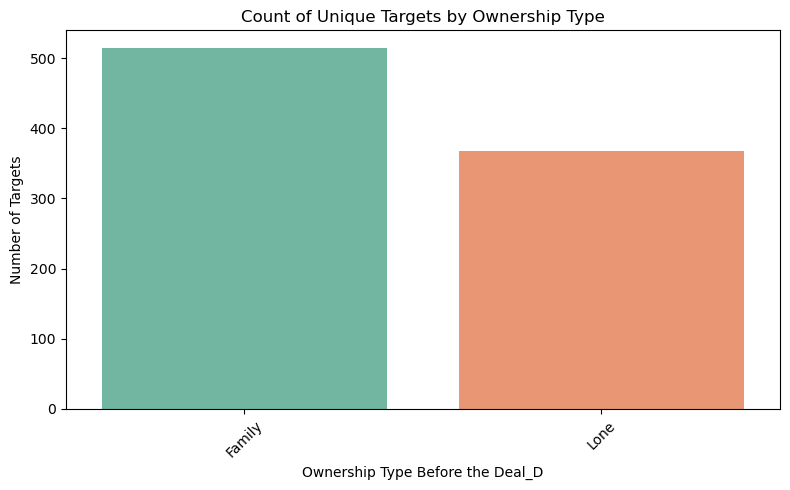

In [54]:
# Normalize text categories (remove spaces, make lowercase)
df['Ownership Type Before the Deal_D'] = df['Ownership Type Before the Deal_D'].str.strip().str.lower().str.title()

# Unique targets based on 'Target BvD ID Number_D'
# Drop duplicates so each target company is counted only once
unique_targets = df.drop_duplicates(subset='Target BvD ID Number_D')

# Normalize ownership type labels
unique_targets['Ownership Type Before the Deal_D'] = unique_targets['Ownership Type Before the Deal_D'].str.strip().str.lower().str.title()

# Count unique ownership types (not normalized)
target_ownership_counts = unique_targets['Ownership Type Before the Deal_D'].value_counts()

# Plot: Count of unique targets by Ownership Type
plt.figure(figsize=(8, 5))
sns.barplot(x=target_ownership_counts.index, y=target_ownership_counts.values, palette='Set2')
plt.title('Count of Unique Targets by Ownership Type')
plt.ylabel('Number of Targets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

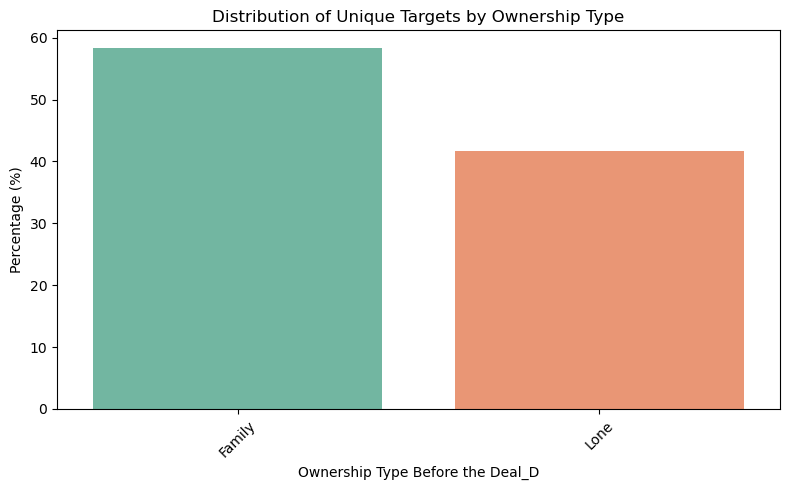

In [55]:
# Unique targets based on 'Target BvD ID Number_D'
# Drop duplicates so that each target company is counted only once
unique_targets = df.drop_duplicates(subset='Target BvD ID Number_D')

# Count and normalize ownership types (as percentages)
target_ownership_counts = unique_targets['Ownership Type Before the Deal_D'].value_counts(normalize=True) * 100

# Plot: Distribution of unique targets by Ownership Type
plt.figure(figsize=(8, 5))
sns.barplot(x=target_ownership_counts.index, y=target_ownership_counts.values, palette='Set2')
plt.title('Distribution of Unique Targets by Ownership Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis Of Unique Acquirors By Type

In [56]:
# Drop duplicate acquirors (based on unique ID or name)
unique_acquirors = df.drop_duplicates(subset='Acquiror Name_acquiror_A')

# Count unique acquirors by TYPE_A
type_counts_unique = unique_acquirors['TYPE_A'].value_counts()

# Compute percentages
type_summary_unique = pd.DataFrame({
    'Count': type_counts_unique,
    'Percentage': type_counts_unique / type_counts_unique.sum() * 100
})

# Display summary
display(type_summary_unique)

Count  Percentage
TYPE_A                                                     
Other (Corporate)                           305   33.080260
PE                                          169   18.329718
Other (Corporate-FB)                        138   14.967462
FO (Co-existing core business)               57    6.182213
Other (Holding)                              51    5.531453
FO (Financialized family)                    44    4.772234
Other (Individual)                           38    4.121475
Other (Asset Management)                     27    2.928416
Other (Bank)                                 20    2.169197
VC                                           12    1.301518
Other (Real Estate)                          11    1.193059
Other (Institution)                          10    1.084599
Other (Corporate PE-backed)                   8    0.867679
Other (Family)                                8    0.867679
Other (Club Deal)                             8    0.867679
Other (Fiduciary)                             6    0.650759
Other (Individual from prominent family)      6    0.650759
Other (Insurance)                             3    0.325380
Other (Accelerator)                           1    0.108460

In [57]:
total_acquirors = type_counts_unique.sum()
print("Total unique acquirors:", total_acquirors)

Total unique acquirors: 922


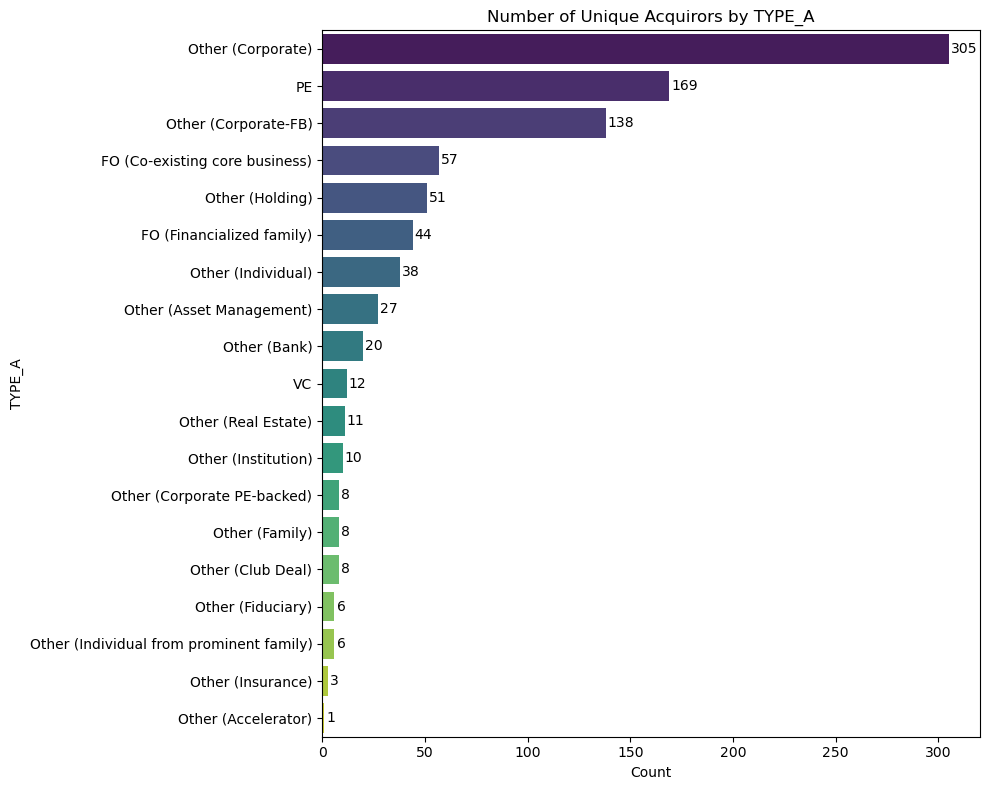

In [58]:
# Unique acquirors based on 'Acquiror Name_acquiror_A'
unique_acquirors = df.drop_duplicates(subset='Acquiror Name_acquiror_A')

# Count acquirors by TYPE_A (absolute counts)
acquiror_type_counts_abs = unique_acquirors['TYPE_A'].value_counts()

# Plot: Horizontal bar chart using counts
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    y=acquiror_type_counts_abs.index,
    x=acquiror_type_counts_abs.values,
    palette='viridis'
)

# Add count labels to each bar
for i, value in enumerate(acquiror_type_counts_abs.values):
    ax.text(value + 1, i, str(value), va='center')

# Labels and title
plt.xlabel('Count')
plt.ylabel('TYPE_A')
plt.title('Number of Unique Acquirors by TYPE_A')
plt.tight_layout()
plt.show()

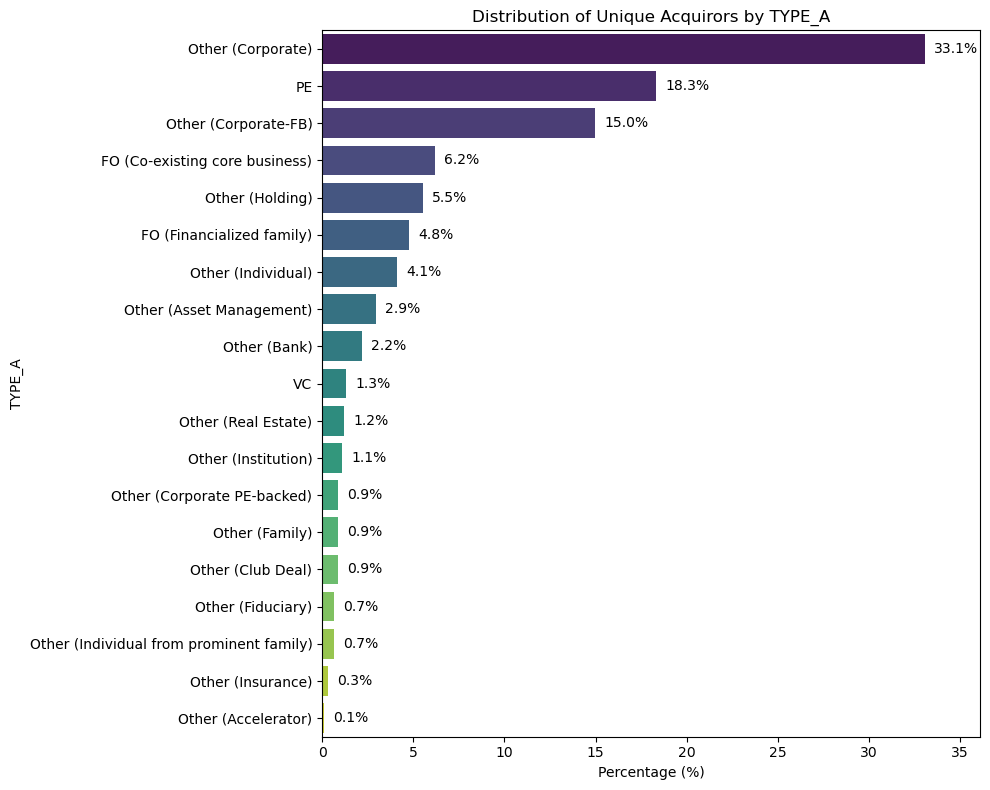

In [59]:
# Unique acquirors based on 'Acquiror Name_acquiror_A'
unique_acquirors = df.drop_duplicates(subset='Acquiror Name_acquiror_A')

# Count and normalize acquiror types (as percentages)
acquiror_type_counts = unique_acquirors['TYPE_A'].value_counts(normalize=True) * 100

# Plot: Horizontal bar chart with percentage labels
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    y=acquiror_type_counts.index,
    x=acquiror_type_counts.values,
    palette='viridis'
)

# Add percentage labels to each bar
for i, value in enumerate(acquiror_type_counts.values):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')

# Extend x-axis to prevent cutoff
plt.xlim(0, acquiror_type_counts.values.max() + 3)  # Add some buffer

# Labels and title
plt.xlabel('Percentage (%)')
plt.ylabel('TYPE_A')
plt.title('Distribution of Unique Acquirors by TYPE_A')
plt.tight_layout()
plt.show()

## Number Of Deals per Year

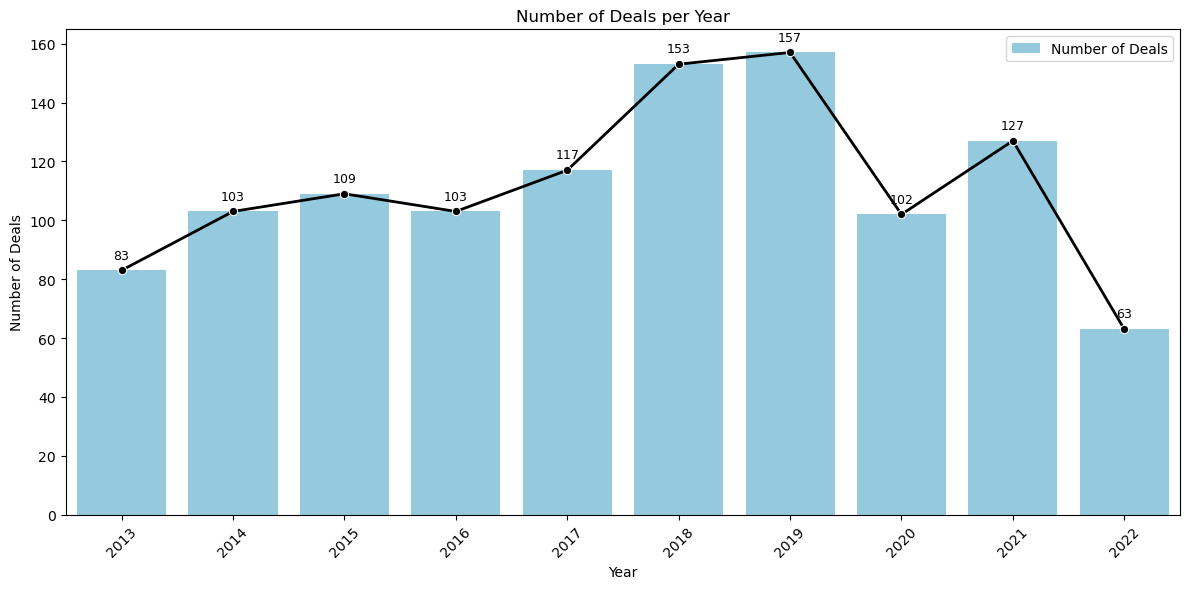

In [60]:
# Counted the number of deals per year and sorted by year
yearly_deals = df['Deal Year_D'].value_counts().sort_index()

# Converted year index to string for consistent x-axis labels
year_labels = [str(year) for year in yearly_deals.index]

# Created a combined bar and line plot
plt.figure(figsize=(12, 6))

# Plotted the line over the bars (no label to avoid duplicate in legend)
sns.lineplot(
    x=year_labels,
    y=yearly_deals.values,
    color='black',
    marker='o',
    linewidth=2
)

# Plotted the yearly deal distribution as bars
sns.barplot(
    x=year_labels,
    y=yearly_deals.values,
    color='skyblue',
    label='Number of Deals'
)

# Added value labels above each bar
for i, value in enumerate(yearly_deals.values):
    plt.text(i, value + 3, str(value), ha='center', va='bottom', fontsize=9)

# Final formatting
plt.title('Number of Deals per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Number Of Deals per Month

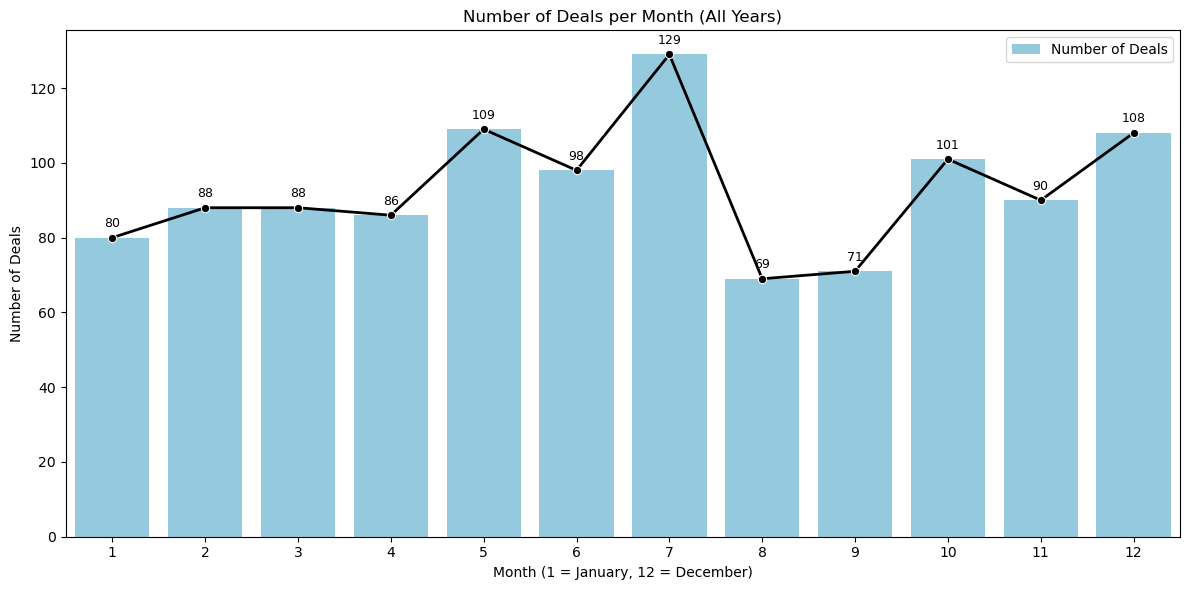

In [61]:
# Counted the number of deals per month (1–12)
monthly_deals = df['Deal Month_D'].value_counts().sort_index()

# Converted month numbers to string labels for x-axis
month_numbers = [str(i) for i in monthly_deals.index]

# Created a combined bar and line plot
plt.figure(figsize=(12, 6))

# Plotted the line over bars (no label in legend)
sns.lineplot(
    x=month_numbers,
    y=monthly_deals.values,
    color='black',
    marker='o',
    linewidth=2
)

# Plotted the monthly deal distribution as bars
sns.barplot(
    x=month_numbers,
    y=monthly_deals.values,
    color='skyblue',
    label='Number of Deals'
)

# Added value labels above each bar
for i, value in enumerate(monthly_deals.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=9)

# Final formatting
plt.title('Number of Deals per Month (All Years)')
plt.xlabel('Month (1 = January, 12 = December)')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

## Deal Value Over Time

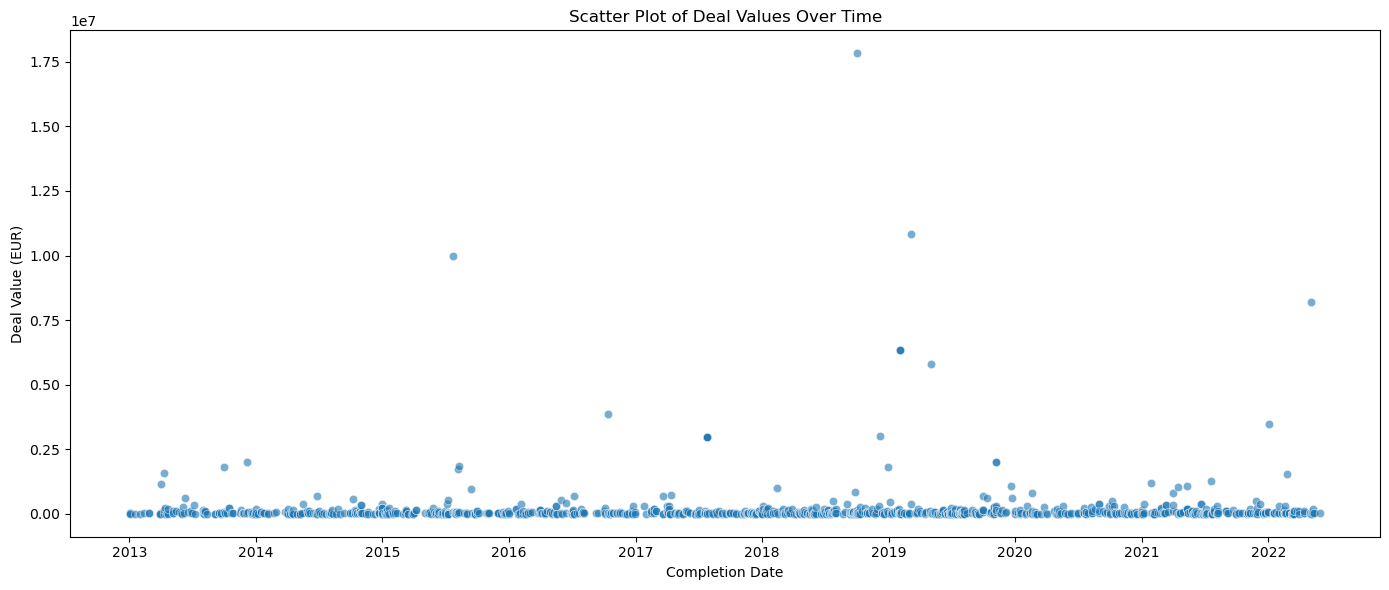

In [62]:
# Ensure the completion date is in datetime format
df['Completed/Assumed Completed Date_D'] = pd.to_datetime(df['Completed/Assumed Completed Date_D'])

# Sort the dataframe by date for better visual continuity
df_sorted = df.sort_values(by='Completed/Assumed Completed Date_D')

# Create the scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df_sorted,
    x='Completed/Assumed Completed Date_D',
    y='Deal Value_D',
    alpha=0.6  # transparency for overlapping points
)

# Add title and axis labels
plt.title('Scatter Plot of Deal Values Over Time')
plt.xlabel('Completion Date')
plt.ylabel('Deal Value (EUR)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Zoomed In

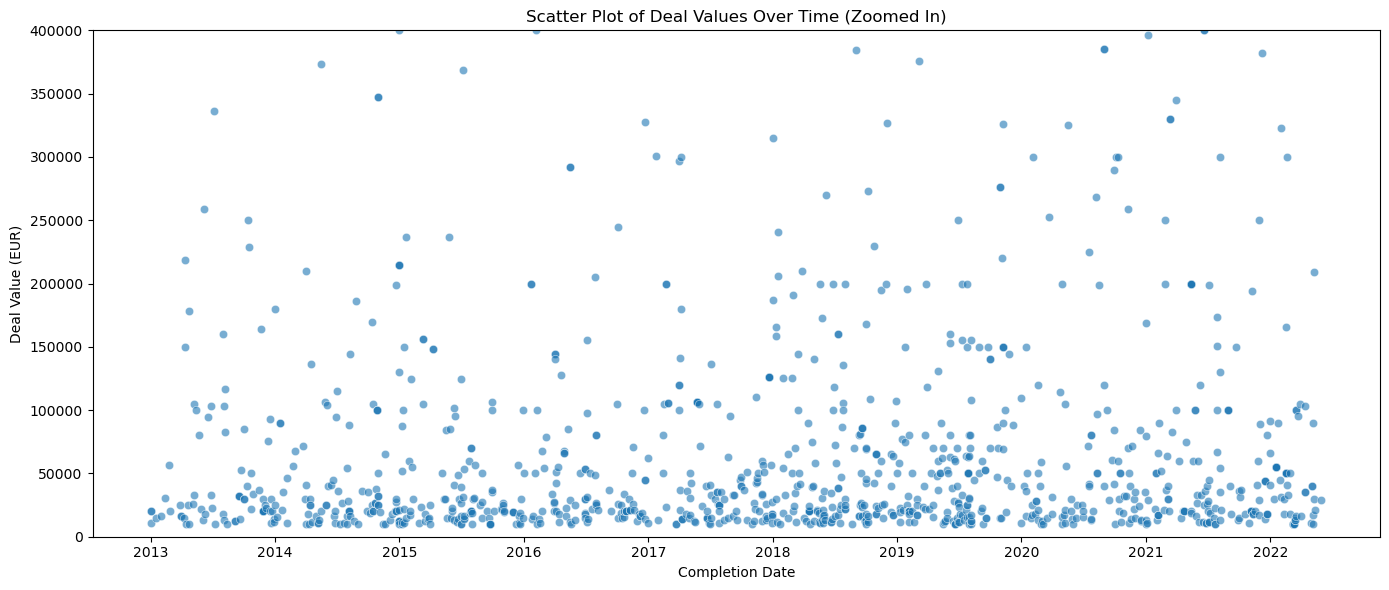

In [63]:
# Ensure the completion date is in datetime format
df['Completed/Assumed Completed Date_D'] = pd.to_datetime(df['Completed/Assumed Completed Date_D'])

# Sort the dataframe by date for better visual continuity
df_sorted = df.sort_values(by='Completed/Assumed Completed Date_D')

# Create the scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df_sorted,
    x='Completed/Assumed Completed Date_D',
    y='Deal Value_D',
    alpha=0.6  # transparency for overlapping points
)

# Limit y-axis to zoom in below the outliers
plt.ylim(0, 400000)

# Add labels and title
plt.title('Scatter Plot of Deal Values Over Time (Zoomed In)')
plt.xlabel('Completion Date')
plt.ylabel('Deal Value (EUR)')

# Adjust layout
plt.tight_layout()
plt.show()

## Classification And Distribution Of Deal Types

In [64]:
# View top unique deal types by frequency
deal_type_counts = df['Deal Type_D'].value_counts()
display(deal_type_counts.head(20))  # Show top 20 most frequent

Deal Type_D
Acquisition 100% \n                               104
Acquisition,Domestic,Private                       78
Acquisition,Cross border,Private                   71
Minority stake unknown % \n                        63
Acquisition 100% \nPatent sale                     47
Acquisition,Domestic,IBO,Private                   42
Institutional buy-out 100% \n                      25
Acquisition,Cross border,Transatlantic,Private     23
Acquisition,Domestic,IBI,Private                   18
Privately negotiated                               13
Divestment                                         12
Acquisition,Domestic,Buy & Build,Private           12
Acquisition,Cross border,IBO,Private               11
Acquisition,Domestic,Public                        11
Institutional buy-out 100% \nLeveraged buy out     11
Minority stake unknown % \nStart up                10
Share placement                                    10
Acquisition 70% \n                                  9
Acquisition,Dome

In [65]:
# Number of unique deal type combinations
n_unique_deal_types = df['Deal Type_D'].nunique()
print(f"Number of unique deal type combinations: {n_unique_deal_types}")

Number of unique deal type combinations: 346


In [66]:
# Define mapping rules using simple keyword matching
def classify_deal_type(deal_type):
    deal_type = deal_type.lower()
    if 'minority stake' in deal_type:
        return 'Minority Stake'
    elif 'institutional buy-out' in deal_type or 'buy-out' in deal_type:
        return 'Institutional Buyout'
    elif 'acquisition increased' in deal_type:
        return 'Acquisition Increased'
    elif 'acquisition' in deal_type:
        return 'Acquisition'
    elif 'share buyback' in deal_type:
        return 'Share Buyback'
    elif 'stock swap' in deal_type:
        return 'Stock Swap'
    elif 'divestment' in deal_type:
        return 'Divestment'
    else:
        return 'Other'

# Apply function to create a new column
df['Deal Type Category_D'] = df['Deal Type_D'].apply(classify_deal_type)

# Display unique values and counts
print(df['Deal Type Category_D'].value_counts())

# Reorder columns to place 'Deal Type Category' right after 'Deal Type_D'
cols = list(df.columns)
deal_type_idx = cols.index('Deal Type_D')
# Remove the new column if it already exists in the list to avoid duplication
cols.remove('Deal Type Category_D')
# Insert it right after 'Deal Type_D'
cols.insert(deal_type_idx + 1, 'Deal Type Category_D')
df = df[cols]

Deal Type Category_D
Acquisition              683
Minority Stake           181
Institutional Buyout     126
Acquisition Increased     73
Other                     31
Divestment                16
Stock Swap                 5
Share Buyback              2
Name: count, dtype: int64


In [67]:
# Filter and display unique Deal Type_D values classified as 'Other'
other_deal_types = df[df['Deal Type Category_D'] == 'Other']['Deal Type_D'].unique()
print(f"Number of unique 'Other' deal types: {len(other_deal_types)}")
for val in other_deal_types:
    print(val)

Number of unique 'Other' deal types: 5
Demerger,Domestic,Public
Share placement
Leveraged buyout
Privately negotiated
Management participation
Share placement


In [68]:
# Count unique Deal Type_D values classified as 'Other'
other_deal_type_counts = (
    df[df['Deal Type Category_D'] == 'Other']['Deal Type_D']
    .value_counts()
)

# Display result
print(f"Number of unique 'Other' deal types: {len(other_deal_type_counts)}")
print(other_deal_type_counts)

Number of unique 'Other' deal types: 5
Deal Type_D
Privately negotiated                         13
Share placement                              10
Leveraged buyout                              6
Demerger,Domestic,Public                      1
Management participation\nShare placement     1
Name: count, dtype: int64


In [69]:
# Update deal type classification with extra rules for custom 'Other' types
def classify_deal_type(deal_type):
    deal_type = deal_type.lower()

    if 'minority stake' in deal_type:
        return 'Minority Stake'
    elif 'institutional buy-out' in deal_type or 'buy-out' in deal_type:
        return 'Institutional Buyout'
    elif 'acquisition increased' in deal_type:
        return 'Acquisition Increased'
    elif 'acquisition' in deal_type:
        return 'Acquisition'
    elif 'share buyback' in deal_type:
        return 'Share Buyback'
    elif 'stock swap' in deal_type:
        return 'Stock Swap'
    elif 'divestment' in deal_type:
        return 'Divestment'
    elif 'demerger' in deal_type:
        return 'Demerger'
    elif 'management participation' in deal_type:
        return 'Management Participation'
    elif 'privately negotiated' in deal_type:
        return 'Privately Negotiated'
    elif 'share placement' in deal_type:
        return 'Share Placement'
    elif 'leveraged buyout' in deal_type:
        return 'Leveraged Buyout'
    else:
        return 'Other'
    
    # Apply function to create a new column
df['Deal Type Category_D'] = df['Deal Type_D'].apply(classify_deal_type)

# Display unique values and counts
print(df['Deal Type Category_D'].value_counts())

# Reorder columns to place 'Deal Type Category' right after 'Deal Type_D'
cols = list(df.columns)
deal_type_idx = cols.index('Deal Type_D')
# Remove the new column if it already exists in the list to avoid duplication
cols.remove('Deal Type Category_D')
# Insert it right after 'Deal Type_D'
cols.insert(deal_type_idx + 1, 'Deal Type Category_D')
df = df[cols]

Deal Type Category_D
Acquisition                 683
Minority Stake              181
Institutional Buyout        126
Acquisition Increased        73
Divestment                   16
Privately Negotiated         13
Share Placement              10
Leveraged Buyout              6
Stock Swap                    5
Share Buyback                 2
Demerger                      1
Management Participation      1
Name: count, dtype: int64


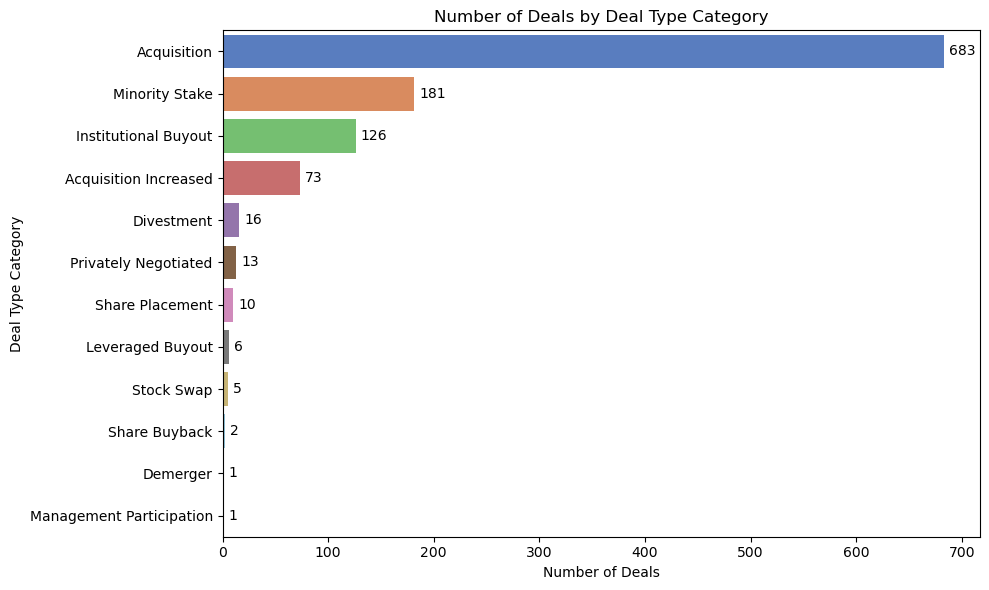

In [70]:
# Count frequency of each deal type category
deal_type_counts = df['Deal Type Category_D'].value_counts()

# Plot barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=deal_type_counts.values, y=deal_type_counts.index, palette="muted")

# Add count labels (normal weight, no bold)
for i, value in enumerate(deal_type_counts.values):
    ax.text(value + 5, i, str(value), va='center', ha='left', fontsize=10)

# Customize plot
plt.title("Number of Deals by Deal Type Category")
plt.xlabel("Number of Deals")
plt.ylabel("Deal Type Category")

# Remove vertical grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()


## Classification And Distribution Of Deal Payment Methods

In [71]:
# Define mapping logic for payment methods
def classify_payment_method(method):
    if pd.isna(method):
        return 'Unknown'
    
    method = method.lower()
    
    if 'cash' in method:
        return 'Cash'
    elif 'shares' in method:
        return 'Shares'
    elif 'deferred payment' in method or 'earn-out' in method:
        return 'Deferred / Earn-out'
    elif 'liabilities' in method:
        return 'Liabilities'
    elif 'convertible' in method:
        return 'Convertible Instruments'
    elif 'third party' in method:
        return 'Third Party Shares'
    else:
        return 'Other'

# Apply classification function to the payment method column
df['Payment Method Category_D'] = df['Deal Method of Payment_D'].apply(classify_payment_method)

# Reorder columns to place it right after 'Deal Method of Payment_D'
cols = list(df.columns)
payment_idx = cols.index('Deal Method of Payment_D')
cols.insert(payment_idx + 1, cols.pop(cols.index('Payment Method Category_D')))
df = df[cols]

In [72]:
# Count the number of deals per payment method category
payment_method_counts = df['Payment Method Category_D'].value_counts()

# Display the results
print("Number of deals by Payment Method Category:")
print(payment_method_counts)


Number of deals by Payment Method Category:
Payment Method Category_D
Cash                       596
Unknown                    374
Liabilities                 56
Deferred / Earn-out         34
Shares                      32
Other                       21
Convertible Instruments      4
Name: count, dtype: int64


In [73]:
# Filter the rows where the payment method was classified as 'Other'
other_payment_methods = df[df['Payment Method Category_D'] == 'Other']['Deal Method of Payment_D']

# Count the unique values within that subset
other_payment_method_counts = other_payment_methods.value_counts()

# Display the results
print("Unique payment method values classified as 'Other':")
print(other_payment_method_counts)

Unique payment method values classified as 'Other':
Deal Method of Payment_D
Equity            15
Converted Debt     5
Other              1
Name: count, dtype: int64


In [74]:
# Define mapping logic for payment methods
def classify_payment_method(method):
    if pd.isna(method):
        return 'Unknown'

    method = method.lower()

    if 'cash' in method:
        return 'Cash'
    elif 'shares' in method or 'equity' in method:
        return 'Shares'
    elif 'deferred payment' in method or 'earn-out' in method:
        return 'Deferred / Earn-out'
    elif 'liabilities' in method:
        return 'Liabilities'
    elif 'convertible' in method or 'converted debt' in method:
        return 'Convertible Instruments'
    elif 'third party' in method:
        return 'Third Party Shares'
    else:
        return 'Other'

# Apply classification function to the payment method column
df['Payment Method Category_D'] = df['Deal Method of Payment_D'].apply(classify_payment_method)

# Reorder columns to place it right after 'Deal Method of Payment_D'
cols = list(df.columns)
payment_idx = cols.index('Deal Method of Payment_D')
cols.insert(payment_idx + 1, cols.pop(cols.index('Payment Method Category_D')))
df = df[cols]

In [75]:
# Count the number of deals per payment method category
payment_method_counts = df['Payment Method Category_D'].value_counts()

# Display the results
print("Number of deals by Payment Method Category:")
print(payment_method_counts)

Number of deals by Payment Method Category:
Payment Method Category_D
Cash                       596
Unknown                    374
Liabilities                 56
Shares                      47
Deferred / Earn-out         34
Convertible Instruments      9
Other                        1
Name: count, dtype: int64


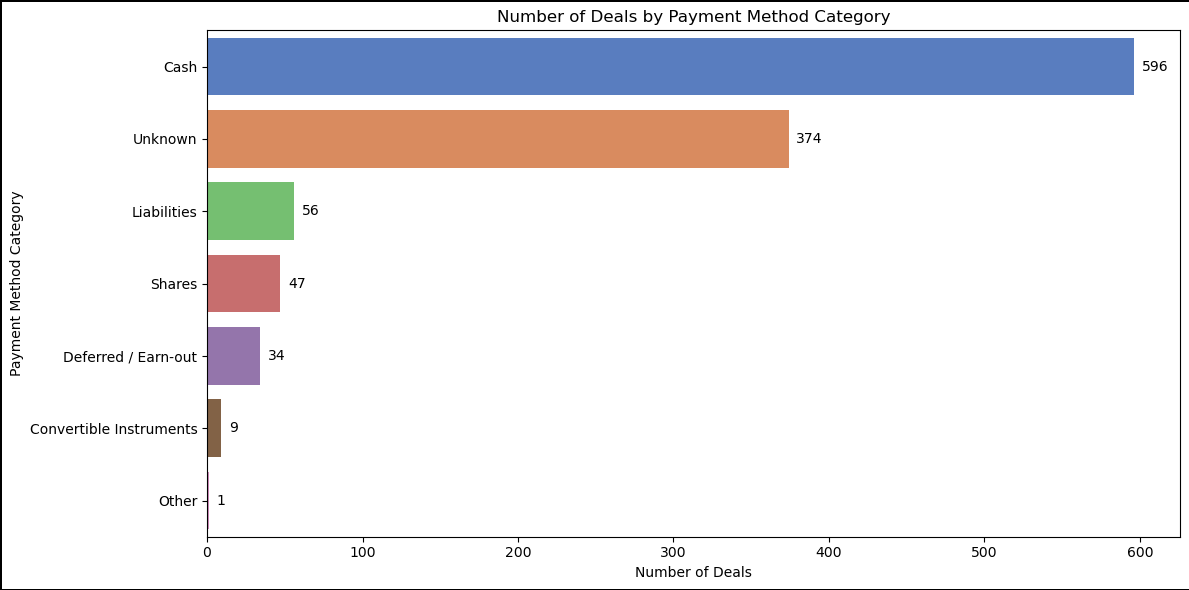

In [76]:
# Count frequency of each payment method category
payment_method_counts = df['Payment Method Category_D'].value_counts()

# Create figure and axis with a black border around the plot
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_edgecolor('black')   # Set border color
fig.patch.set_linewidth(1)         # Set border thickness

# Plot barplot (no black border on bars)
sns.barplot(
    x=payment_method_counts.values,
    y=payment_method_counts.index,
    palette='muted',
    ax=ax
)

# Customize titles and labels
ax.set_title("Number of Deals by Payment Method Category")
ax.set_xlabel("Number of Deals")
ax.set_ylabel("Payment Method Category")

# Add value labels to the right of the bars
for i, value in enumerate(payment_method_counts.values):
    ax.text(value + 5, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Heatmap Of Deal Types By Payment Method

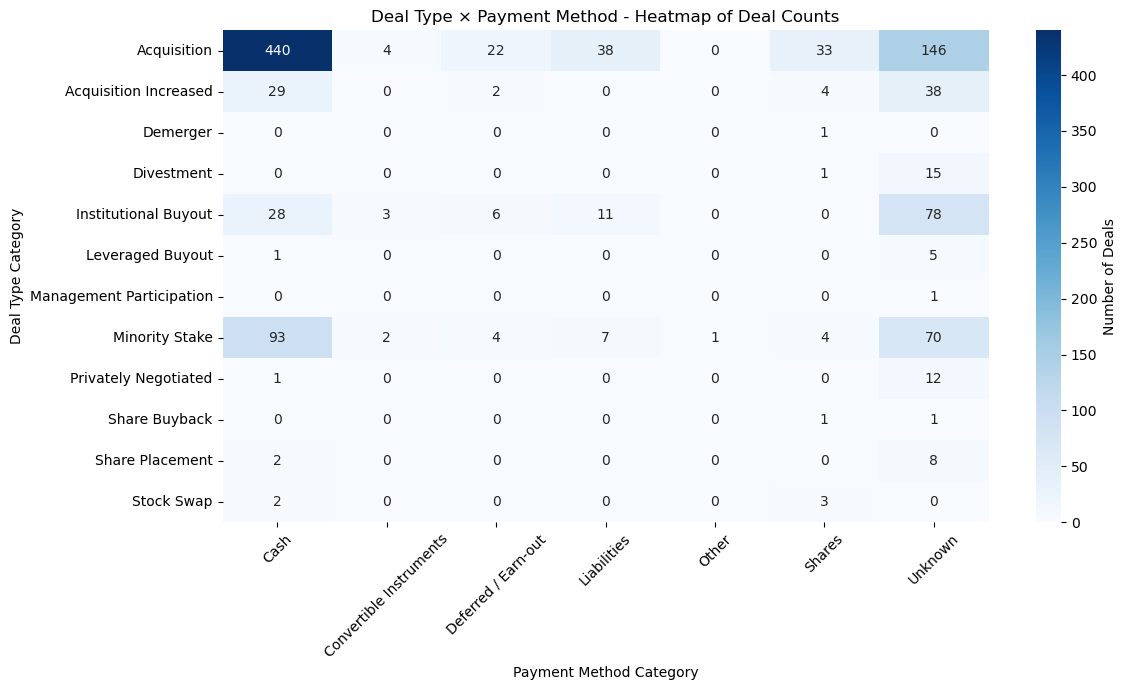

In [77]:
# Group by Deal Type and Payment Method
heatmap_data = df.groupby(['Deal Type Category_D', 'Payment Method Category_D']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Deals'})

plt.title('Deal Type × Payment Method - Heatmap of Deal Counts')
plt.xlabel('Payment Method Category')
plt.ylabel('Deal Type Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Heatmap Of Acquiror Types By Deal Type

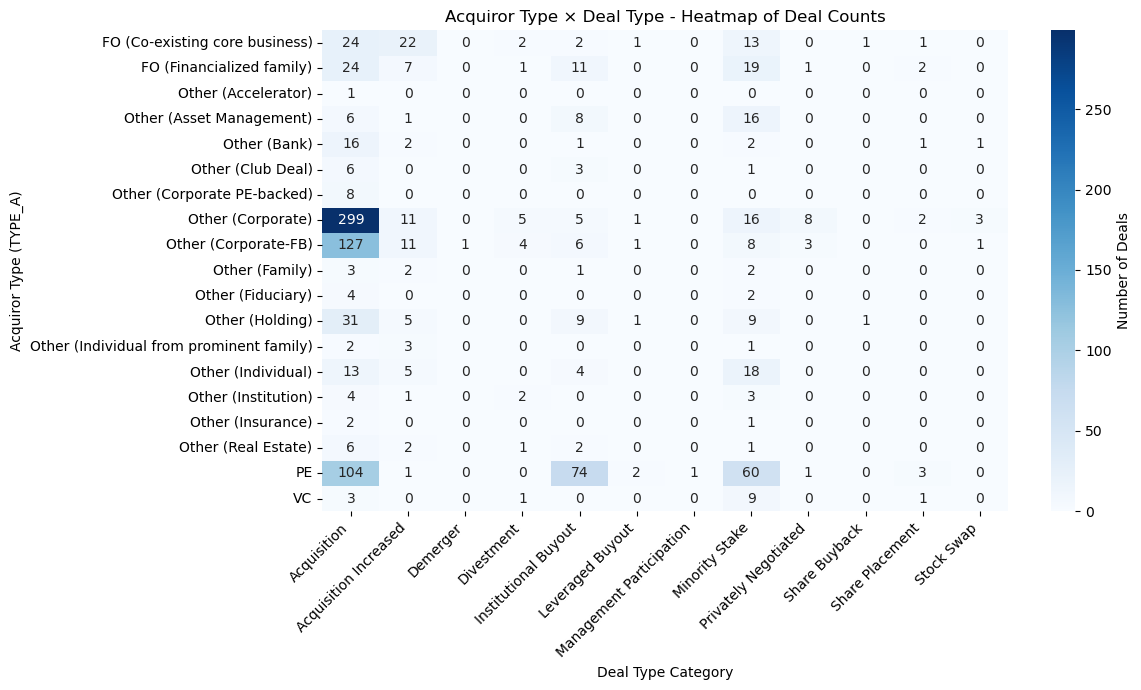

In [78]:
# Group and reshape data (invert the order of index and columns)
heatmap_acquiror_deal = df.groupby(['TYPE_A', 'Deal Type Category_D']).size().unstack(fill_value=0)

# Plot heatmap with 'Blues' palette
plt.figure(figsize=(12, 7))
sns.heatmap(
    heatmap_acquiror_deal,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar_kws={'label': 'Number of Deals'}
)

# Customize plot
plt.title('Acquiror Type × Deal Type - Heatmap of Deal Counts')
plt.xlabel('Deal Type Category')
plt.ylabel('Acquiror Type (TYPE_A)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Sankey Diagram Of Ownership Type To Acquiror Type (Interactive)

In [79]:
# Filtered valid rows
df_sankey = df[['Ownership Type Before the Deal_D', 'TYPE_A']].dropna()

# Counted flows between ownership and acquiror type
flow_counts = df_sankey.value_counts().reset_index(name='count')

# Built node list
labels = pd.Index(flow_counts['Ownership Type Before the Deal_D'].tolist() + flow_counts['TYPE_A'].tolist()).unique()
label_to_index = {label: i for i, label in enumerate(labels)}

# Converted labels to indices
source = flow_counts['Ownership Type Before the Deal_D'].map(label_to_index)
target = flow_counts['TYPE_A'].map(label_to_index)

# Plotted Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels.tolist(), pad=15, thickness=20),
    link=dict(source=source, target=target, value=flow_counts['count'])
)])
fig.update_layout(title_text="Sankey Diagram: Ownership Type → Acquiror Type", font_size=12)
fig.show()

## Distribution Of Unique Acquirors By Country

C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\662516352.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



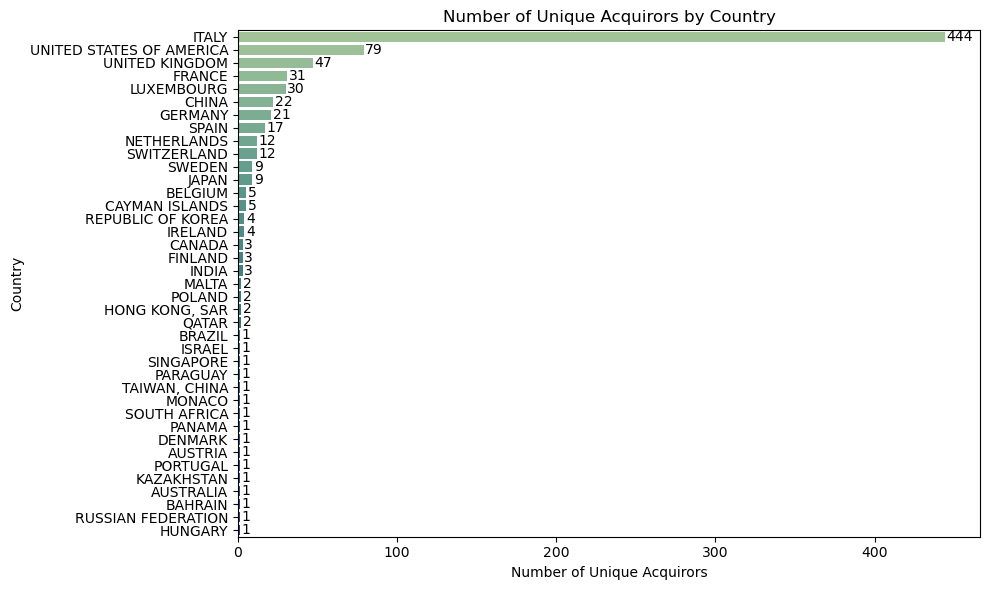

In [80]:
# Keep only unique acquirors based on their name
unique_acquirors = df.drop_duplicates(subset='Acquiror Name_acquiror_A')

# Normalize country names: remove leading/trailing spaces and convert to uppercase
unique_acquirors['Acquiror country_A'] = unique_acquirors['Acquiror country_A'].str.strip().str.upper()

# Count non-null values per country (only for unique acquirors)
country_counts = unique_acquirors['Acquiror country_A'].dropna().value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    y=country_counts.index,
    x=country_counts.values,
    palette='crest'
)

# Annotate bars with count values
for i, value in enumerate(country_counts.values):
    plt.text(value + 1, i, str(value), va='center')

# Set labels and title
plt.xlabel('Number of Unique Acquirors')
plt.ylabel('Country')
plt.title('Number of Unique Acquirors by Country')
plt.tight_layout()
plt.show()

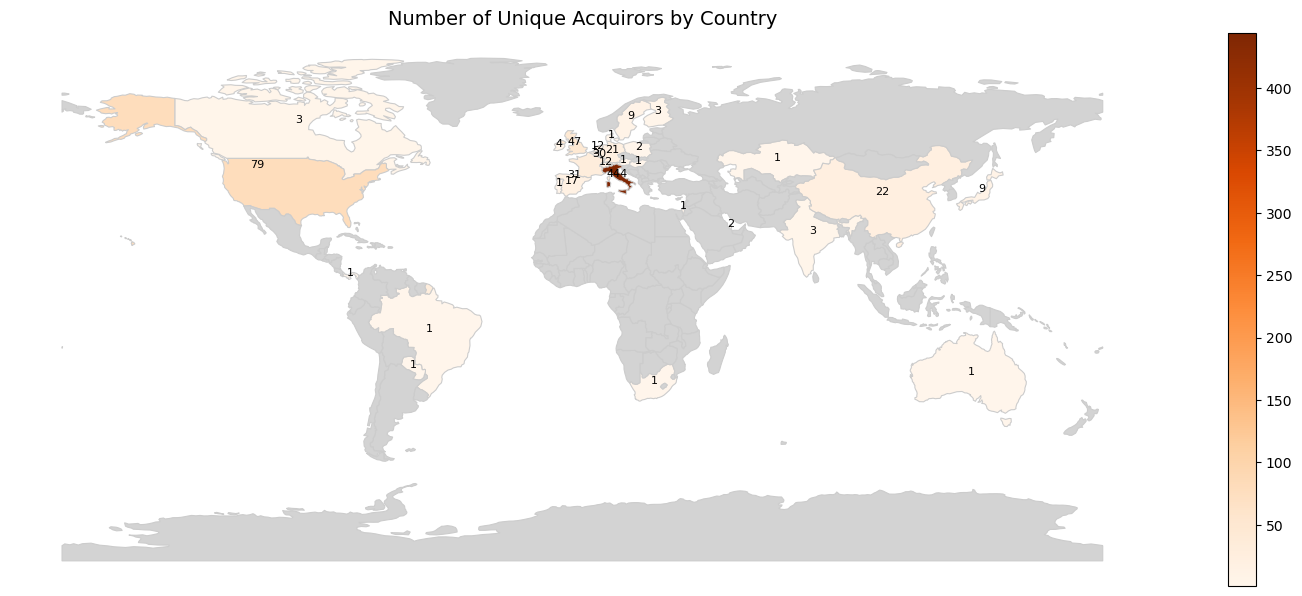

In [81]:
# Keep only unique acquirors based on their name
unique_acquirors = df.drop_duplicates(subset='Acquiror Name_acquiror_A')

# Count number of unique acquirors per country (standardized to uppercase)
country_counts = unique_acquirors['Acquiror country_A'].dropna().str.strip().str.upper().value_counts()

# Load world shapefile (Natural Earth dataset)
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Normalize country names to uppercase for matching
world['NAME'] = world['NAME'].str.upper()

# Convert counts to DataFrame and rename columns for merging
acq_df = country_counts.reset_index()
acq_df.columns = ['NAME', 'count']

# Merge acquiror counts with the world geometry
merged = world.merge(acq_df, on='NAME', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 6))
merged.plot(
    column='count',
    cmap='Oranges',
    linewidth=0.8,
    edgecolor='0.8',
    ax=ax,
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)

# Add text labels with the acquiror counts to each country
for idx, row in merged.iterrows():
    if pd.notnull(row['count']) and row.geometry.centroid.is_valid:
        ax.annotate(
            text=int(row['count']),
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            ha='center',
            fontsize=8,
            color='black'
        )

# Finalize the plot
ax.set_title("Number of Unique Acquirors by Country", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

### Interactive Map

In [82]:
# Make acquiror–country pairs unique (normalize both fields)
pairs = (
    df[['Acquiror Name_acquiror_A', 'Acquiror country_A']]
      .dropna(subset=['Acquiror country_A'])
      .assign(
          Acquiror_Name=lambda d: d['Acquiror Name_acquiror_A'].str.strip().str.upper(),
          Country      =lambda d: d['Acquiror country_A'].str.strip().str.upper()
      )
      .drop_duplicates(subset=['Acquiror_Name', 'Country'])
)

# Count UNIQUE acquirors per country
country_counts = (
    pairs['Country']
    .value_counts()
    .rename_axis('country')
    .reset_index(name='count')
)

# Plot (same Plotly choropleth, now with unique counts)
import plotly.express as px

fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale='YlGnBu',
    title='Number of Unique Acquirors by Country',
    projection='natural earth'
)
fig.show()

## Geographic Distribution Of Targets

## Target Country

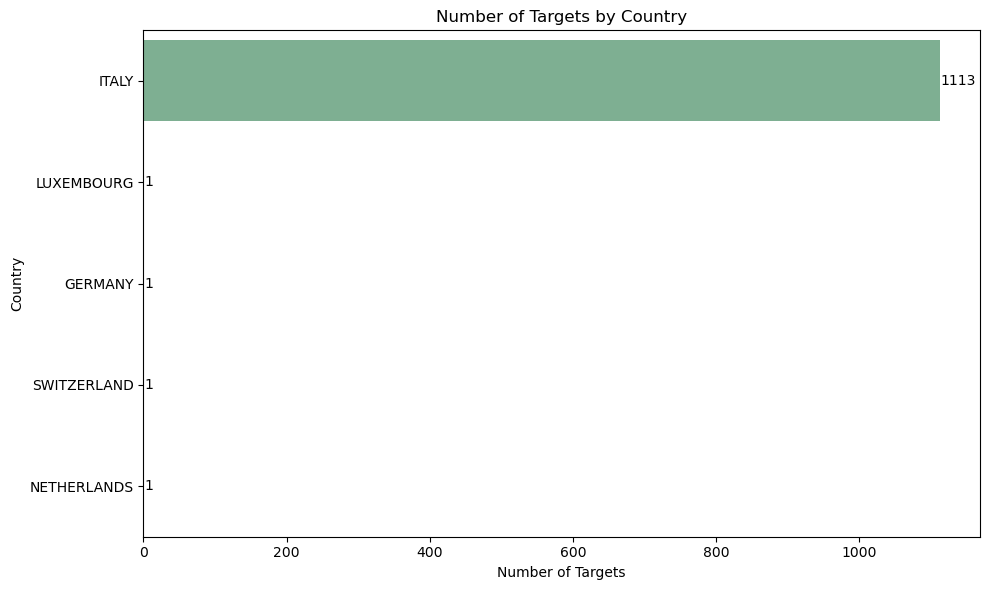

In [83]:
# Normalize country names: remove leading/trailing spaces and convert to uppercase
df['Country_T'] = df['Country_T'].str.strip().str.upper()

# Count non-null values
target_country_counts = df['Country_T'].dropna().value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    y=target_country_counts.index,
    x=target_country_counts.values,
    palette='crest'
)

# Annotate bars with count values
for i, value in enumerate(target_country_counts.values):
    plt.text(value + 1, i, str(value), va='center')

# Labels and title
plt.xlabel('Number of Targets')
plt.ylabel('Country')
plt.title('Number of Targets by Country')
plt.tight_layout()
plt.show()

In [84]:
# Extract cleaned values (i.e., region names) from NUTS columns
df['Zone'] = df['NUTS1_T'].str.extract(r'^[A-Z0-9]+ - (.+)')
df['Region'] = df['NUTS2_T'].str.extract(r'^[A-Z0-9]+ - (.+)')
df['Province'] = df['NUTS3_T'].str.extract(r'^[A-Z0-9]+ - (.+)')

# Get current list of column names
cols = df.columns.tolist()

# Find the positions of the original NUTS columns
i1 = cols.index('NUTS1_T') + 1
i2 = cols.index('NUTS2_T') + 1
i3 = cols.index('NUTS3_T') + 1

# Temporarily remove the new columns from the list
cols.remove('Zone')
cols.remove('Region')
cols.remove('Province')

# Insert each cleaned column right after its respective original
cols.insert(i1, 'Zone')
cols.insert(i2 + 1, 'Region')      # +1 because 'Zone' was already added
cols.insert(i3 + 2, 'Province')    # +2 because both 'Zone' and 'Region' were added

# Reorder the DataFrame columns
df = df[cols]

# Preview the updated structure
df[['NUTS1_T', 'Zone', 'NUTS2_T', 'Region', 'NUTS3_T', 'Province']].head()


NUTS1_T       Zone                NUTS2_T          Region  \
0  ITH - Northeast  Northeast  ITH5 - Emilia-Romagna  Emilia-Romagna   
1  ITH - Northeast  Northeast  ITH5 - Emilia-Romagna  Emilia-Romagna   
2  ITH - Northeast  Northeast  ITH5 - Emilia-Romagna  Emilia-Romagna   
3  ITC - Northwest  Northwest       ITC4 - Lombardia       Lombardia   
4              NaN        NaN                    NaN             NaN   

                         NUTS3_T               Province  
0                  ITH52 - Parma                  Parma  
1                  ITH52 - Parma                  Parma  
2                ITH57 - Ravenna                Ravenna  
3  ITC4D - Monza e della Brianza  Monza e della Brianza  
4                            NaN                    NaN

## Target Zone (NUTS1)

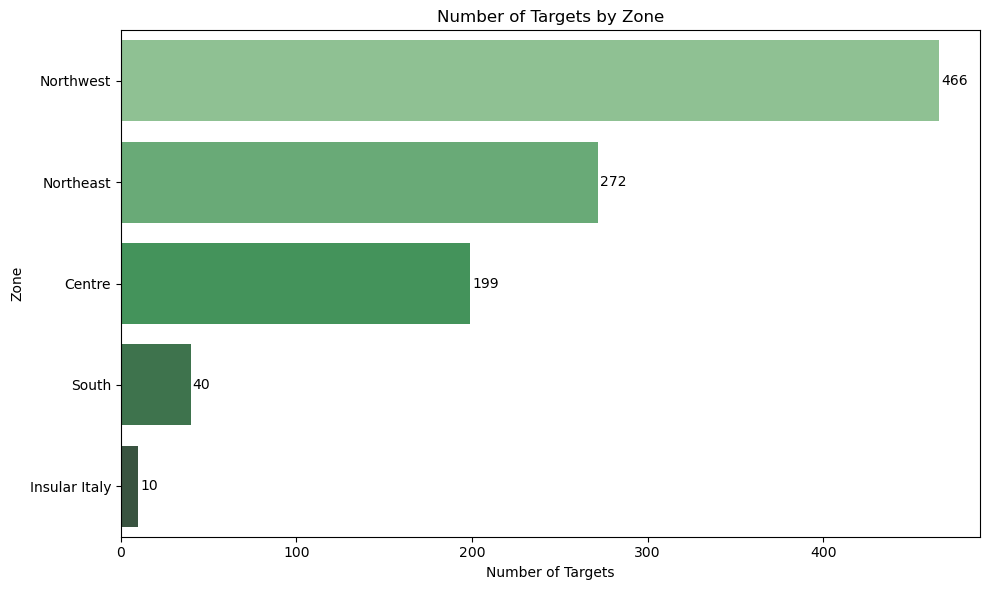

In [85]:
# Filter only Italian targets
df_italy = df[df['Country_T'] == 'ITALY']

# Count number of targets by Zone (NUTS1)
zone_counts = df_italy['Zone'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_counts.values, y=zone_counts.index, palette='Greens_d')
plt.xlabel("Number of Targets")
plt.ylabel("Zone")
plt.title("Number of Targets by Zone")
for i, v in enumerate(zone_counts.values):
    plt.text(v + 1, i, str(v), va='center')
plt.tight_layout()
plt.show()

## Target Region (NUTS2)

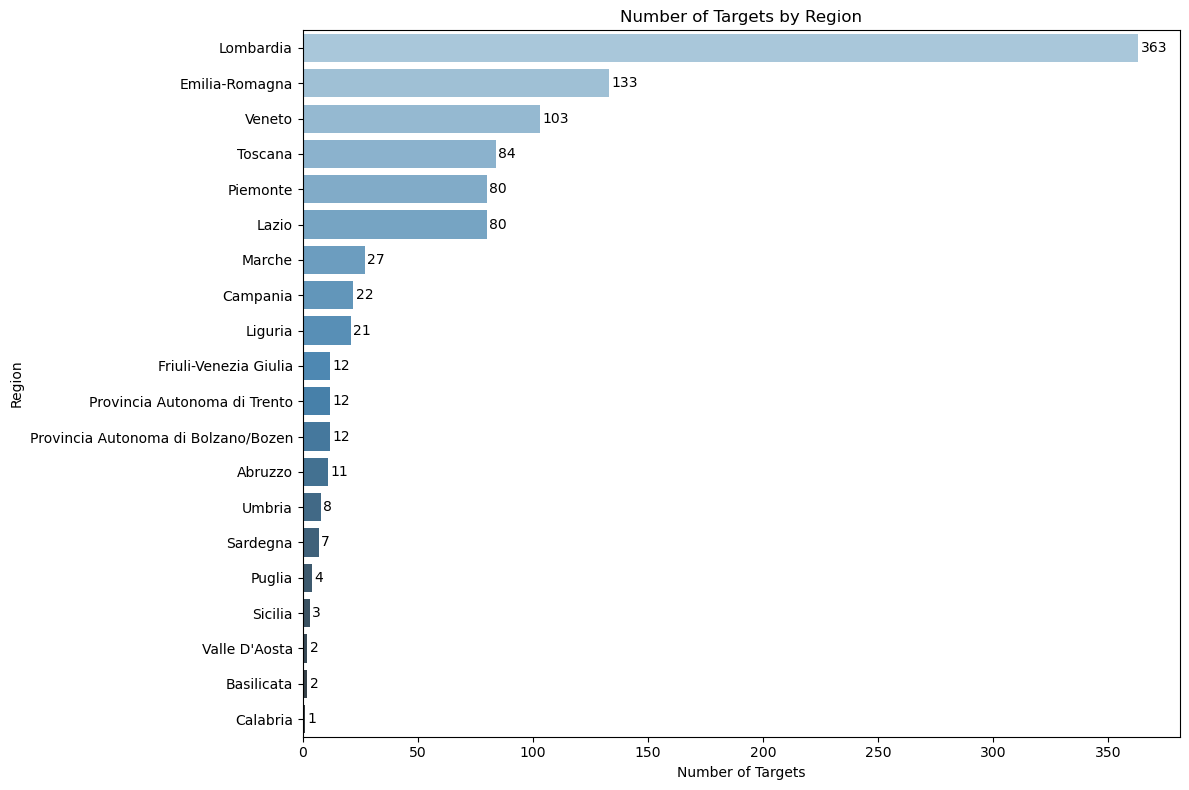

In [86]:
# Filter Italian targets
df_italy = df[df['Country_T'] == 'ITALY']

# Count number of targets by Region (NUTS2)
region_counts = df_italy['Region'].value_counts().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='Blues_d')
plt.xlabel("Number of Targets")
plt.ylabel("Region")
plt.title("Number of Targets by Region")
for i, v in enumerate(region_counts.values):
    plt.text(v + 1, i, str(v), va='center')
plt.tight_layout()
plt.show()

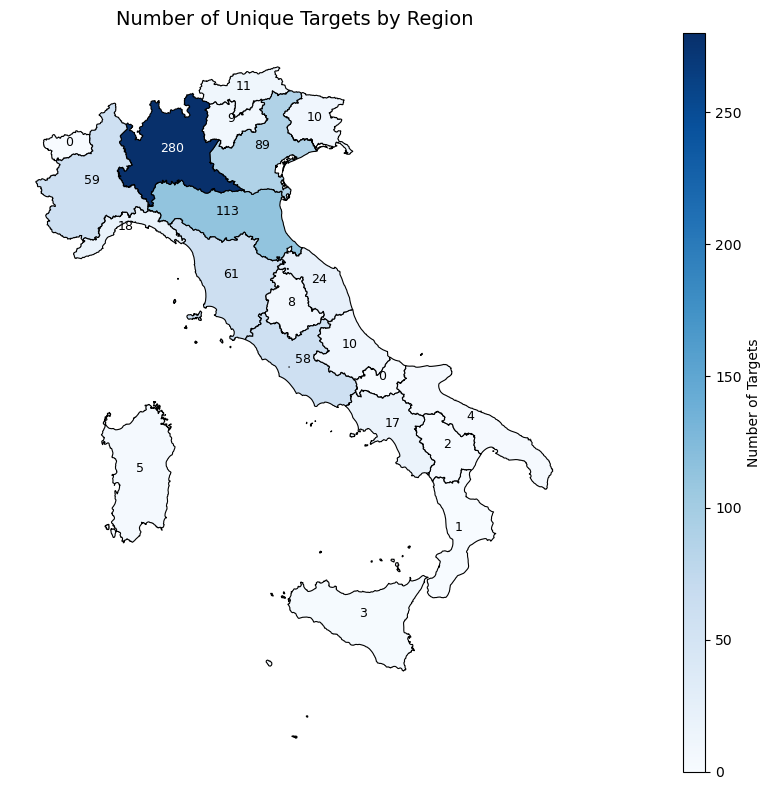

In [87]:
# Path to your local NUTS2 shapefile (download from Eurostat and unzip)
shapefile_path = "NUTS_RG_01M_2021_4326_LEVL_2.shp"

# Load NUTS2 shapefile
nuts2 = gpd.read_file(shapefile_path)

# Filter only Italian NUTS2 regions
nuts2_italy = nuts2[(nuts2['CNTR_CODE'] == 'IT') & (nuts2['LEVL_CODE'] == 2)]

# Count targets per region (your dataset)
unique_targets = df.drop_duplicates(subset='Target BvD ID Number_D')
region_counts = unique_targets[unique_targets['Country_T'] == 'ITALY']['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Target_Count']

# Merge shape with data
merged = nuts2_italy.merge(region_counts, how='left', left_on='NAME_LATN', right_on='Region')
merged['Target_Count'] = merged['Target_Count'].fillna(0)

# Create plot and extend colorbar
fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
box = ax.get_position()
cax.set_position([box.x1 + 0.01, box.y0 + 0.15, 0.02, box.height * 0.6])

# Color map
plot = merged.plot(column='Target_Count',
                   cmap='Blues',
                   linewidth=0.8,
                   edgecolor='black',
                   ax=ax,
                   legend=False)

# Custom colorbar
smap  = plt.cm.ScalarMappable(cmap='Blues',
                           norm=plt.Normalize(vmin=merged['Target_Count'].min(),
                                              vmax=merged['Target_Count'].max()))
smap ._A = []
cbar = fig.colorbar(smap , cax=cax, shrink=0.8)
cbar.set_label('Number of Targets')

# Annotate all regions, including those with 0
for idx, row in merged.iterrows():
    value = int(row['Target_Count'])
    color = 'white' if row['Region'] == 'Lombardia' else 'black'
    ax.annotate(text=value,
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', fontsize=9, color=color)

# Finalize
ax.set_title("Number of Unique Targets by Region", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

## Target Province (NUTS3)

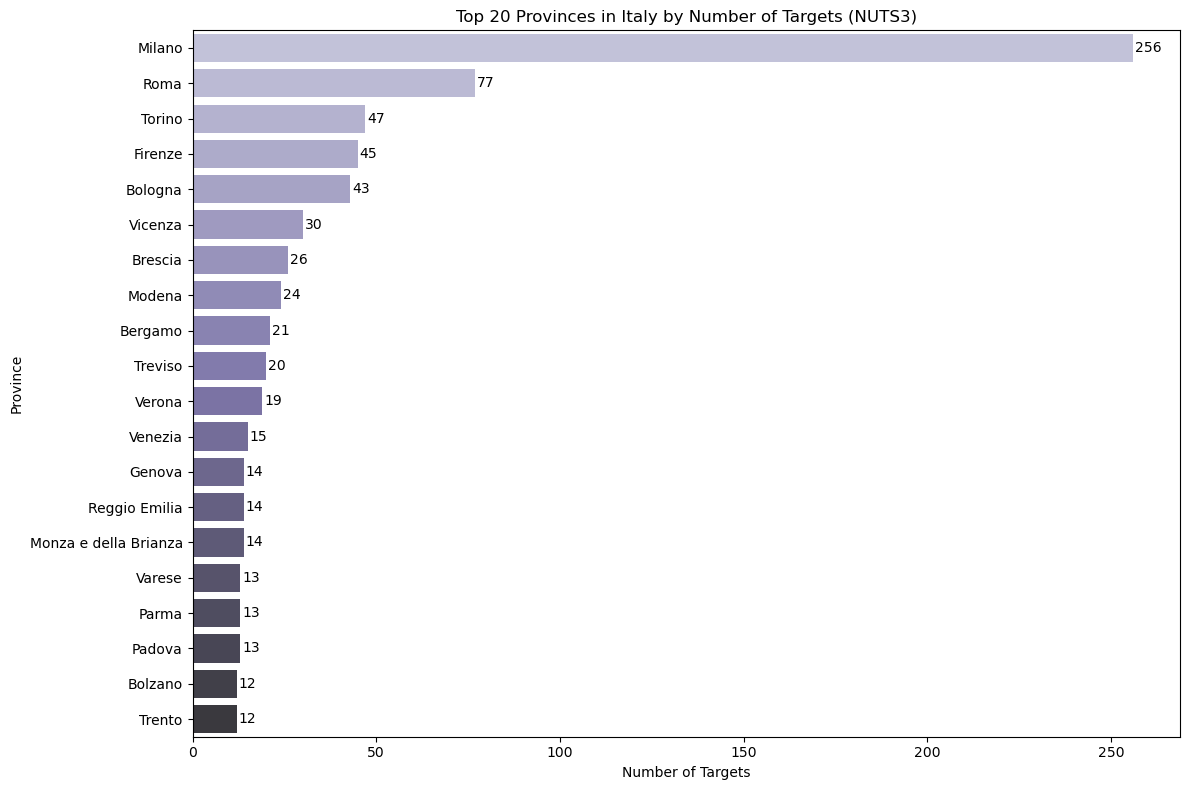

In [88]:
# Filter Italian targets
df_italy = df[df['Country_T'] == 'ITALY']

# Count number of targets by Province (NUTS3)
province_counts = df_italy['Province'].value_counts().sort_values(ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=province_counts.values, y=province_counts.index, palette='Purples_d')
plt.xlabel("Number of Targets")
plt.ylabel("Province")
plt.title("Top 20 Provinces in Italy by Number of Targets (NUTS3)")
for i, v in enumerate(province_counts.values):
    plt.text(v + 0.5, i, str(v), va='center')
plt.tight_layout()
plt.show()

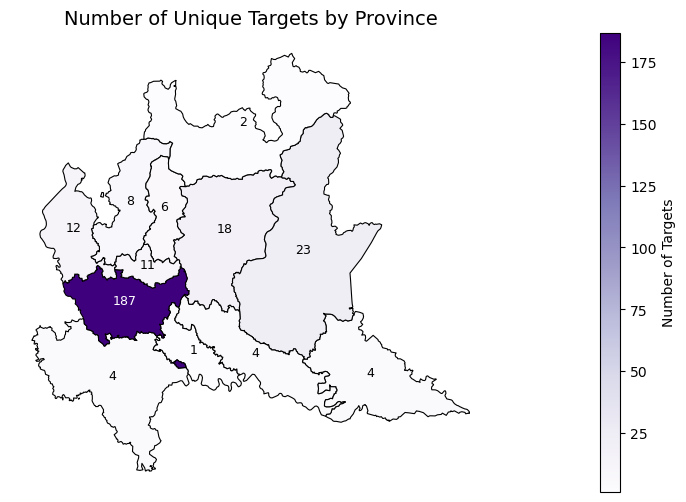

In [89]:
# Load NUTS3 shapefile (2021 level from Eurostat)
shapefile_path = "NUTS_RG_01M_2021_4326_LEVL_3.shp"
nuts3 = gpd.read_file(shapefile_path)

# Filter only Italian provinces at NUTS3 level
nuts3_italy = nuts3[(nuts3['CNTR_CODE'] == 'IT') & (nuts3['LEVL_CODE'] == 3)]

# Select only Lombardy provinces (NUTS_ID starting with 'ITC4')
lombardy_provinces = nuts3_italy[nuts3_italy['NUTS_ID'].str.startswith('ITC4')]

# Keep only unique targets by name
unique_targets = df.drop_duplicates(subset='Target BvD ID Number_D')

# Filter for unique targets located in Lombardy
df_lombardy = unique_targets[(unique_targets['Country_T'] == 'ITALY') & (unique_targets['Region'] == 'Lombardia')]

# Count number of unique targets per province
province_counts = df_lombardy['Province'].value_counts().reset_index()
province_counts.columns = ['Province', 'Target_Count']

# Merge province geometries with count data
merged = lombardy_provinces.merge(province_counts, how='left', left_on='NAME_LATN', right_on='Province')
merged['Target_Count'] = merged['Target_Count'].fillna(0)

# Create plot and allocate space for custom colorbar
fig, ax = plt.subplots(figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)

# Plot the choropleth map
merged.plot(column='Target_Count',
            cmap='Purples',
            linewidth=0.8,
            edgecolor='black',
            ax=ax,
            legend=False)

# Configure the colorbar using the same colormap scale
smap  = plt.cm.ScalarMappable(
    cmap='Purples',
    norm=plt.Normalize(vmin=merged['Target_Count'].min(), vmax=merged['Target_Count'].max())
)
smap ._A = []
cax.set_position([
    ax.get_position().x1 + 0.01,
    ax.get_position().y0 + 0.15,
    0.02,
    ax.get_position().height * 0.7
])
cbar = fig.colorbar(smap , cax=cax)
cbar.set_label("Number of Targets")

# Annotate each province with target count
for idx, row in merged.iterrows():
    value = int(row['Target_Count'])
    text_color = 'white' if row['Province'] == 'Milano' else 'black'
    ax.annotate(text=value,
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', fontsize=9, color=text_color)

# Final touches
ax.set_title("Number of Unique Targets by Province", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

## Sectoral Distribution Of Targets (NACE Classification)

In [90]:
# Keep only unique targets based on their name
unique_targets = df.drop_duplicates(subset='Target BvD ID Number_D')

# Remove missing values and compute value counts for NACE sections
nace_counts = (
    unique_targets['NACE Rev. 2 main section_T']
    .dropna()
    .value_counts()
    .reset_index()
)

# Rename columns for clarity
nace_counts.columns = ['NACE Section', 'Count']

# Compute percentage of total (normalized over valid entries)
nace_counts['Percentage'] = (nace_counts['Count'] / nace_counts['Count'].sum()) * 100

# Sort by descending count
nace_counts = nace_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the resulting table
nace_counts

NACE Section  Count  Percentage
0                                   C - Manufacturing    398   50.189155
1   M - Professional, scientific and technical act...     69    8.701135
2   G - Wholesale and retail trade; repair of moto...     61    7.692308
3                   J - Information and communication     60    7.566204
4              K - Financial and insurance activities     36    4.539723
5                      H - Transportation and storage     27    3.404792
6                                    F - Construction     26    3.278689
7   D - Electricity, gas, steam and air conditioni...     25    3.152585
8   N - Administrative and support service activities     19    2.395965
9                          L - Real estate activities     16    2.017654
10      I - Accommodation and food service activities     15    1.891551
11             R - Arts, entertainment and recreation     13    1.639344
12        Q - Human health and social work activities     12    1.513241
13  E - Water supply; sewerage, waste management a...      6    0.756620
14              A - Agriculture, forestry and fishing      4    0.504414
15                       S - Other service activities      3    0.378310
16                                      P - Education      1    0.126103
17  U - Activities of extraterritorial organisatio...      1    0.126103
18  O - Public administration and defence; compuls...      1    0.126103

## Overall Sectoral Distribution

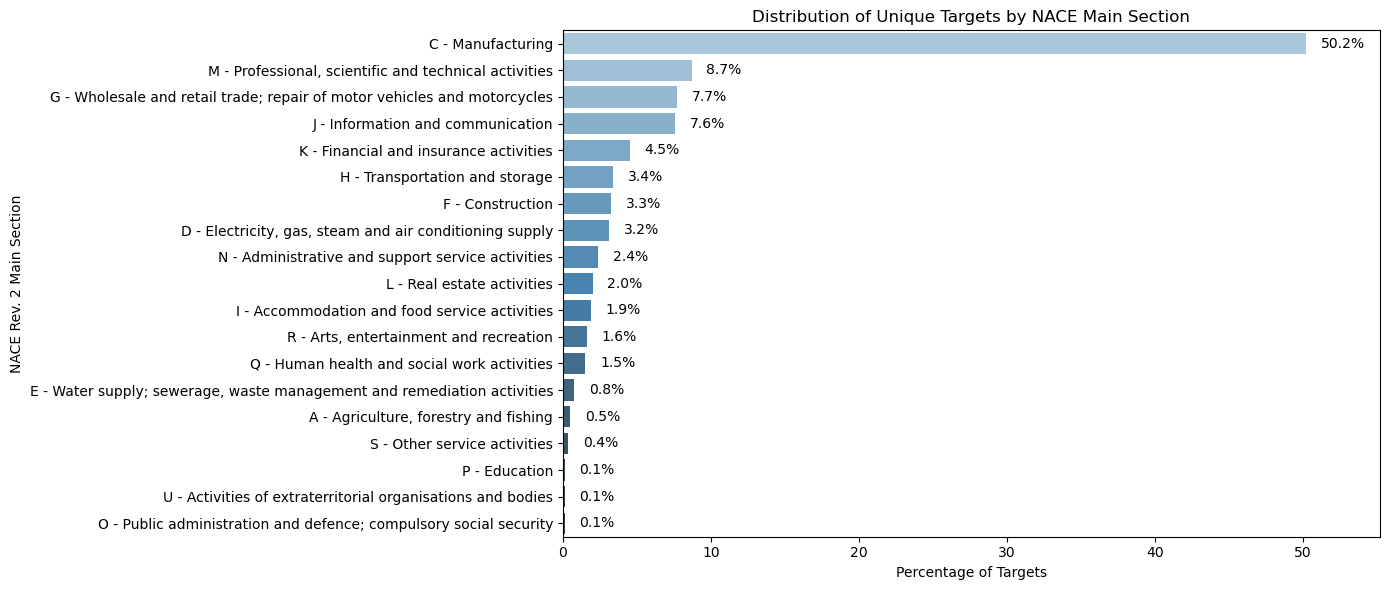

In [91]:
plt.figure(figsize=(14, 6)) 
sns.barplot(data=nace_counts, x='Percentage', y='NACE Section', palette='Blues_d')
plt.xlabel("Percentage of Targets")
plt.ylabel("NACE Rev. 2 Main Section")
plt.title("Distribution of Unique Targets by NACE Main Section")

# Adjust label position to avoid overlapping (shift further to the right)
for i, row in nace_counts.iterrows():
    plt.text(row['Percentage'] + 1.0, i, f"{row['Percentage']:.1f}%", va='center')  # was 0.5

# Optionally extend x-axis limit slightly to prevent clipping
plt.xlim(0, nace_counts['Percentage'].max() + 5)

plt.tight_layout()
plt.show()

## Sectoral Distribution By Ownership Type

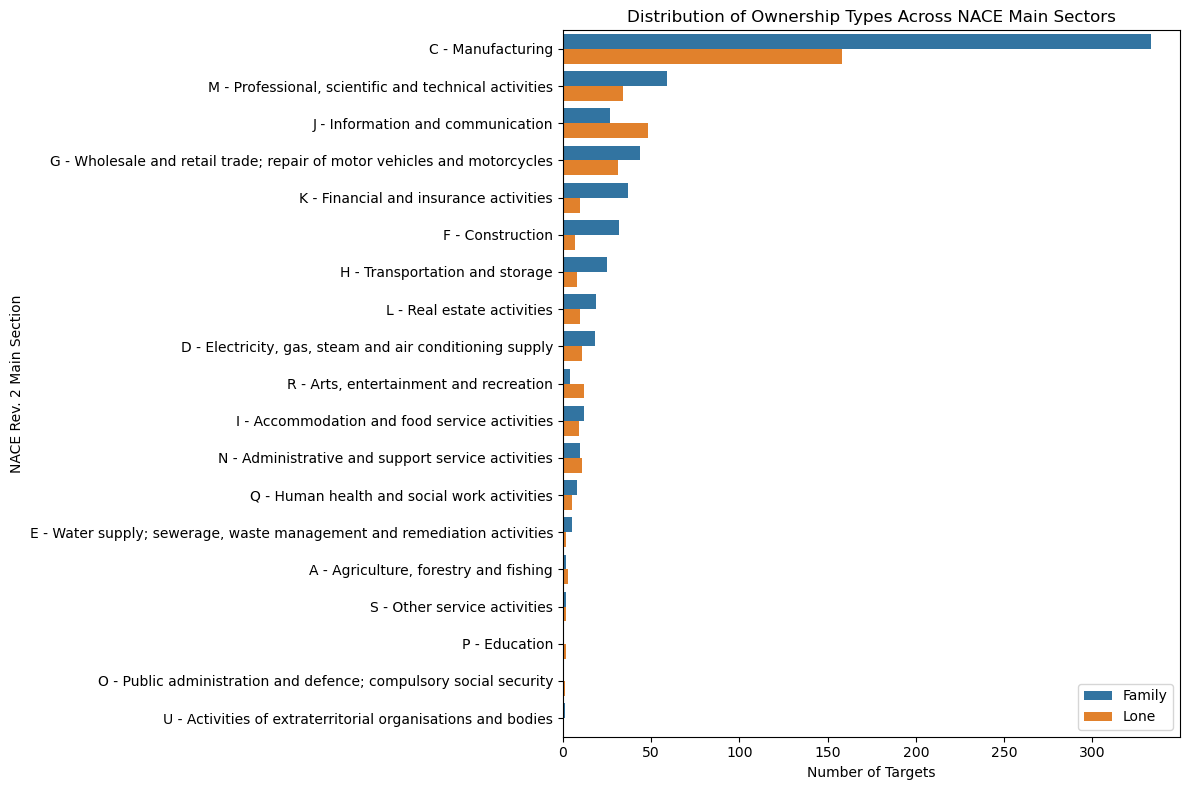

In [92]:
# Filtered only valid NACE and ownership values
filtered_df = df[['NACE Rev. 2 main section_T', 'Ownership Type Before the Deal_D']].dropna()

# Counted combinations of NACE sector and ownership type
ownership_counts = (
    filtered_df
    .value_counts()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

# Selected top 6 ownership types to keep plot clean
top_types = ownership_counts['Ownership Type Before the Deal_D'].value_counts().head(6).index
filtered_plot = ownership_counts[ownership_counts['Ownership Type Before the Deal_D'].isin(top_types)]

# Plotted grouped horizontal barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=filtered_plot,
    y='NACE Rev. 2 main section_T',
    x='Count',
    hue='Ownership Type Before the Deal_D',
    dodge=True
)

# Moved the legend to the lower right inside the plot
plt.legend(loc='lower right', frameon=True)

plt.title("Distribution of Ownership Types Across NACE Main Sectors")
plt.ylabel("NACE Rev. 2 Main Section")
plt.xlabel("Number of Targets")
plt.tight_layout()
plt.show()

## Cross-Tabulation Of Target Sectors And Acquiror Types

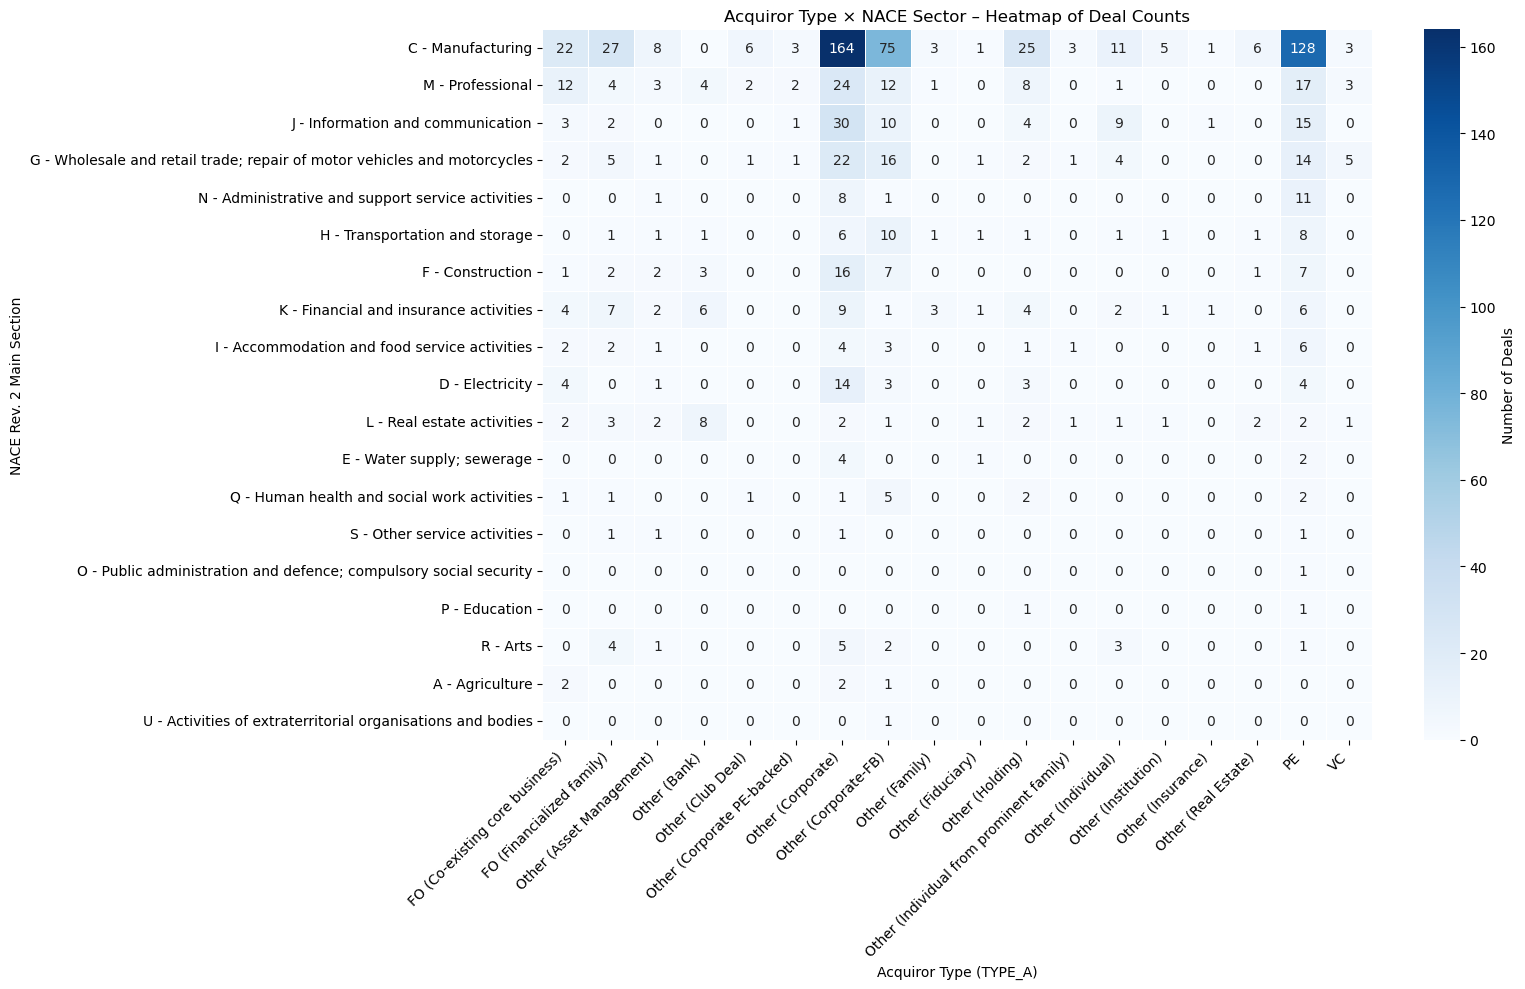

In [93]:
# Filtered valid NACE and acquiror type entries
filtered_df = df[['NACE Rev. 2 main section_T', 'TYPE_A']].dropna()

# Normalized NACE labels
filtered_df['NACE_clean'] = filtered_df['NACE Rev. 2 main section_T'].str.strip()
filtered_df['NACE_clean'] = filtered_df['NACE_clean'].str.extract(r'^([^,]+)')[0]

# Created crosstab of deal counts
heatmap_data = pd.crosstab(filtered_df['NACE_clean'], filtered_df['TYPE_A'])

# Sorted rows by deal volume involving PE (or change to FO, etc.)
heatmap_data = heatmap_data.sort_values(by='PE', ascending=False)

# Plotted heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Number of Deals'}
)

# Rotated x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.title("Acquiror Type × NACE Sector – Heatmap of Deal Counts")
plt.xlabel("Acquiror Type (TYPE_A)")
plt.ylabel("NACE Rev. 2 Main Section")
plt.tight_layout()
plt.show()

## Governance Characteristics of Target Firms: Directors, Managers, and Shareholders

### Convertion of data to integers

In [94]:
# Define governance columns
governance_cols = [
    'Number of directors & managers_T',
    'Number of current directors & managers_T',
    'Number of previous directors & managers_T',
    'No of shareholders_T'
]

# Convert to integers (where not missing)
df[governance_cols] = df[governance_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

### Summary statistics of governance variables

In [95]:
df[['Number of directors & managers_T', 'No of shareholders_T']].describe().T

count       mean        std  min   25%  \
Number of directors & managers_T  1117.0  36.761862  53.832665  0.0  15.0   
No of shareholders_T              1117.0   4.826321  12.249143  0.0   1.0   

                                   50%   75%    max  
Number of directors & managers_T  26.0  40.0  667.0  
No of shareholders_T               2.0   4.0  176.0

## Distribution and Outliers of Directors & Managers

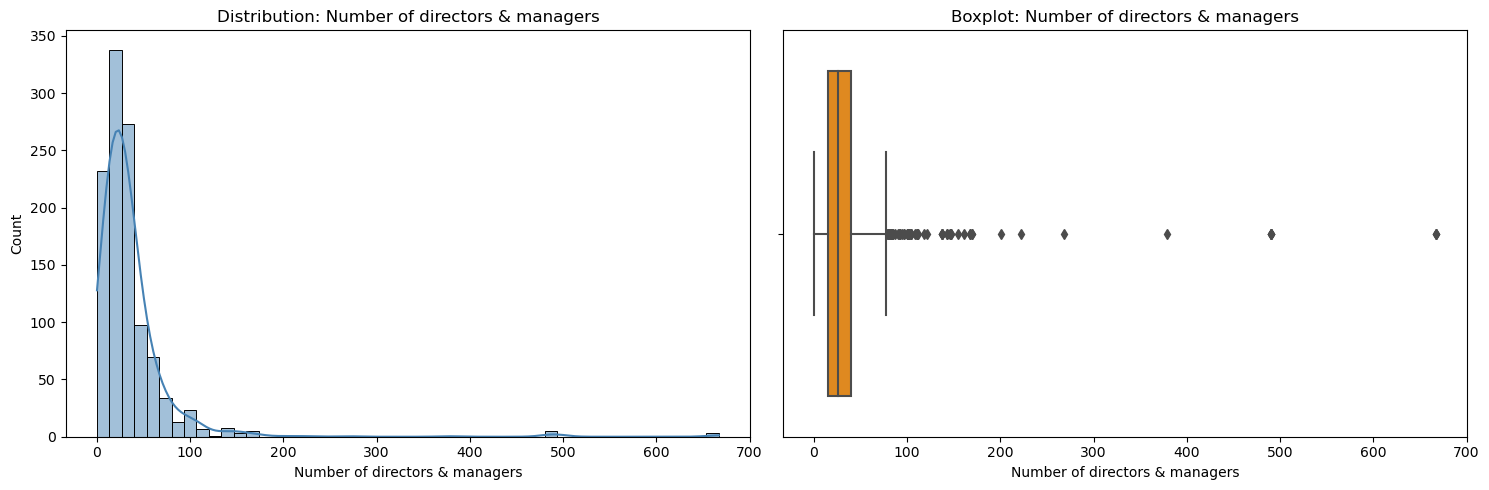

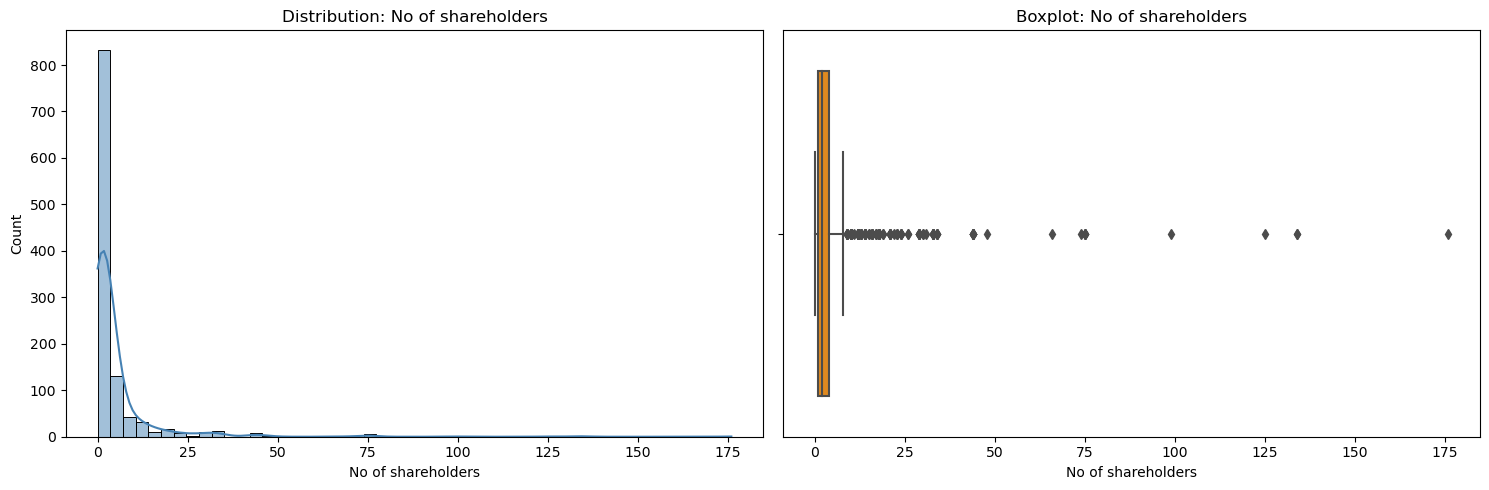

In [96]:
# Variables to plot
cols = ['Number of directors & managers_T', 'No of shareholders_T']

# Loop through each variable and generate a separate figure
for col in cols:
    clean_col = df[col].dropna().astype(float)

    # Cleaned name for title/labels
    clean_name = col.replace('_T', '')

    plt.figure(figsize=(15, 5))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(clean_col, bins=50, kde=True, color='steelblue')
    plt.title(f'Distribution: {clean_name}')
    plt.xlabel(clean_name)
    plt.ylabel("Count")
    plt.grid(False)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=clean_col, color='darkorange')
    plt.title(f'Boxplot: {clean_name}')
    plt.xlabel(clean_name)
    plt.grid(False)

    plt.tight_layout()
    plt.show()

## Relationship Between Directors/Managers and Shareholders

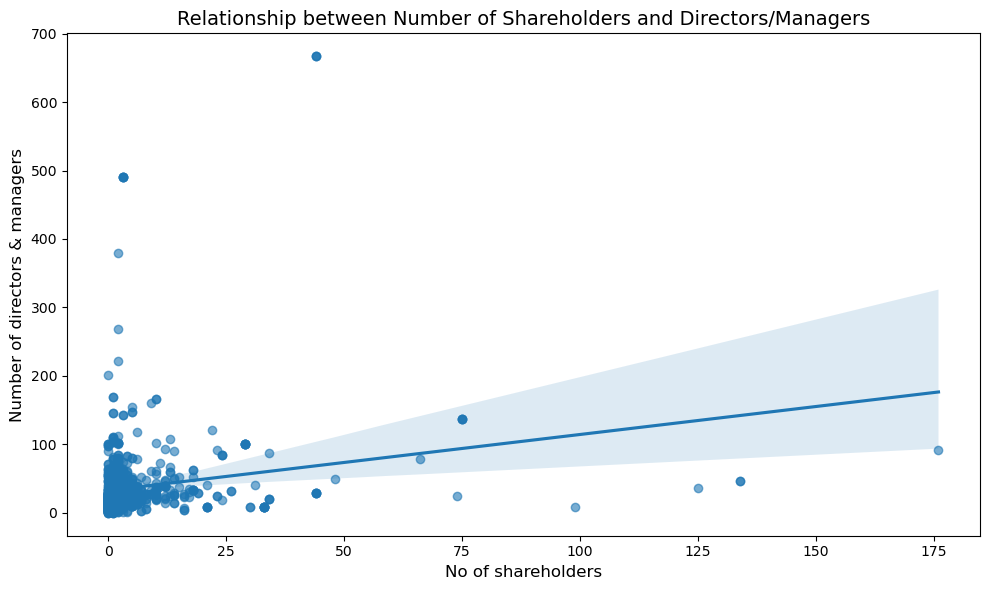

In [97]:
# Convert and clean the data
x = df['No of shareholders_T'].dropna().astype(float)
y = df['Number of directors & managers_T'].dropna().astype(float)

# Align both Series to keep only rows where both values are present
data = df[['No of shareholders_T', 'Number of directors & managers_T']].dropna().astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='No of shareholders_T', y='Number of directors & managers_T', data=data, scatter_kws={'alpha':0.6})
plt.title('Relationship between Number of Shareholders and Directors/Managers', fontsize=14)
plt.xlabel('No of shareholders', fontsize=12)
plt.ylabel('Number of directors & managers', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

## Analysis of Target's Financial Data

### Construction Of Time-Relative Financial Variables For Target Firms

In [98]:
def extract_time_relative_series(df, metric_keyword, deal_year_col='Deal Year_D', suffix='_T', prefix=None):
    """
    Creates deal-year-aligned financial series columns (t+2 to t-2) for a given metric.

    Parameters:
    - df: DataFrame with deal year and financial columns
    - metric_keyword: string identifying the metric in column names (e.g. 'ROE using Net income')
    - deal_year_col: column containing the deal year (default = 'Deal Year_D')
    - suffix: expected suffix for target columns (default = '_T')
    - prefix: optional prefix for new columns (defaults to first word in metric_keyword)

    Returns:
    - df with new columns added and reordered from t+2 to t-2
    """
    # 1. Find matching financial columns by keyword and suffix
    metric_cols = [col for col in df.columns if metric_keyword in col and col.endswith(suffix)]

    # 2. Extract year from each column name using regex
    year_col_map = {}
    for col in metric_cols:
        match = re.search(r'(\d{4})', col)
        if match:
            year = int(match.group(1))
            year_col_map[year] = col

    # 3. Define the base name for new columns
    base = prefix if prefix else metric_keyword.split()[0].strip()

    # 4. Create new columns for t+1 to t-1 (in this order)
    new_cols = []
    for offset in [1, 0, -1]:
        new_col = f"{base}_t{offset:+d}"
        new_cols.append(new_col)
        df[new_col] = df.apply(
            lambda row: row[year_col_map.get(int(row[deal_year_col]) + offset)]
            if pd.notna(row[deal_year_col]) and (int(row[deal_year_col]) + offset) in year_col_map
            else None,
            axis=1
        )

    # 5. Reorder the new columns to appear at the end in desired order (t+1 ➝ t-1)
    other_cols = [col for col in df.columns if col not in new_cols]
    df = df[other_cols + new_cols]

    return df

#### Application To Multiple Financial Metrics

In [99]:
# Define a list of (metric_keyword, prefix) tuples
metrics_to_process = [
    ('ROE using Net income', 'ROE'),
    ('ROA using Net income', 'ROA'),
    ('EBITDA\nm EUR', 'EBITDA'),
    ('EBITDA margin', 'EBITDA_margin'),
    ('Operating revenue (Turnover)', 'Revenue'),
    ('P/L for period [=Net income]', 'NetIncome'),
    ('Gearing', 'Gearing'),
    ('Number of employees', 'Employees')
]

# Apply the function for each metric
for keyword, prefix in metrics_to_process:
    df = extract_time_relative_series(df, keyword, prefix=prefix)

## Time-Relative Trends of Financial Indicators

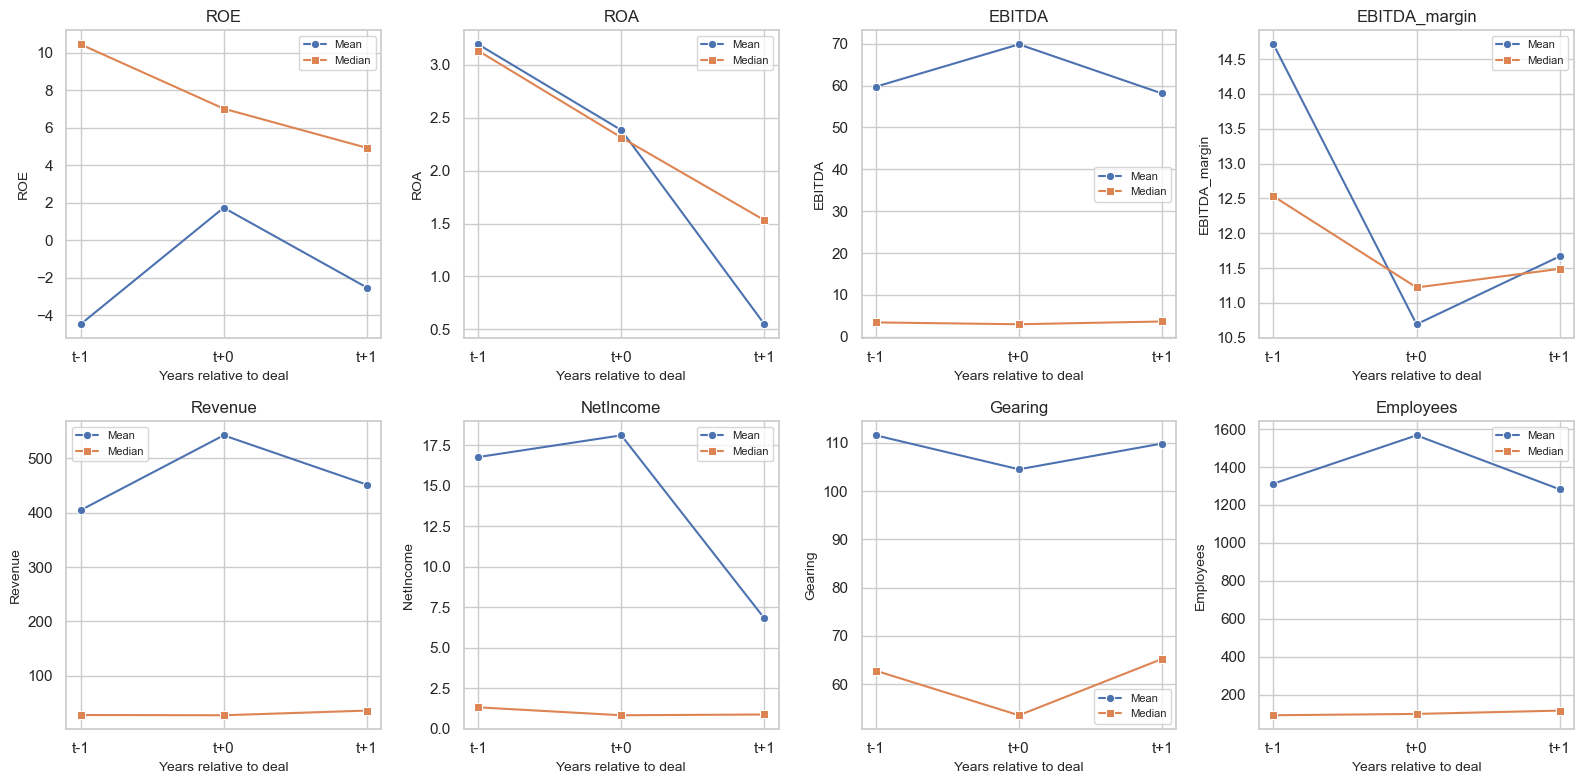

In [100]:
# Configure plotting style
sns.set(style='whitegrid')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12

# Prefixes to visualize
prefixes = ['ROE', 'ROA', 'EBITDA', 'EBITDA_margin', 'Revenue', 'NetIncome', 'Gearing', 'Employees']

# Time range (relative to deal)
timepoints = ['t-1', 't+0', 't+1']

# Create figure with subplots: 2 rows, 4 columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  
axes = axes.flatten()  # flatten array to loop easily

for i, prefix in enumerate(prefixes):
    cols = [f'{prefix}_{t}' for t in timepoints]

    # Drop rows with all NaNs
    df_subset = df[cols].dropna(how='all')

    # Compute mean and median
    means = df_subset[cols].mean(skipna=True)
    medians = df_subset[cols].median(skipna=True)

    # Plot on the corresponding subplot
    ax = axes[i]
    sns.lineplot(x=timepoints, y=means.values, marker='o', label='Mean', ax=ax)
    sns.lineplot(x=timepoints, y=medians.values, marker='s', label='Median', ax=ax)
    ax.set_title(f'{prefix}')
    ax.set_xlabel('Years relative to deal')
    ax.set_ylabel(prefix)
    ax.legend(fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()


## Time-Relative Trends by Ownership Type

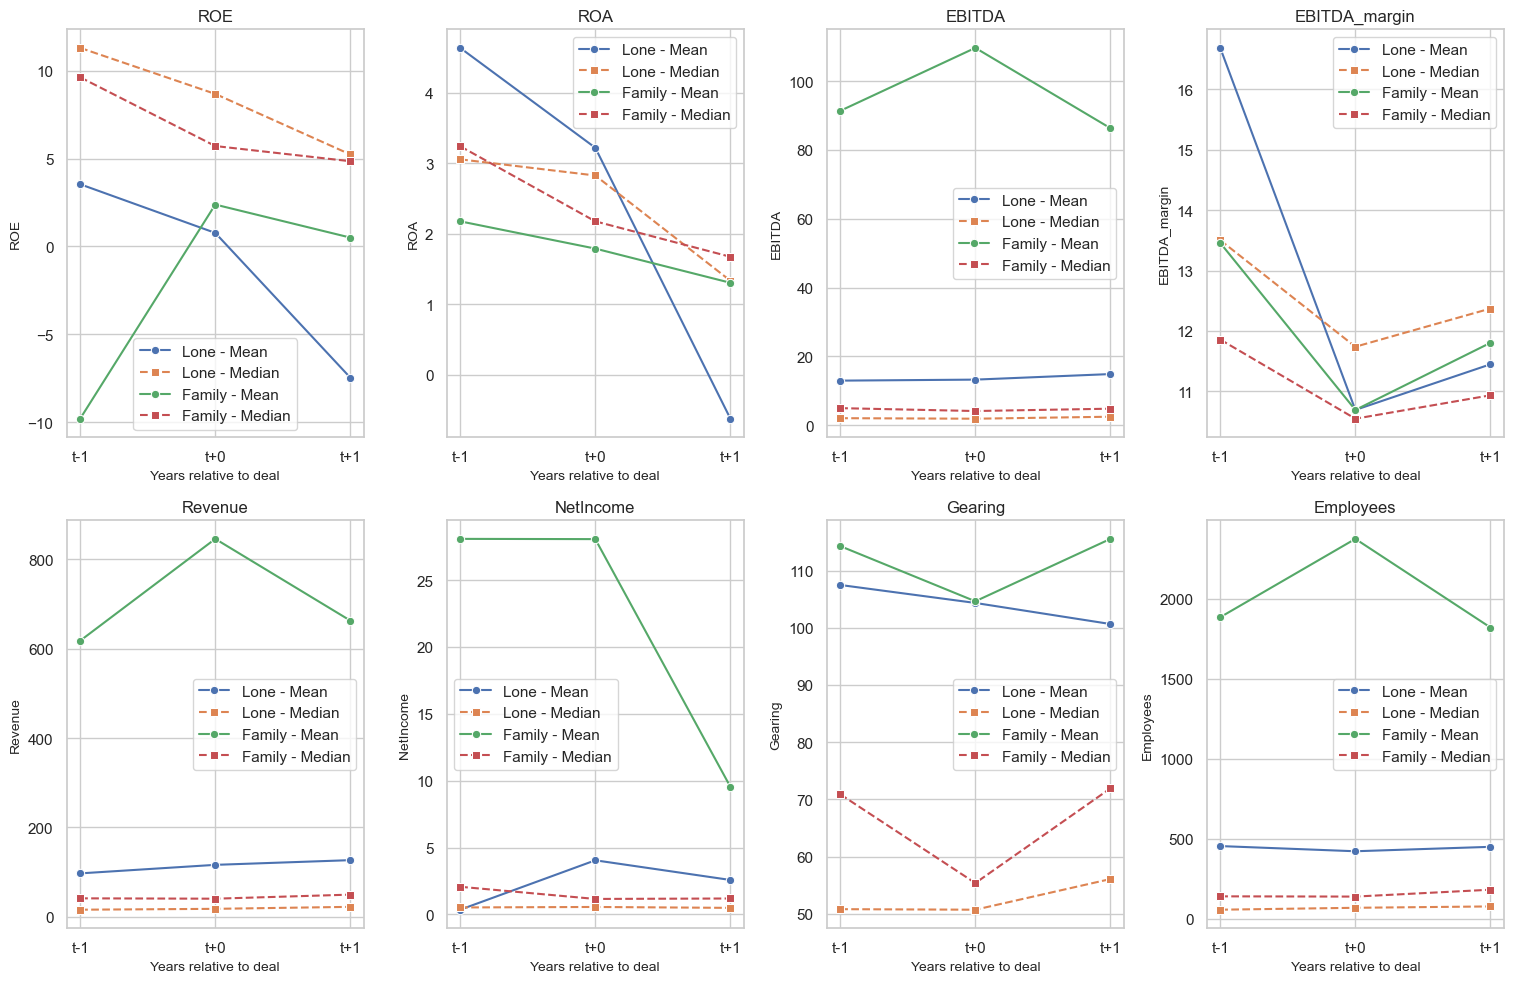

In [101]:
# Column used for ownership groups
group_col = 'Ownership Type Before the Deal_D'

# Extract unique ownership groups (you can filter them if there are too many)
ownership_groups = df[group_col].dropna().unique()

# Define metrics (prefixes) and timepoints
prefixes = ['ROE', 'ROA', 'EBITDA', 'EBITDA_margin', 'Revenue', 'NetIncome', 'Gearing', 'Employees']
timepoints = ['t-1', 't+0', 't+1']

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12

# Create subplot grid: 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, prefix in enumerate(prefixes):
    cols = [f'{prefix}_{t}' for t in timepoints]
    ax = axes[i]

    # Plot mean and median trend for each ownership group
    for group in ownership_groups:
        df_group = df[df[group_col] == group]
        df_subset = df_group[cols].dropna(how='all')

        means = df_subset.mean(skipna=True)
        medians = df_subset.median(skipna=True)

        sns.lineplot(x=timepoints, y=means.values, marker='o', ax=ax, label=f'{group} - Mean')
        sns.lineplot(x=timepoints, y=medians.values, marker='s', linestyle='--', ax=ax, label=f'{group} - Median')

    # Title and axis labels
    ax.set_title(f'{prefix}')
    ax.set_xlabel('Years relative to deal')
    ax.set_ylabel(prefix)

# Adjust layout to leave space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


<br>

# Sample Selection: Private Equity and Family Office Transactions

### Removing Deals from 2013 and 2014

In [102]:
# Store the initial number of rows before filtering
initial_row_count = df.shape[0]

# Remove rows where Deal Year is 2013 or 2014
df = df[~df['Deal Year_D'].isin([2013, 2014])]

# Store the number of rows after filtering
final_row_count = df.shape[0]

# Calculate and print how many rows were removed
removed_rows = initial_row_count - final_row_count
print(f"Removed {removed_rows} rows corresponding to deals from 2013 and 2014.")

Removed 186 rows corresponding to deals from 2013 and 2014.


In [103]:
df

Deal_ID      Source_D Completed/Assumed Completed Date_D  Deal Year_D  \
186       196        Zephyr                         2015-01-08         2015   
187       197        Zephyr                         2015-01-09         2015   
188       198  Mergermarket                         2015-01-09         2015   
189       199        Zephyr                         2015-01-10         2015   
190       201        Zephyr                         2015-01-13         2015   
...       ...           ...                                ...          ...   
1112     1184  Mergermarket                         2022-05-06         2022   
1113     1185        Zephyr                         2022-05-10         2022   
1114     1186  Mergermarket                         2022-05-10         2022   
1115     1187  Mergermarket                         2022-05-12         2022   
1116     1188        Zephyr                         2022-05-31         2022   

      Deal Month_D              Target Name_D  \
186              1             RACCORTUBI SPA   
187              1               ABAFOODS SRL   
188              1                 IBF S.p.A.   
189              1      BORGHESI ADVISORY SRL   
190              1       MEDIASET PREMIUM SPA   
...            ...                        ...   
1112             5                Isem S.r.l.   
1113             5               ASSITECA SPA   
1114             5        Grand Hotel La Pace   
1115             5               Videotec SPA   
1116             5  GIORGIO FEDON & FIGLI SPA   

                          Target Business Description_D  \
186   Bolts and nuts manufacturer, Forged fittings m...   
187             Organic plant-based drinks manufacturer   
188   Italy-based company engaged in manufacturing o...   
189                         Financial advisory services   
190   Pay-per-view cable television broadcasting ser...   
...                                                 ...   
1112  Italy-based packaging company specialized in r...   
1113                       Insurance brokerage services   
1114                    five stars Hotel in Montecatini   
1115             Italy-based video surveillance company   
1116  Bags manufacturer, Contact lens solution manuf...   

     Target Listing Situation_D  Target CF_D Target BvD ID Number_D  ...  \
186                    Unlisted  00747640159          IT00747640159  ...   
187                    Unlisted  00978660298          IT00978660298  ...   
188                    Unlisted  02941900165          IT02941900165  ...   
189                    Unlisted  01340890332          IT01340890332  ...   
190                    Unlisted  08744350961          IT08744350961  ...   
...                         ...          ...                    ...  ...   
1112                   Unlisted  02266870183          IT02266870183  ...   
1113                     Listed  09743130156          IT09743130156  ...   
1114                   Unlisted  00241800473          IT00241800473  ...   
1115                   Unlisted  00882600240          IT00882600240  ...   
1116                     Listed  00193820255          IT00193820255  ...   

     Revenue_t-1 NetIncome_t+1 NetIncome_t+0 NetIncome_t-1 Gearing_t+1  \
186    50.367021     -0.187086      0.678242      1.817175      39.359   
187    42.857715      3.131262      2.086409      3.116615      17.275   
188   131.183485     -3.040516     -1.303661     -3.429268     125.283   
189     1.525701     -1.062902     -0.917343     -3.049579       3.860   
190    54.695000   -384.467000    -83.885000      8.668000         NaN   
...          ...           ...           ...           ...         ...   
1112   43.345000     10.568000      4.368000      4.234000      58.179   
1113   86.649000      9.941000     -6.909000      6.635000     107.137   
1114         NaN           NaN           NaN           NaN         NaN   
1115   17.364485      1.364463      3.463924      0.650031       1.812   
1116   47.924000      4.331000  

### Filtering the Dataset

In [104]:
# Filter the dataset to include only PE and FO acquirors
filtered_df = df[df["TYPE_A"].isin([
    "PE",
    "FO (Financialized family)",
    "FO (Co-existing core business)"
])]

# Optionally, check the number of rows to confirm it worked
print("Filtered dataset shape:", filtered_df.shape)

# Result
filtered_df

Filtered dataset shape: (314, 158)


Deal_ID      Source_D Completed/Assumed Completed Date_D  Deal Year_D  \
186       196        Zephyr                         2015-01-08         2015   
189       199        Zephyr                         2015-01-10         2015   
194       205  Mergermarket                         2015-01-19         2015   
195       206        Zephyr                         2015-01-19         2015   
196       207  Mergermarket                         2015-01-28         2015   
...       ...           ...                                ...          ...   
1104     1177  Mergermarket                         2022-04-13         2022   
1105     1178  Mergermarket                         2022-04-14         2022   
1107     1180  Mergermarket                         2022-05-02         2022   
1110     1182        Zephyr                         2022-05-05         2022   
1112     1184  Mergermarket                         2022-05-06         2022   

      Deal Month_D             Target Name_D  \
186              1            RACCORTUBI SPA   
189              1     BORGHESI ADVISORY SRL   
194              1          M&G Chemicals SA   
195              1                  PH&T SPA   
196              1  Italpresse Industrie Spa   
...            ...                       ...   
1104             4                   SKA Srl   
1105             4             Microtest Srl   
1107             5        PPM Industries Spa   
1110             5        HMC PREMEDICAL SPA   
1112             5               Isem S.r.l.   

                          Target Business Description_D  \
186   Bolts and nuts manufacturer, Forged fittings m...   
189                         Financial advisory services   
194   Luxembourg-based company engaged in production...   
195   Pharmaceuticals manufacturer, Pharmaceuticals ...   
196   Italy-based manufacturer of equipment for high...   
...                                                 ...   
1104          Manufacturer of modern poultry equipment.   
1105  Italy-based designer and manufacturer of semic...   
1107             Italy-based adhesive tape manufacturer   
1110                       Medical devices manufacturer   
1112  Italy-based packaging company specialized in r...   

     Target Listing Situation_D  Target CF_D Target BvD ID Number_D  ...  \
186                    Unlisted  00747640159          IT00747640159  ...   
189                    Unlisted  01340890332          IT01340890332  ...   
194                    Unlisted          nan             LULB174890  ...   
195                    Unlisted  09138720157          IT09138720157  ...   
196                    Unlisted  08900010961          IT08900010961  ...   
...                         ...          ...                    ...  ...   
1104                   Unlisted  03509800243          IT03509800243  ...   
1105                   Unlisted  01960470464          IT01960470464  ...   
1107                   Unlisted  02099620168          IT02099620169  ...   
1110                   Unlisted  02504130366          IT02504130366  ...   
1112                   Unlisted  02266870183          IT02266870183  ...   

     Revenue_t-1 NetIncome_t+1 NetIncome_t+0 NetIncome_t-1 Gearing_t+1  \
186    50.367021     -0.187086      0.678242      1.817175      39.359   
189     1.525701     -1.062902     -0.917343     -3.049579       3.860   
194          NaN     -3.166000     -9.395000           NaN       0.001   
195     9.081955           NaN     -1.572193      0.123458         NaN   
196          NaN      6.191025      0.179334           NaN     134.184   
...          ...           ...           ...           ...         ...   
1104         NaN     -2.877019     -2.468594           NaN      90.877   
1105         NaN      4.904000           NaN           NaN     170.946   
1107   97.988389     -3.404255      1.395969      1.012858     292.780   
1110   31.179875      2.796824      1.694865      2.702973      58.078   
1112   43.345000     10.568000      4.368000

### Checking Acquiror Type Counts

In [105]:
# Count the number of deals by acquiror type
acquiror_type_counts = filtered_df["TYPE_A"].value_counts()

# Result
acquiror_type_counts

TYPE_A
PE                                208
FO (Financialized family)          53
FO (Co-existing core business)     53
Name: count, dtype: int64

### Grouping Family Office Categories

In [106]:
# Create a new column grouping the two FO types under "FO", keeping "PE" unchanged
filtered_df["TYPE_GROUPED_A"] = filtered_df["TYPE_A"].replace({
    "FO (Co-existing core business)": "FO",
    "FO (Financialized family)": "FO",
    "PE": "PE"
})

# Display the first few rows to confirm the new column and its position
filtered_df[["TYPE_A", "TYPE_GROUPED_A"]]


C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\2666959056.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TYPE_A TYPE_GROUPED_A
186                          PE             PE
189   FO (Financialized family)             FO
194   FO (Financialized family)             FO
195                          PE             PE
196                          PE             PE
...                         ...            ...
1104                         PE             PE
1105                         PE             PE
1107                         PE             PE
1110                         PE             PE
1112                         PE             PE

[314 rows x 2 columns]

In [107]:
filtered_df

Deal_ID      Source_D Completed/Assumed Completed Date_D  Deal Year_D  \
186       196        Zephyr                         2015-01-08         2015   
189       199        Zephyr                         2015-01-10         2015   
194       205  Mergermarket                         2015-01-19         2015   
195       206        Zephyr                         2015-01-19         2015   
196       207  Mergermarket                         2015-01-28         2015   
...       ...           ...                                ...          ...   
1104     1177  Mergermarket                         2022-04-13         2022   
1105     1178  Mergermarket                         2022-04-14         2022   
1107     1180  Mergermarket                         2022-05-02         2022   
1110     1182        Zephyr                         2022-05-05         2022   
1112     1184  Mergermarket                         2022-05-06         2022   

      Deal Month_D             Target Name_D  \
186              1            RACCORTUBI SPA   
189              1     BORGHESI ADVISORY SRL   
194              1          M&G Chemicals SA   
195              1                  PH&T SPA   
196              1  Italpresse Industrie Spa   
...            ...                       ...   
1104             4                   SKA Srl   
1105             4             Microtest Srl   
1107             5        PPM Industries Spa   
1110             5        HMC PREMEDICAL SPA   
1112             5               Isem S.r.l.   

                          Target Business Description_D  \
186   Bolts and nuts manufacturer, Forged fittings m...   
189                         Financial advisory services   
194   Luxembourg-based company engaged in production...   
195   Pharmaceuticals manufacturer, Pharmaceuticals ...   
196   Italy-based manufacturer of equipment for high...   
...                                                 ...   
1104          Manufacturer of modern poultry equipment.   
1105  Italy-based designer and manufacturer of semic...   
1107             Italy-based adhesive tape manufacturer   
1110                       Medical devices manufacturer   
1112  Italy-based packaging company specialized in r...   

     Target Listing Situation_D  Target CF_D Target BvD ID Number_D  ...  \
186                    Unlisted  00747640159          IT00747640159  ...   
189                    Unlisted  01340890332          IT01340890332  ...   
194                    Unlisted          nan             LULB174890  ...   
195                    Unlisted  09138720157          IT09138720157  ...   
196                    Unlisted  08900010961          IT08900010961  ...   
...                         ...          ...                    ...  ...   
1104                   Unlisted  03509800243          IT03509800243  ...   
1105                   Unlisted  01960470464          IT01960470464  ...   
1107                   Unlisted  02099620168          IT02099620169  ...   
1110                   Unlisted  02504130366          IT02504130366  ...   
1112                   Unlisted  02266870183          IT02266870183  ...   

     NetIncome_t+1 NetIncome_t+0 NetIncome_t-1 Gearing_t+1 Gearing_t+0  \
186      -0.187086      0.678242      1.817175      39.359      45.553   
189      -1.062902     -0.917343     -3.049579       3.860      15.421   
194      -3.166000     -9.395000           NaN       0.001       0.000   
195            NaN     -1.572193      0.123458         NaN      41.790   
196       6.191025      0.179334           NaN     134.184     186.887   
...            ...           ...           ...         ...         ...   
1104     -2.877019     -2.468594           NaN      90.877      97.675   
1105      4.904000           NaN           NaN     170.946         NaN   
1107     -3.404255      1.395969      1.012858     292.780     240.055   
1110      2.796824      1.694865      2.702973      58.078      74.086   
1112     10.568000      4.368000      4.2340

<br>

# Modeling & Analysis

## Variables Creation & Analysis

### Ownership Similarity Variable

In [108]:
# Define the ownership similarity function using TYPE_GROUPED_A
def check_ownership_similarity(row):
    investor = row["TYPE_GROUPED_A"]
    target_owner = row["Ownership Type Before the Deal_D"]
    
    if investor == "FO" and target_owner == "Family":
        return 1
    elif investor == "PE" and target_owner == "Lone":
        return 1
    else:
        return 0

# Apply the function to create the OWN_SIMILARITY column
filtered_df["OWN_SIMILARITY"] = filtered_df.apply(check_ownership_similarity, axis=1)

# Preview the result
filtered_df[["TYPE_GROUPED_A", "Ownership Type Before the Deal_D", "OWN_SIMILARITY"]]


C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\3417846676.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TYPE_GROUPED_A Ownership Type Before the Deal_D  OWN_SIMILARITY
186              PE                             Lone               1
189              FO                             Lone               0
194              FO                           Family               1
195              PE                             Lone               1
196              PE                           Family               0
...             ...                              ...             ...
1104             PE                             Lone               1
1105             PE                             Lone               1
1107             PE                           Family               0
1110             PE                           Family               0
1112             PE                             Lone               1

[314 rows x 3 columns]

#### Ownership Similarity Distribution

In [109]:
# Count the number of 0s and 1s in OWN_SIMILARITY
similarity_counts = filtered_df["OWN_SIMILARITY"].value_counts()

# Result
similarity_counts


OWN_SIMILARITY
0    164
1    150
Name: count, dtype: int64

### Sector Dummies

In [110]:
# Create a new column with macro-sector classification
def map_macro_sector(code):
    industrial = ['C', 'D', 'E', 'F', 'H']
    consumer = ['G', 'I', 'J', 'R']
    services = ['M', 'N', 'P', 'Q', 'S']
    finance = ['K']
    real_estate = ['L']
    
    if code in industrial:
        return "Industrial"
    elif code in consumer:
        return "Consumer"
    elif code in services:
        return "Services"
    elif code in finance:
        return "Finance"
    elif code in real_estate:
        return "Real Estate"
    else:
        return "Other"

# Extract the NACE code letter from the beginning of the string (e.g. "C - Manufacturing" → "C")
filtered_df["NACE_letter"] = filtered_df["NACE Rev. 2 main section_T"].str.extract(r'^([A-Z])')

# Map the macro-sector
filtered_df["Macro_Sector"] = filtered_df["NACE_letter"].apply(map_macro_sector)

# Create dummies for macro sectors (drop one to avoid dummy trap)
macro_sector_dummies = pd.get_dummies(filtered_df["Macro_Sector"], prefix="Macro", drop_first=True).astype(int)

# Add to the main dataset
filtered_df = pd.concat([filtered_df, macro_sector_dummies], axis=1)


C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\3521099462.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\3521099462.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Target Type Dummy

In [111]:
# Create binary variable for the target: 1 = family-owned, 0 = otherwise
filtered_df["IS_FAMILY_TARGET"] = (filtered_df["Ownership Type Before the Deal_D"] == "Family").astype(int)

### Acquiror Type Dummy

In [112]:
# Create binary variable for the acquiror: 1 = PE, 0 = FO
filtered_df["IS_FO"] = (filtered_df["TYPE_GROUPED_A"] == "FO").astype(int)

### Interaction Term

In [113]:
# Create interaction term
filtered_df["OWN_SIM_X_FAMILY"] = filtered_df["OWN_SIMILARITY"] * filtered_df["IS_FAMILY_TARGET"]

In [114]:
# Interaction term: FO × Family Target
filtered_df["FO_x_Family"] = filtered_df["IS_FO"] * filtered_df["IS_FAMILY_TARGET"]

<br>

## Variable Checks

Summary of negative / zero / positive values:


negative  zero  positive  total_non_null
Gearing_t-1               0     8       216             224
ROA_t-1                  70     0       183             253
EBITDA_margin_t-1        19     0       203             222
Revenue_t-1               0     8       249             257
Deal Value_D              0     0       314             314
Employees_t-1             0     0       238             238

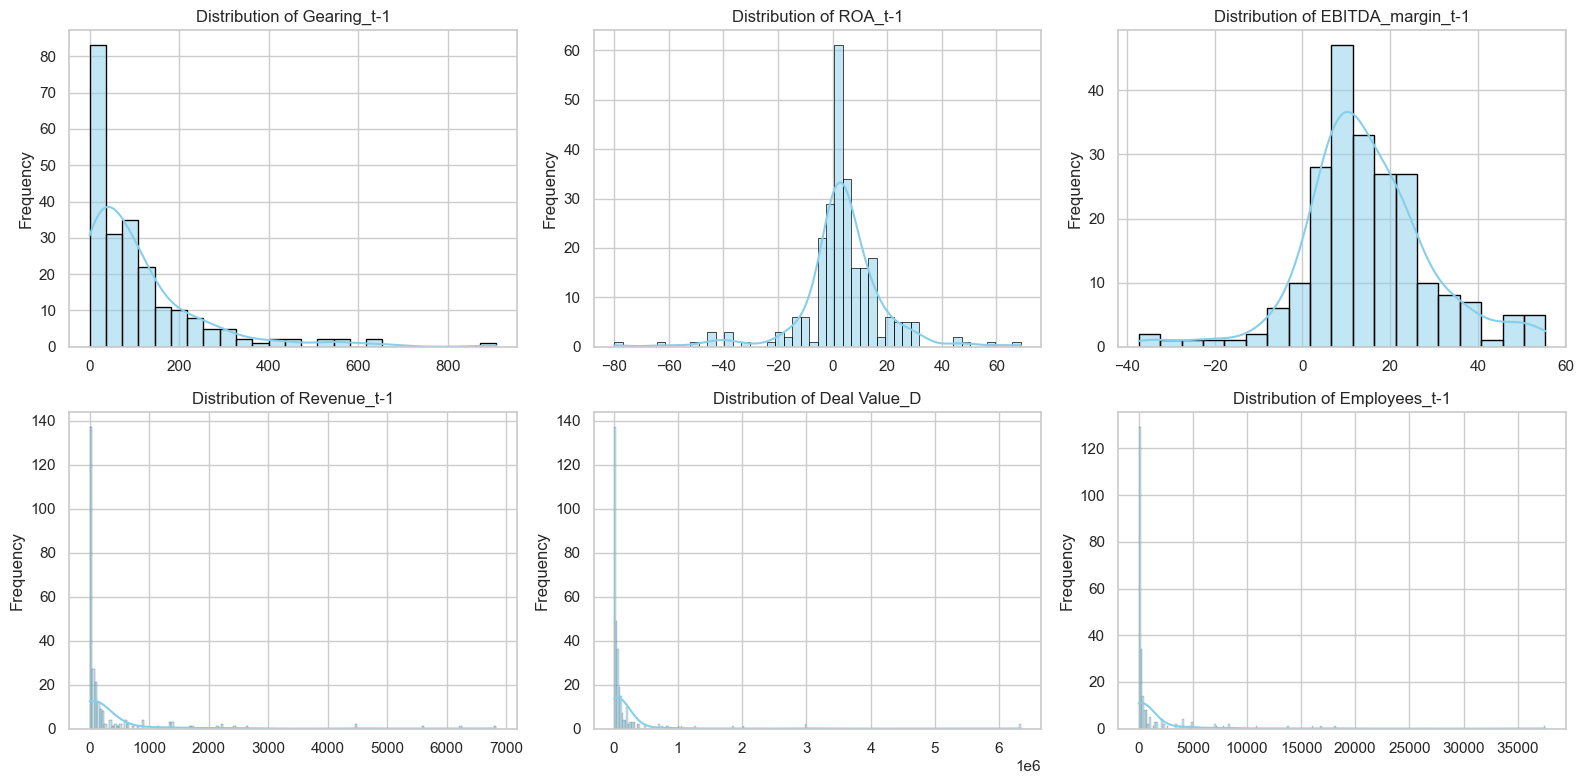

In [115]:
# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Updated list of financial variables to analyze (excluded ROE_t-1, EBITDA_t-1, NetIncome_t-1)
financial_vars = [
    "Gearing_t-1", "ROA_t-1", "EBITDA_margin_t-1",
    "Revenue_t-1", "Deal Value_D", "Employees_t-1"
]

# Force numeric conversion (non-numeric values become NaN)
for col in financial_vars:
    if col in filtered_df.columns:
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors="coerce")

# Count negatives, zeros, positives for each variable
value_counts = {}
for col in financial_vars:
    if col in filtered_df.columns:
        series = filtered_df[col].dropna()
        value_counts[col] = {
            "negative": (series < 0).sum(),
            "zero": (series == 0).sum(),
            "positive": (series > 0).sum(),
            "total_non_null": series.shape[0]
        }

# Display summary table
summary_df = pd.DataFrame(value_counts).T
print("Summary of negative / zero / positive values:")
display(summary_df)

# Set grid for plotting
cols = 3
rows = (len(financial_vars) + 1) // cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(financial_vars):
    if col in filtered_df.columns:
        sns.histplot(
            filtered_df[col].dropna(),
            kde=True,
            ax=axes[i],
            color="skyblue",
            edgecolor="black"
        )
        axes[i].set_title(f"Distribution of {col}", fontsize=12)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frequency")
    else:
        axes[i].axis('off')  # if column not found

# Remove extra empty plots
for j in range(len(financial_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Variable Transformation

In [116]:
# Apply log1p to positive skewed variables
for col in ["Gearing_t-1", "Revenue_t-1", "Deal Value_D", "Employees_t-1"]:
    filtered_df[f"log_{col}"] = np.log1p(filtered_df[col])

# Winsorize ROA
filtered_df["wins_ROA_t-1"] = winsorize(filtered_df["ROA_t-1"], limits=[0.05, 0.01])

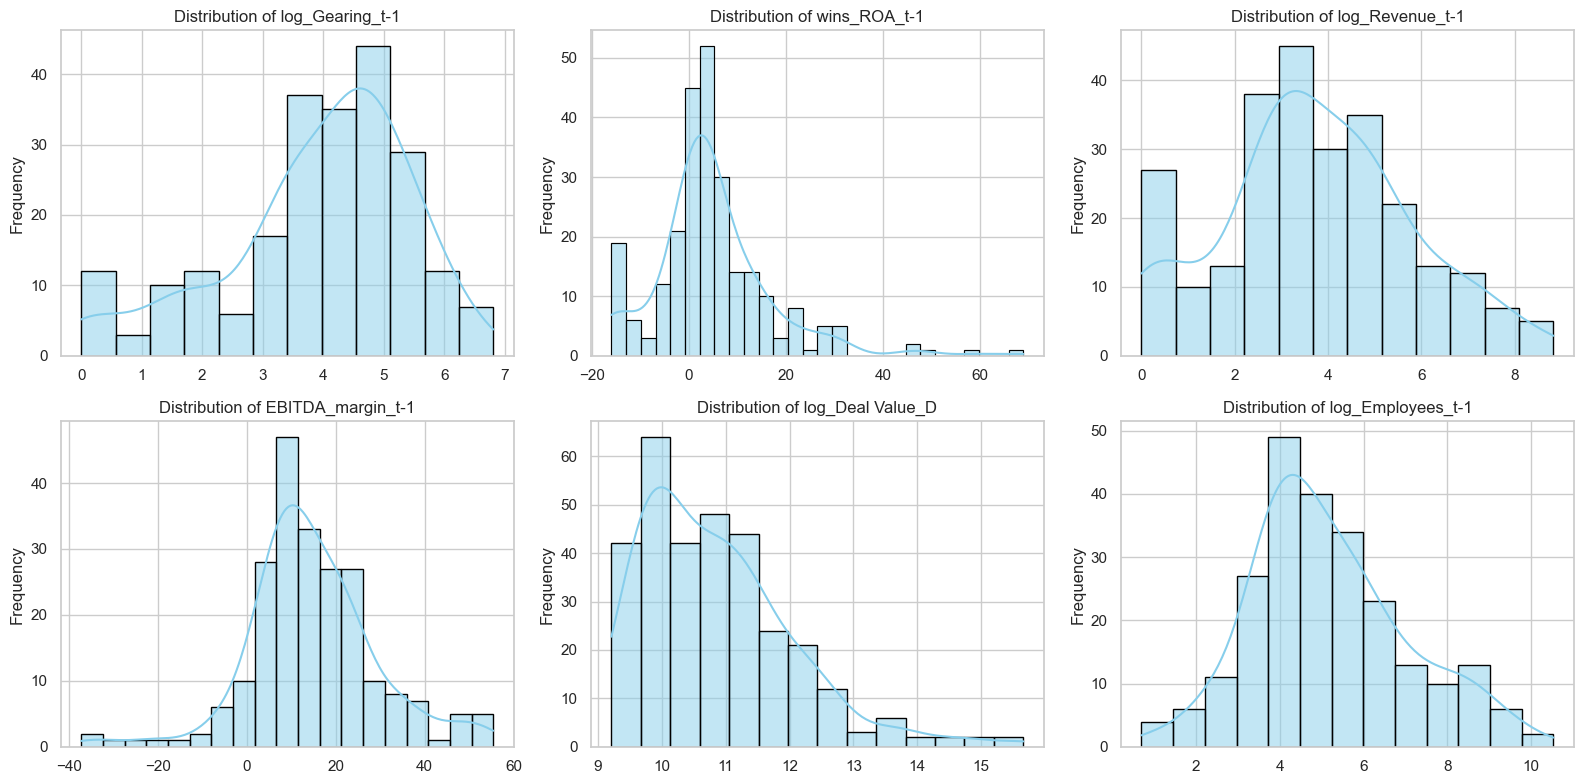

In [117]:
# Set seaborn style and color
sns.set(style="whitegrid", palette="pastel")

# Updated list of variables excluding wins_ROE_t-1, wins_EBITDA_t-1, wins_NetIncome_t-1
plot_vars = [
    "log_Gearing_t-1", "wins_ROA_t-1",
    "log_Revenue_t-1", "EBITDA_margin_t-1",
    "log_Deal Value_D", "log_Employees_t-1"
]

# Define subplot grid layout
cols = 3
rows = (len(plot_vars) + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(plot_vars):
    if col in filtered_df.columns:
        sns.histplot(
            filtered_df[col].dropna(),
            kde=True,
            ax=axes[i],
            color="skyblue",
            edgecolor="black"
        )
        axes[i].set_title(f"Distribution of {col}", fontsize=12)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frequency")
    else:
        axes[i].axis("off")  # Hide unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

<br>

# H1. Family Offices are more likely than Private Equity firms to invest in family-owned businesses.

## Ownership Distribution Table

In [118]:
pd.crosstab(filtered_df["TYPE_GROUPED_A"], 
            filtered_df["Ownership Type Before the Deal_D"], 
            normalize='index') * 100

Ownership Type Before the Deal_D     Family       Lone
TYPE_GROUPED_A                                        
FO                                50.000000  50.000000
PE                                53.365385  46.634615

## Visualization of Target Ownership Types by Acquiror Type

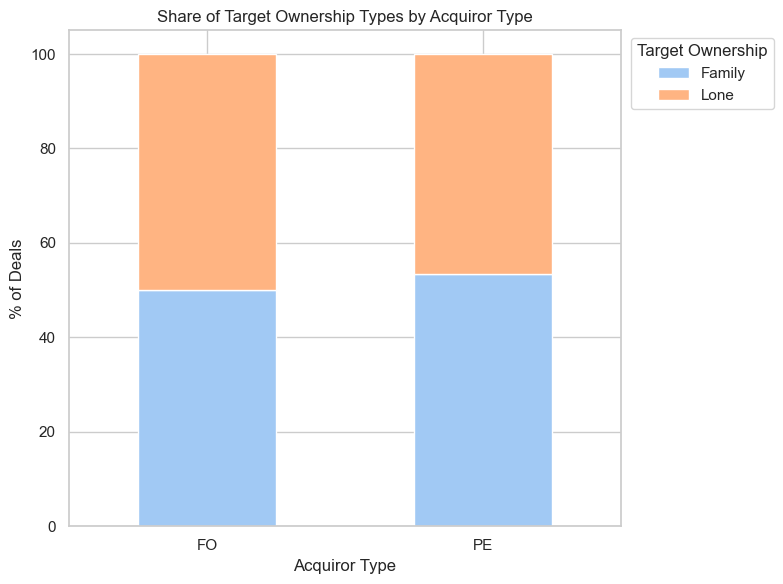

In [119]:
# Recreate the contingency table as percentages
percentages = pd.crosstab(filtered_df["TYPE_GROUPED_A"],
                          filtered_df["Ownership Type Before the Deal_D"],
                          normalize='index') * 100

# Create the stacked bar plot
ax = percentages.plot(kind="bar", stacked=True, figsize=(8, 6))

# Set chart title and axis labels
plt.title("Share of Target Ownership Types by Acquiror Type")
plt.ylabel("% of Deals")
plt.xlabel("Acquiror Type")
plt.xticks(rotation=0)

# Move the legend outside to the right of the plot
plt.legend(title="Target Ownership", bbox_to_anchor=(1.005, 1), loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

## Chi-Squared Independence Test

In [120]:
# Contingency table with raw counts
contingency = pd.crosstab(filtered_df["TYPE_GROUPED_A"], 
                          filtered_df["Ownership Type Before the Deal_D"])

# Chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared: 0.19812399332719802
p-value: 0.656239384789213
Degrees of freedom: 1
Expected frequencies:
 [[ 55.36305732  50.63694268]
 [108.63694268  99.36305732]]


## Logistic Regression Model

In [121]:
# Define y (target variable)
y = filtered_df["IS_FAMILY_TARGET"]

# Define X (independent variables)
X = filtered_df[[
    "IS_FO",
    "log_Gearing_t-1",
    "log_Revenue_t-1",
    "wins_ROA_t-1",
    "Macro_Finance",
    "Macro_Industrial",
    "Macro_Real Estate",
    "Macro_Services",
    "Macro_Other"
]]

# Add intercept
X = sm.add_constant(X)

# Drop rows with NaNs in X
X = X.dropna()
y = y.loc[X.index]  # Align y with the filtered X

# Fit logistic regression
logit_model = sm.Logit(y, X).fit()

# Summary output
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.607094
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       IS_FAMILY_TARGET   No. Observations:                  224
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            9
Date:                Sat, 06 Sep 2025   Pseudo R-squ.:                  0.1168
Time:                        10:21:29   Log-Likelihood:                -135.99
converged:                       True   LL-Null:                       -153.98
Covariance Type:            nonrobust   LLR p-value:                 4.004e-05
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1144      0.636      0.180      0.857      -1.132       1.361
IS_FO   

## Multicollinearity Check (VIF Analysis)

In [122]:
# Exclude constant for VIF calculation
X_vif = X.drop(columns='const')

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

             feature       VIF
0              IS_FO  1.686154
1    log_Gearing_t-1  7.114091
2    log_Revenue_t-1  6.893195
3       wins_ROA_t-1  1.180346
4      Macro_Finance  1.176222
5   Macro_Industrial  3.618069
6  Macro_Real Estate  1.136411
7     Macro_Services  1.724250
8        Macro_Other  1.157173


## Correlation Matrix of Independent Variables

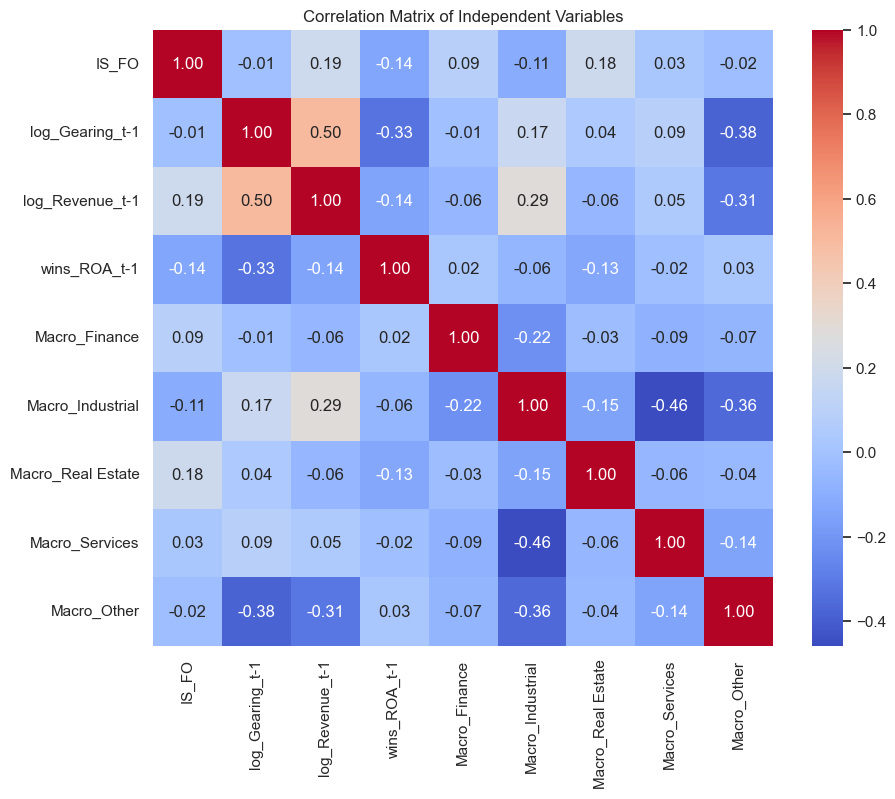

In [123]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_vif.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

## Prediction Accuracy and Classification Metrics

In [124]:
# Predict probabilities and labels
y_pred_prob = logit_model.predict(X)
y_pred_label = (y_pred_prob > 0.5).astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y, y_pred_label))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_label))

# AUC
print("AUC Score:", roc_auc_score(y, y_pred_prob))

Accuracy: 0.6651785714285714
Confusion Matrix:
 [[53 47]
 [28 96]]
AUC Score: 0.733024193548387


In [125]:
print(classification_report(y, y_pred_label))

              precision    recall  f1-score   support

           0       0.65      0.53      0.59       100
           1       0.67      0.77      0.72       124

    accuracy                           0.67       224
   macro avg       0.66      0.65      0.65       224
weighted avg       0.66      0.67      0.66       224



## Residual Analysis

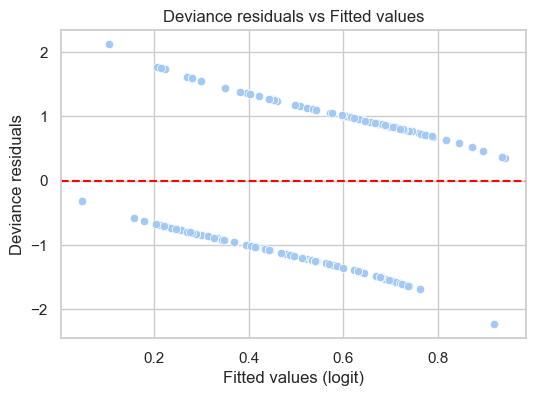

In [126]:
# Generalized Linear Model (GLM) with Binomial family
glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Deviance residuals vs fitted values
resid_dev = glm_results.resid_deviance
fitted_vals = glm_results.fittedvalues

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted_vals, y=resid_dev)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted values (logit)")
plt.ylabel("Deviance residuals")
plt.title("Deviance residuals vs Fitted values")
plt.show()

## Influence and Outlier Diagnostics

C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\2377575471.py:5: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



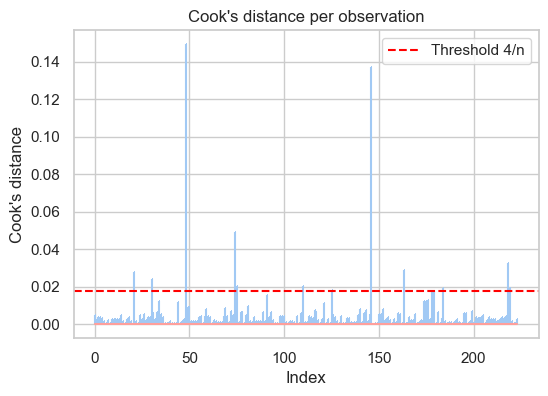

In [127]:
# Cook's Distance
influence = glm_results.get_influence()
cooks_d = influence.cooks_distance[0]
plt.figure(figsize=(6,4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Cook's distance per observation")
plt.xlabel("Index")
plt.ylabel("Cook's distance")
plt.axhline(4/len(cooks_d), color='red', linestyle='--', label='Threshold 4/n')
plt.legend()
plt.show()

## ROC Curve and Discriminatory Power

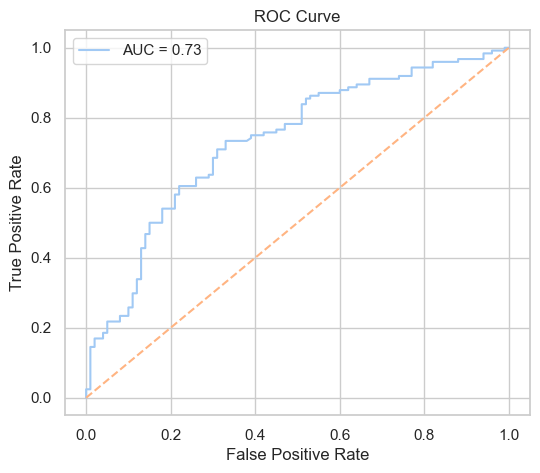

In [128]:
# ROC Curve + AUC

y_pred = glm_results.predict()
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<br>

# H3. Family Offices are more likely to acquire minority stakes, while Private Equity firms prefer majority control.

## Classification of Deals Into Majority and Minority Control

In [129]:
# Classify deals into Majority / Minority

def classify_control_type(deal_type):
    majority = [
        "Acquisition", "Institutional Buyout", "Leveraged Buyout", "Acquisition Increased"
    ]
    minority = [
        "Minority Stake", "Share Placement", "Stock Swap", "Privately Negotiated"
    ]
    if deal_type in majority:
        return "Majority"
    elif deal_type in minority:
        return "Minority"
    else:
        return "Other"

df_h3 = filtered_df.copy()
df_h3["CONTROL_TYPE"] = df_h3["Deal Type Category_D"].apply(classify_control_type)

In [130]:
# Filter to include only Majority and Minority deals

df_h3 = df_h3[df_h3["CONTROL_TYPE"].isin(["Majority", "Minority"])]

## Percentage and Count Tables by Acquiror Type

In [131]:
# Share of Majority/Minority deals by acquiror type (in %)
control_pct = pd.crosstab(df_h3["TYPE_GROUPED_A"],
                          df_h3["CONTROL_TYPE"],
                          normalize="index") * 100

# Raw counts for chi-squared test
control_counts = pd.crosstab(df_h3["TYPE_GROUPED_A"],
                             df_h3["CONTROL_TYPE"])


In [132]:
control_pct

CONTROL_TYPE     Majority   Minority
TYPE_GROUPED_A                      
FO              73.076923  26.923077
PE              80.193237  19.806763

In [133]:
control_counts

CONTROL_TYPE    Majority  Minority
TYPE_GROUPED_A                    
FO                    76        28
PE                   166        41

## Chi-Squared Independence Test

In [134]:
chi2, p, dof, expected = chi2_contingency(control_counts)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 1.639248062444166
p-value: 0.20042866817397947
Degrees of freedom: 1
Expected frequencies:
 [[ 80.92604502  23.07395498]
 [161.07395498  45.92604502]]


## Visualization of Majority vs Minority Control by Acquiror Type

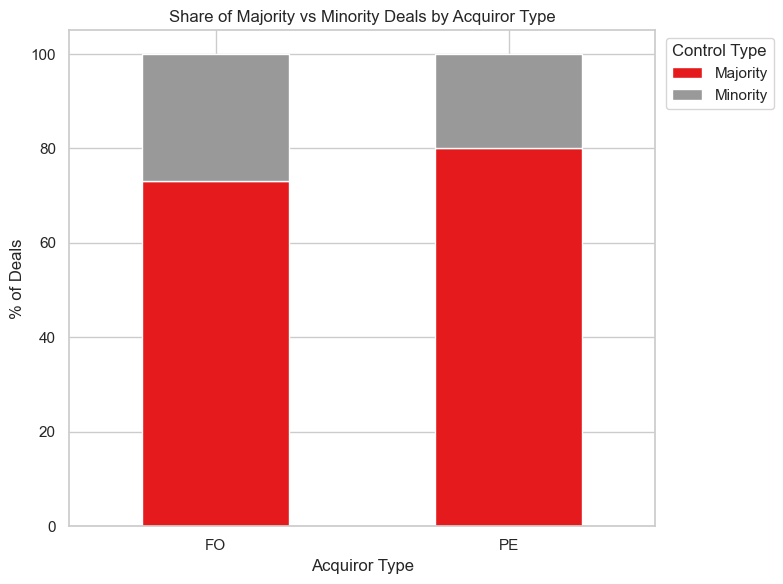

In [135]:
# Plot stacked bar chart

ax = control_pct.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="Set1")
plt.title("Share of Majority vs Minority Deals by Acquiror Type")
plt.ylabel("% of Deals")
plt.xlabel("Acquiror Type")
plt.xticks(rotation=0)
plt.legend(title="Control Type", bbox_to_anchor=(1.005, 1), loc='upper left')
plt.tight_layout()
plt.show()

<br>

# H2. Firms backed by investors with high ownership similarity (such as Family Offices investing in family businesses) perform better post-deal than firms backed by investors with low ownership similarity (such as Private Equity firms investing in family businesses).

## Delta ROA Variable Creation

In [136]:
# Create delta_ROA as the difference between ROA_t+1 and ROA_t-1
filtered_df["delta_ROA"] = filtered_df["ROA_t+1"] - filtered_df["ROA_t-1"]

# Print summary statistics
print("Average delta_ROA:", filtered_df["delta_ROA"].mean())
print("Firms with improved performance:", (filtered_df["delta_ROA"] > 0).sum())
print("Firms with worsened performance:", (filtered_df["delta_ROA"] < 0).sum())


Average delta_ROA: -4.941301724137931
Firms with improved performance: 75
Firms with worsened performance: 157


## Distribution of Delta ROA

### Boxplot

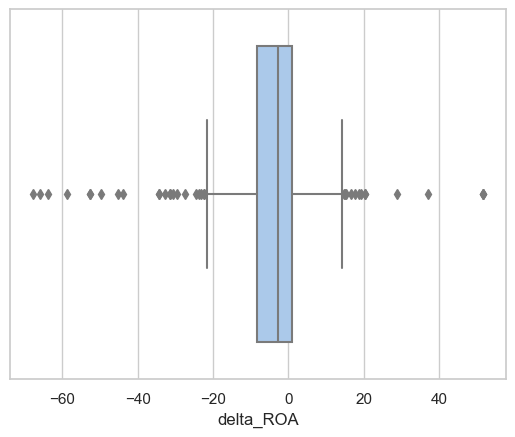

In [137]:
sns.boxplot(x=filtered_df['delta_ROA'])
plt.show()

### Histogram + KDE

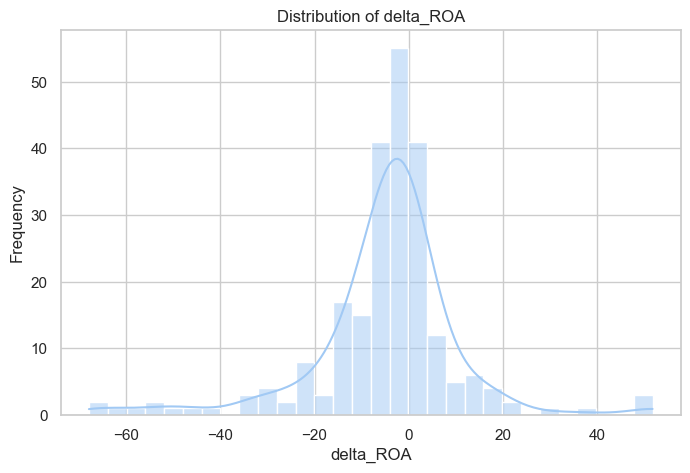

In [138]:
plt.figure(figsize=(8,5))
sns.histplot(filtered_df["delta_ROA"], kde=True, bins=30)
plt.title("Distribution of delta_ROA")
plt.xlabel("delta_ROA")
plt.ylabel("Frequency")
plt.show()

### Q-Q plot

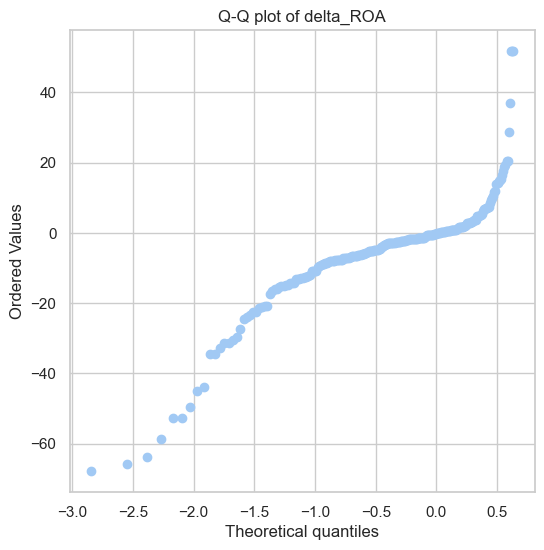

In [139]:
plt.figure(figsize=(6,6))
stats.probplot(filtered_df["delta_ROA"], dist="norm", plot=plt)
plt.title("Q-Q plot of delta_ROA")
plt.show()

## Winsorization of Delta ROA

In [140]:
# Create a new column with winsorized delta_ROA
filtered_df['wins_delta_ROA'] = winsorize(filtered_df['delta_ROA'], limits=[0.025, 0.025])

### Histogram + KDE

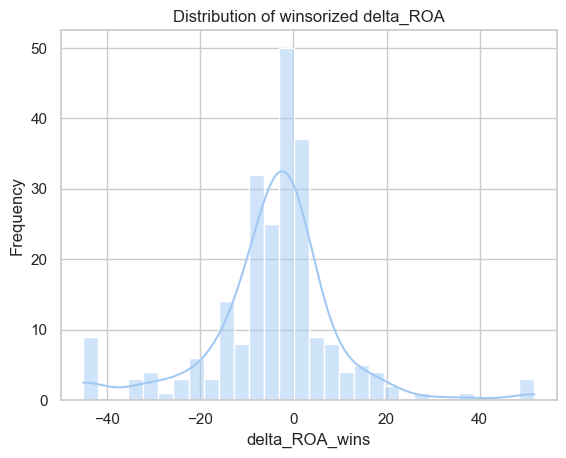

In [141]:
# Histogram and KDE of winsorized delta_ROA
sns.histplot(filtered_df['wins_delta_ROA'], kde=True, bins=30)
plt.title("Distribution of winsorized delta_ROA")
plt.xlabel("delta_ROA_wins")
plt.ylabel("Frequency")
plt.show()

### Q-Q plot

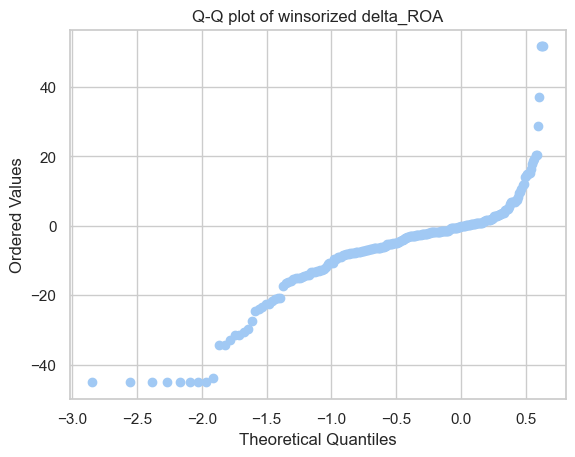

In [142]:
# Q-Q plot to assess normality of winsorized delta_ROA
stats.probplot(filtered_df['wins_delta_ROA'], dist="norm", plot=plt)
plt.title("Q-Q plot of winsorized delta_ROA")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

## Robust Regression Model (Tukey’s Biweight Estimator)

In [143]:
# Define outcome
y = filtered_df["wins_delta_ROA"]

# Define predictors including PE, Family, interaction and controls
X = filtered_df[[
    "OWN_SIMILARITY",
    "IS_FAMILY_TARGET",
    "log_Gearing_t-1",
    "log_Revenue_t-1",
    "Macro_Finance",
    "Macro_Industrial",
    "Macro_Real Estate",
    "Macro_Services",
    "Macro_Other"
]]

# Drop missing values
regression_df = pd.concat([y, X], axis=1).dropna()
X = sm.add_constant(regression_df[X.columns])
y = regression_df["wins_delta_ROA"]

# Convert all columns to float64 to ensure compatibility
X = X.astype("float64")
y = y.astype("float64")

# Run robust regression using Huber's T norm
# model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

# Run robust regression using Tukey Biweight
model = sm.RLM(y, X, M=sm.robust.norms.TukeyBiweight()).fit()
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:         wins_delta_ROA   No. Observations:                  210
Model:                            RLM   Df Residuals:                      200
Method:                          IRLS   Df Model:                            9
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Sep 2025                                         
Time:                        10:21:32                                         
No. Iterations:                    50                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.1060      2.38

## Multicollinearity Check (VIF Analysis)

In [144]:
# Exclude constant for VIF calculation
X_vif = X.drop(columns='const')

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

             feature       VIF
0     OWN_SIMILARITY  1.868946
1   IS_FAMILY_TARGET  2.631388
2    log_Gearing_t-1  8.394172
3    log_Revenue_t-1  6.703525
4      Macro_Finance  1.241181
5   Macro_Industrial  4.167155
6  Macro_Real Estate  1.088650
7     Macro_Services  1.682473
8        Macro_Other  1.199175


## Correlation Matrix of Independent Variables

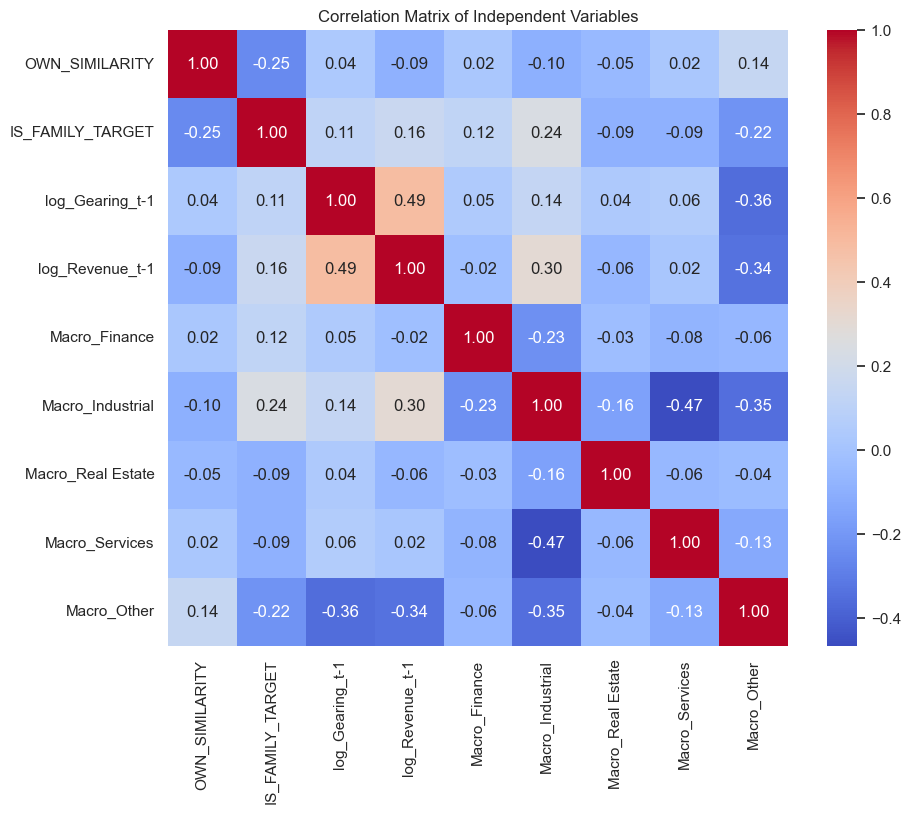

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_vif.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

## Diagnostic Checks

### Robust Weights Analysis

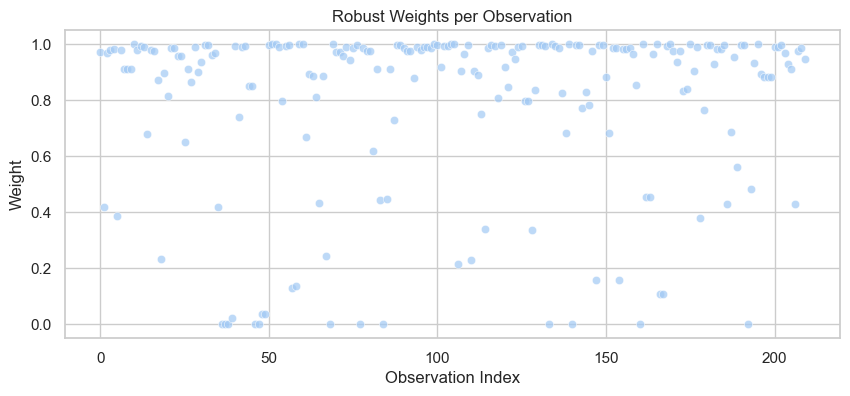

In [146]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.scatterplot(x=range(len(model.weights)), y=model.weights, alpha=0.7)
plt.title("Robust Weights per Observation")
plt.xlabel("Observation Index")
plt.ylabel("Weight")
plt.show()

### Autocorrelation and Heteroskedasticity Tests

Runs test p-value = 0.004 (H0: randomness of residuals)
Breusch-Pagan p-value = 0.923 (H0: constant variance)


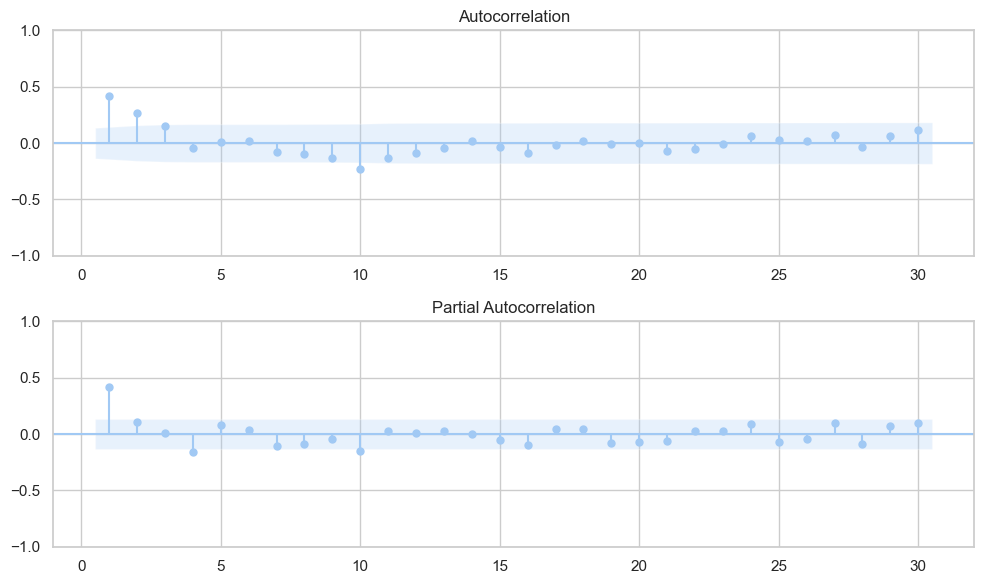

In [147]:
# RUNS TEST for autocorrelation
_, pval_runs = runstest_1samp(model.resid, correction=False)
print(f"Runs test p-value = {pval_runs:.3f} (H0: randomness of residuals)")

# BREUSCH-PAGAN for heteroskedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_pval = bp_test[1]
print(f"Breusch-Pagan p-value = {bp_pval:.3f} (H0: constant variance)")

# ACF/PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10,6))
sgt.plot_acf(model.resid, lags=30, zero=False, ax=ax[0])
ax[0].set_title("Autocorrelation")
sgt.plot_pacf(model.resid, lags=30, zero=False, ax=ax[1], method='ywm')
ax[1].set_title("Partial Autocorrelation")
fig.tight_layout()
plt.show()

### Residuals Distribution

Shapiro-Wilk p-value on residuals = 0.000


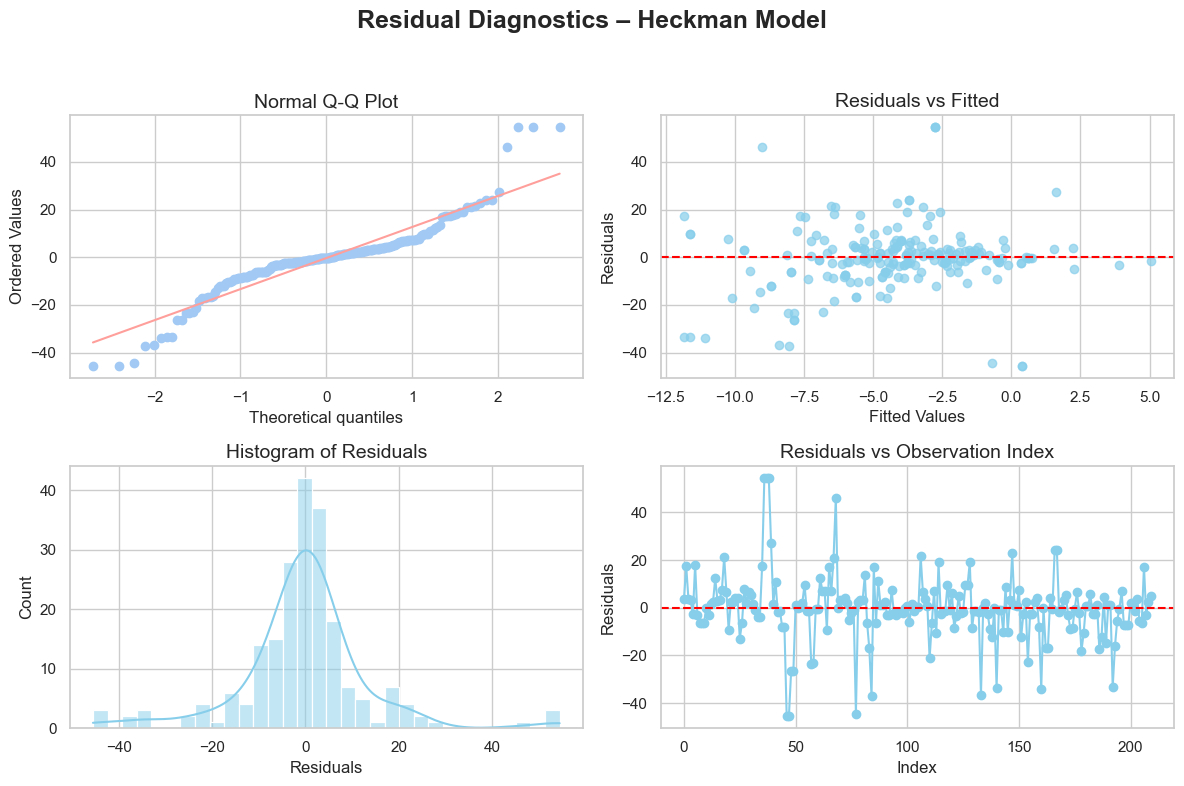

In [148]:
# Shapiro-Wilk test
from scipy.stats import shapiro
pval_shapiro = shapiro(model.resid)[1]
print(f"Shapiro-Wilk p-value on residuals = {pval_shapiro:.3f}")

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 
fig.suptitle('Residual Diagnostics – Heckman Model', fontsize=18, fontweight='bold')

# Normal Q-Q plot
stats.probplot(model.resid, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Normal Q-Q Plot", fontsize=14)

# Residuals vs Fitted
axs[0, 1].scatter(model.fittedvalues, model.resid, alpha=0.7, color="skyblue")
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_title("Residuals vs Fitted", fontsize=14)
axs[0, 1].set_xlabel("Fitted Values")
axs[0, 1].set_ylabel("Residuals")

# Histogram of residuals
sns.histplot(model.resid, kde=True, ax=axs[1, 0], color="skyblue")
axs[1, 0].set_title("Histogram of Residuals", fontsize=14)
axs[1, 0].set_xlabel("Residuals")

# Residuals over observation index
axs[1, 1].plot(np.arange(len(model.resid)), model.resid, 'o-', color="skyblue")
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_title("Residuals vs Observation Index", fontsize=14)
axs[1, 1].set_xlabel("Index")
axs[1, 1].set_ylabel("Residuals")

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

## Heckman Two-Step Model

### Step 1: Selection Model (Probit for FO vs PE)

In [149]:
# Define predictors for the selection model (only pre-deal characteristics)
X_selection = filtered_df[[
    "IS_FAMILY_TARGET",
    "log_Revenue_t-1",
    "log_Gearing_t-1",
    "Macro_Industrial", 
    "Macro_Finance", 
    "Macro_Services", 
    "Macro_Other"
]]
X_selection = sm.add_constant(X_selection)
y_selection = filtered_df["IS_FO"]

# Drop missing values from both X and y
selection_df = pd.concat([y_selection, X_selection], axis=1).dropna()
y_selection = selection_df["IS_FO"]
X_selection = selection_df.drop(columns=["IS_FO"])


# Estimate the probit model (first stage)
probit_model = sm.Probit(y_selection, X_selection).fit()
filtered_df["probit_fitted"] = probit_model.predict(X_selection)

# Define inverse Mills ratio function
def inverse_mills(p, d):
    p = np.clip(p, 1e-5, 1 - 1e-5)  # avoid infinite values
    if d == 1:
        return norm.pdf(norm.ppf(p)) / p
    else:
        return -norm.pdf(norm.ppf(p)) / (1 - p)

# Compute lambda (inverse Mills ratio) for each observation
filtered_df["mills_ratio"] = filtered_df.apply(
    lambda row: inverse_mills(row["probit_fitted"], row["IS_FO"]), axis=1
)

Optimization terminated successfully.
         Current function value: 0.602199
         Iterations 5


In [150]:
print(probit_model.summary())

                          Probit Regression Results                           
Dep. Variable:                  IS_FO   No. Observations:                  224
Model:                         Probit   Df Residuals:                      216
Method:                           MLE   Df Model:                            7
Date:                Sat, 06 Sep 2025   Pseudo R-squ.:                 0.07224
Time:                        10:21:34   Log-Likelihood:                -134.89
converged:                       True   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                  0.003760
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1720      0.326     -0.527      0.598      -0.812       0.468
IS_FAMILY_TARGET    -0.2055      0.192     -1.072      0.284      -0.581       0.170
log_Revenue_t-1      0.2084 

### Step 2: Outcome Model (OLS with Mills Ratio Correction)

In [151]:
# Define the outcome variable (post-deal performance)
y_outcome = filtered_df["wins_delta_ROA"]

# Define predictors for the outcome regression (same as your original model + mills_ratio)
X_outcome = filtered_df[[
    "OWN_SIMILARITY",
    "IS_FAMILY_TARGET",
    "log_Gearing_t-1",
    "log_Revenue_t-1",
    "Macro_Finance",
    "Macro_Industrial",
    "Macro_Real Estate",
    "Macro_Services",
    "Macro_Other",
    "mills_ratio"  # Heckman correction term
]]

# Clean dataset: remove missing values
regression_df = pd.concat([y_outcome, X_outcome], axis=1).dropna()

# Prepare data for OLS
X = sm.add_constant(regression_df[X_outcome.columns])
y = regression_df["wins_delta_ROA"]

# Convert all variables to float64 for compatibility
X = X.astype("float64")
y = y.astype("float64")

# Run robust regression using Tukey Biweight
model_heckman = sm.RLM(y, X, M=sm.robust.norms.TukeyBiweight()).fit()

# Run robust regression using Huber's T norm
# model_heckman = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

# Print summary
print(model_heckman.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:         wins_delta_ROA   No. Observations:                  210
Model:                            RLM   Df Residuals:                      199
Method:                          IRLS   Df Model:                           10
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Sep 2025                                         
Time:                        10:21:34                                         
No. Iterations:                    42                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.0718      2.37

## Multicollinearity Check (VIF Analysis)

In [152]:
# Exclude constant for VIF calculation
X_vif = X.drop(columns='const')

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

             feature       VIF
0     OWN_SIMILARITY  1.917936
1   IS_FAMILY_TARGET  2.633885
2    log_Gearing_t-1  8.446204
3    log_Revenue_t-1  6.703572
4      Macro_Finance  1.241994
5   Macro_Industrial  4.169163
6  Macro_Real Estate  1.127101
7     Macro_Services  1.683848
8        Macro_Other  1.199254
9        mills_ratio  1.061714


## Correlation Matrix of Independent Variables

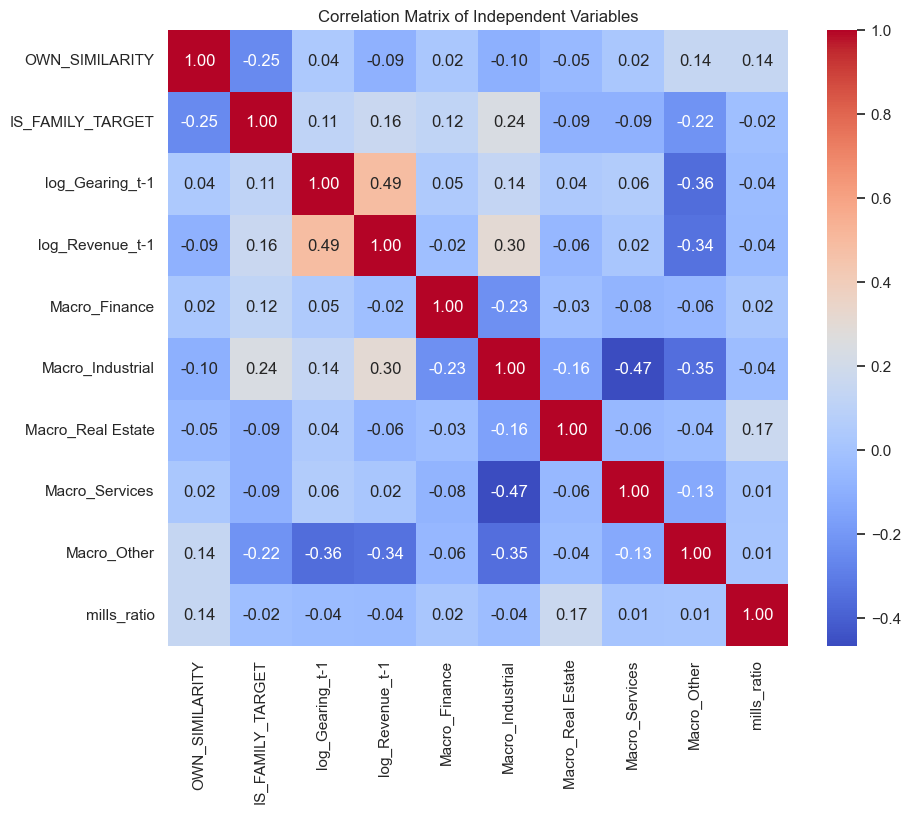

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_vif.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

## Diagnostic Checks

### Autocorrelation and Heteroskedasticity Tests

Runs test p-value = 0.002 (H0: randomness of residuals)
Breusch-Pagan p-value = 0.957 (H0: constant variance)


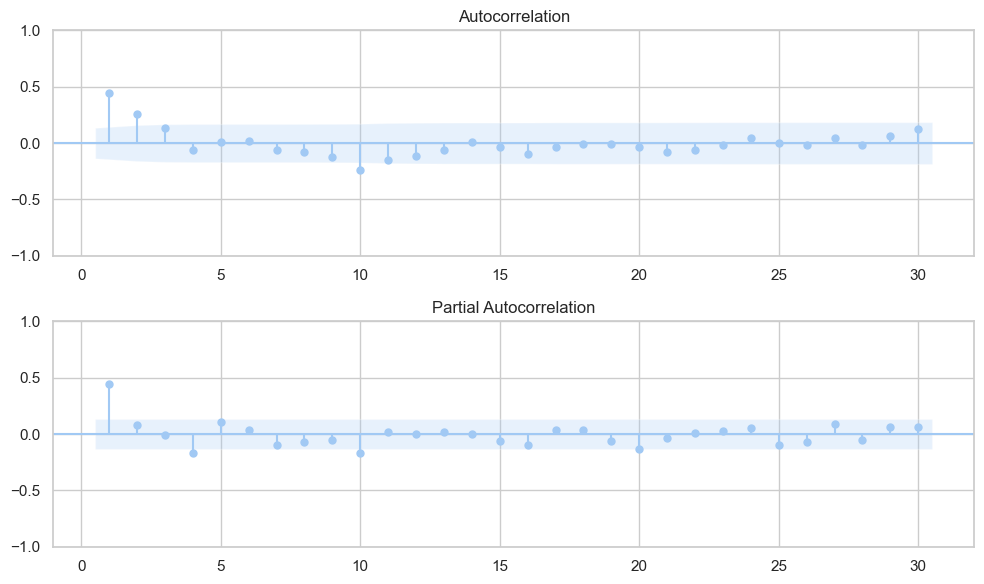

In [154]:
# RUNS TEST for autocorrelation
_, pval_runs = runstest_1samp(model_heckman.resid, correction=False)
print(f"Runs test p-value = {pval_runs:.3f} (H0: randomness of residuals)")

# BREUSCH-PAGAN for heteroskedasticity
bp_test = het_breuschpagan(model_heckman.resid, model_heckman.model.exog)
bp_pval = bp_test[1]
print(f"Breusch-Pagan p-value = {bp_pval:.3f} (H0: constant variance)")

# ACF/PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10,6))
sgt.plot_acf(model_heckman.resid, lags=30, zero=False, ax=ax[0])
ax[0].set_title("Autocorrelation")
sgt.plot_pacf(model_heckman.resid, lags=30, zero=False, ax=ax[1], method='ywm')
ax[1].set_title("Partial Autocorrelation")
fig.tight_layout()
plt.show()

### Residuals Distribution

Shapiro-Wilk p-value on residuals = 0.000


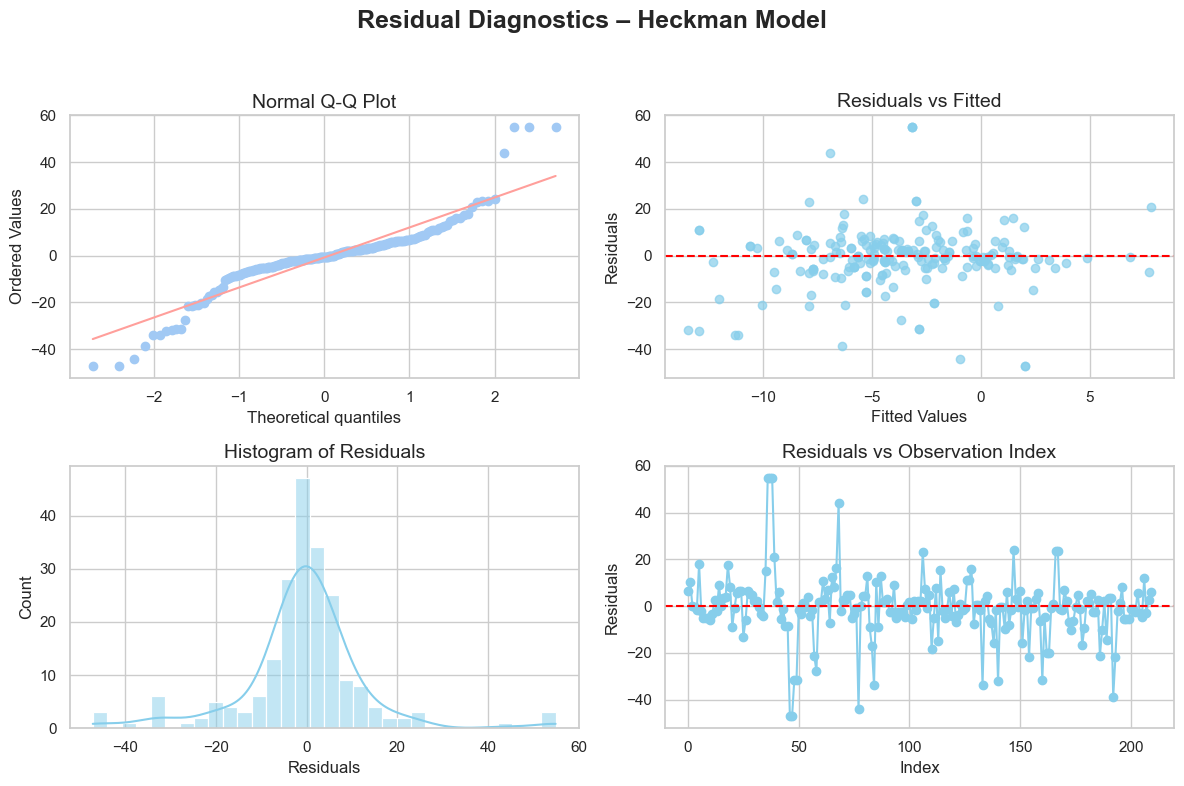

In [155]:
# Shapiro-Wilk test
from scipy.stats import shapiro
pval_shapiro = shapiro(model_heckman.resid)[1]
print(f"Shapiro-Wilk p-value on residuals = {pval_shapiro:.3f}")

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 
fig.suptitle('Residual Diagnostics – Heckman Model', fontsize=18, fontweight='bold')

# Normal Q-Q plot
stats.probplot(model_heckman.resid, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Normal Q-Q Plot", fontsize=14)

# Residuals vs Fitted
axs[0, 1].scatter(model_heckman.fittedvalues, model_heckman.resid, alpha=0.7, color="skyblue")
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_title("Residuals vs Fitted", fontsize=14)
axs[0, 1].set_xlabel("Fitted Values")
axs[0, 1].set_ylabel("Residuals")

# Histogram of residuals
sns.histplot(model_heckman.resid, kde=True, ax=axs[1, 0], color="skyblue")
axs[1, 0].set_title("Histogram of Residuals", fontsize=14)
axs[1, 0].set_xlabel("Residuals")

# Residuals over observation index
axs[1, 1].plot(np.arange(len(model_heckman.resid)), model_heckman.resid, 'o-', color="skyblue")
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_title("Residuals vs Observation Index", fontsize=14)
axs[1, 1].set_xlabel("Index")
axs[1, 1].set_ylabel("Residuals")

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

### Robust Weights Analysis

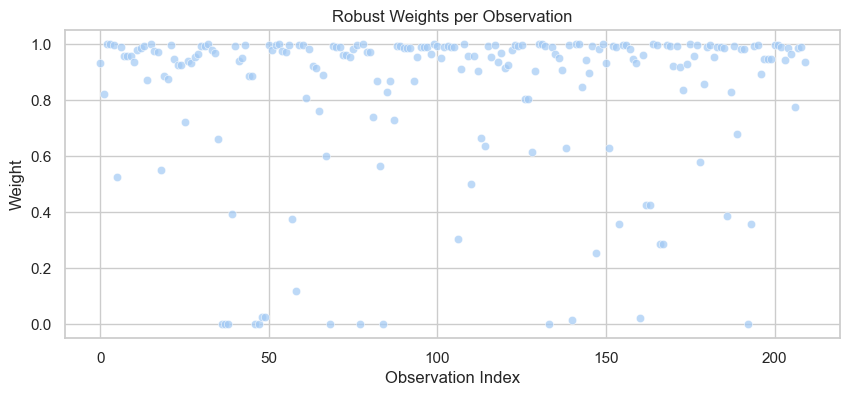

In [156]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=range(len(model_heckman.weights)), y=model_heckman.weights, alpha=0.7)
plt.title("Robust Weights per Observation")
plt.xlabel("Observation Index")
plt.ylabel("Weight")
plt.show()

<br>

# Additional Analysis - Differences in Family Office behavior

In [157]:
filtered_df

Deal_ID      Source_D Completed/Assumed Completed Date_D  Deal Year_D  \
186       196        Zephyr                         2015-01-08         2015   
189       199        Zephyr                         2015-01-10         2015   
194       205  Mergermarket                         2015-01-19         2015   
195       206        Zephyr                         2015-01-19         2015   
196       207  Mergermarket                         2015-01-28         2015   
...       ...           ...                                ...          ...   
1104     1177  Mergermarket                         2022-04-13         2022   
1105     1178  Mergermarket                         2022-04-14         2022   
1107     1180  Mergermarket                         2022-05-02         2022   
1110     1182        Zephyr                         2022-05-05         2022   
1112     1184  Mergermarket                         2022-05-06         2022   

      Deal Month_D             Target Name_D  \
186              1            RACCORTUBI SPA   
189              1     BORGHESI ADVISORY SRL   
194              1          M&G Chemicals SA   
195              1                  PH&T SPA   
196              1  Italpresse Industrie Spa   
...            ...                       ...   
1104             4                   SKA Srl   
1105             4             Microtest Srl   
1107             5        PPM Industries Spa   
1110             5        HMC PREMEDICAL SPA   
1112             5               Isem S.r.l.   

                          Target Business Description_D  \
186   Bolts and nuts manufacturer, Forged fittings m...   
189                         Financial advisory services   
194   Luxembourg-based company engaged in production...   
195   Pharmaceuticals manufacturer, Pharmaceuticals ...   
196   Italy-based manufacturer of equipment for high...   
...                                                 ...   
1104          Manufacturer of modern poultry equipment.   
1105  Italy-based designer and manufacturer of semic...   
1107             Italy-based adhesive tape manufacturer   
1110                       Medical devices manufacturer   
1112  Italy-based packaging company specialized in r...   

     Target Listing Situation_D  Target CF_D Target BvD ID Number_D  ...  \
186                    Unlisted  00747640159          IT00747640159  ...   
189                    Unlisted  01340890332          IT01340890332  ...   
194                    Unlisted          nan             LULB174890  ...   
195                    Unlisted  09138720157          IT09138720157  ...   
196                    Unlisted  08900010961          IT08900010961  ...   
...                         ...          ...                    ...  ...   
1104                   Unlisted  03509800243          IT03509800243  ...   
1105                   Unlisted  01960470464          IT01960470464  ...   
1107                   Unlisted  02099620168          IT02099620169  ...   
1110                   Unlisted  02504130366          IT02504130366  ...   
1112                   Unlisted  02266870183          IT02266870183  ...   

     FO_x_Family log_Gearing_t-1 log_Revenue_t-1 log_Deal Value_D  \
186            0        3.568687        3.938996         9.210440   
189            0        3.117286        0.926519         9.367430   
194            1             NaN             NaN        12.373707   
195            0        3.562721        2.310747         9.615872   
196            0             NaN             NaN        11.002117   
...          ...             ...             ...              ...   
1104           0             NaN             NaN        10.463132   
1105           0             NaN             NaN        11.543487   
1107           0        5.350056        4.595003        10.596660   
1110           0        4.458791        3.471341         9.210440   
1112           0        4.845541        3.792000        11.407576   

     log_Employees_t-1 wins_R

## FO-Only Subset

In [158]:
# FO-only subset

fo_types = ["FO (Financialized family)", "FO (Co-existing core business)"]
fo_df = filtered_df[filtered_df["TYPE_A"].isin(fo_types)].copy()
fo_df

Deal_ID      Source_D Completed/Assumed Completed Date_D  Deal Year_D  \
189       199        Zephyr                         2015-01-10         2015   
194       205  Mergermarket                         2015-01-19         2015   
209       222        Zephyr                         2015-03-26         2015   
216       235  Mergermarket                         2015-05-12         2015   
227       250        Zephyr                         2015-06-10         2015   
...       ...           ...                                ...          ...   
1041     1124        Zephyr                         2021-12-02         2021   
1056     1145  Mergermarket                         2022-01-17         2022   
1061     1145  Mergermarket                         2022-01-17         2022   
1093     1167  Mergermarket                         2022-03-10         2022   
1100     1173        Zephyr                         2022-03-24         2022   

      Deal Month_D               Target Name_D  \
189              1       BORGHESI ADVISORY SRL   
194              1            M&G Chemicals SA   
209              3                   ZEFER SPA   
216              5     Sicer International SpA   
227              6                 VALSOIA SPA   
...            ...                         ...   
1041            12                 LIMONTA SPA   
1056             1                 Landoll Srl   
1061             1                 Landoll Srl   
1093             3  Nebuly Societa Benefit Srl   
1100             3               DAFE 5000 SRL   

                          Target Business Description_D  \
189                         Financial advisory services   
194   Luxembourg-based company engaged in production...   
209   Leather accessories manufacturer, Leather foot...   
216   Italy-based producer of ceramic colors for ind...   
227   Soya-based and rice-based food manufacturer, S...   
...                                                 ...   
1041                               Textile manufacturer   
1056  Italy-based cosmetics company operating under ...   
1061  Italy-based cosmetics company operating under ...   
1093  Artificial Intelligence Company. Software Publ...   
1100  Operating holding company\nInvestment holding ...   

     Target Listing Situation_D  Target CF_D Target BvD ID Number_D  ...  \
189                    Unlisted  01340890332          IT01340890332  ...   
194                    Unlisted          nan             LULB174890  ...   
209                    Unlisted  05260370480          IT05260370480  ...   
216                    Unlisted  02150250369          IT02150250369  ...   
227                      Listed  02341060289          IT02341060289  ...   
...                         ...          ...                    ...  ...   
1041                   Unlisted  00201760139          IT00201760139  ...   
1056                   Unlisted  00195480199          IT00195480199  ...   
1061                   Unlisted  00195480199          IT00195480199  ...   
1093                   Unlisted  12649650012          IT12649650012  ...   
1100         Unlisted\nUnlisted  08618850963          IT08618850963  ...   

     FO_x_Family log_Gearing_t-1 log_Revenue_t-1 log_Deal Value_D  \
189            0        3.117286        0.926519         9.367430   
194            1             NaN             NaN        12.373707   
209            1             NaN             NaN         9.539716   
216            0             NaN             NaN        10.308986   
227            0        3.447572        4.758320         9.470317   
...          ...             ...             ...              ...   
1041           1             NaN             NaN        11.396403   
1056           1        3.461383        3.174485        10.915107   
1061           1        3.461383        3.174485        10.915107   
1093           0             NaN             NaN         9.252163   
1100           0        0.000000        0.011015        11.467520   

     

## Creation of FO Subtype Dummy

In [159]:
# Dummy for FO subtype

fo_df["FO_Financialized"] = (fo_df["TYPE_A"] == "FO (Financialized family)").astype(int)
fo_df

Deal_ID      Source_D Completed/Assumed Completed Date_D  Deal Year_D  \
189       199        Zephyr                         2015-01-10         2015   
194       205  Mergermarket                         2015-01-19         2015   
209       222        Zephyr                         2015-03-26         2015   
216       235  Mergermarket                         2015-05-12         2015   
227       250        Zephyr                         2015-06-10         2015   
...       ...           ...                                ...          ...   
1041     1124        Zephyr                         2021-12-02         2021   
1056     1145  Mergermarket                         2022-01-17         2022   
1061     1145  Mergermarket                         2022-01-17         2022   
1093     1167  Mergermarket                         2022-03-10         2022   
1100     1173        Zephyr                         2022-03-24         2022   

      Deal Month_D               Target Name_D  \
189              1       BORGHESI ADVISORY SRL   
194              1            M&G Chemicals SA   
209              3                   ZEFER SPA   
216              5     Sicer International SpA   
227              6                 VALSOIA SPA   
...            ...                         ...   
1041            12                 LIMONTA SPA   
1056             1                 Landoll Srl   
1061             1                 Landoll Srl   
1093             3  Nebuly Societa Benefit Srl   
1100             3               DAFE 5000 SRL   

                          Target Business Description_D  \
189                         Financial advisory services   
194   Luxembourg-based company engaged in production...   
209   Leather accessories manufacturer, Leather foot...   
216   Italy-based producer of ceramic colors for ind...   
227   Soya-based and rice-based food manufacturer, S...   
...                                                 ...   
1041                               Textile manufacturer   
1056  Italy-based cosmetics company operating under ...   
1061  Italy-based cosmetics company operating under ...   
1093  Artificial Intelligence Company. Software Publ...   
1100  Operating holding company\nInvestment holding ...   

     Target Listing Situation_D  Target CF_D Target BvD ID Number_D  ...  \
189                    Unlisted  01340890332          IT01340890332  ...   
194                    Unlisted          nan             LULB174890  ...   
209                    Unlisted  05260370480          IT05260370480  ...   
216                    Unlisted  02150250369          IT02150250369  ...   
227                      Listed  02341060289          IT02341060289  ...   
...                         ...          ...                    ...  ...   
1041                   Unlisted  00201760139          IT00201760139  ...   
1056                   Unlisted  00195480199          IT00195480199  ...   
1061                   Unlisted  00195480199          IT00195480199  ...   
1093                   Unlisted  12649650012          IT12649650012  ...   
1100         Unlisted\nUnlisted  08618850963          IT08618850963  ...   

     log_Gearing_t-1 log_Revenue_t-1 log_Deal Value_D log_Employees_t-1  \
189         3.117286        0.926519         9.367430          2.708050   
194              NaN             NaN        12.373707               NaN   
209              NaN             NaN         9.539716               NaN   
216              NaN             NaN        10.308986               NaN   
227         3.447572        4.758320         9.470317          4.727388   
...              ...             ...              ...               ...   
1041             NaN             NaN        11.396403               NaN   
1056        3.461383        3.174485        10.915107          4.369448   
1061        3.461383        3.174485        10.915107          4.369448   
1093             NaN             NaN         9.252163               NaN   
1100     

## Validation and Consistency Checks

In [160]:
# Quick sanity checks

# Count FOs by original TYPE_A
counts_type = fo_df["TYPE_A"].value_counts(dropna=False)
print("Counts by TYPE_A:\n", counts_type, "\n")

# Count FOs by the new dummy
counts_dummy = (fo_df["FO_Financialized"]
                .value_counts(dropna=False)
                .rename({0:"Co-existing core business (0)", 1:"Financialized family (1)"}))
print("Counts by FO_Financialized dummy:\n", counts_dummy, "\n")

Counts by TYPE_A:
 TYPE_A
FO (Financialized family)         53
FO (Co-existing core business)    53
Name: count, dtype: int64 

Counts by FO_Financialized dummy:
 FO_Financialized
Financialized family (1)         53
Co-existing core business (0)    53
Name: count, dtype: int64 



## Summary Table of FO Subtypes

In [161]:
# Summary table
summary = pd.DataFrame({
    "n_by_TYPE": counts_type,
    "n_by_dummy": pd.Series({
        "FO (Financialized family)": counts_dummy.get("Financialized family (1)", 0),
        "FO (Co-existing core business)": counts_dummy.get("Co-existing core business (0)", 0)
    })
})
summary["share"] = (summary["n_by_TYPE"] / summary["n_by_TYPE"].sum()).round(3)
summary

n_by_TYPE  n_by_dummy  share
FO (Financialized family)              53          53    0.5
FO (Co-existing core business)         53          53    0.5

<br>

# H1-bis: Preference for Family-Owned vs Non-Family-Owned Targets

## Ownership Distribution Table

In [162]:
pd.crosstab(fo_df["TYPE_A"], 
            fo_df["Ownership Type Before the Deal_D"], 
            normalize='index') * 100

Ownership Type Before the Deal_D     Family       Lone
TYPE_A                                                
FO (Co-existing core business)    47.169811  52.830189
FO (Financialized family)         52.830189  47.169811

In [182]:
count_table = pd.crosstab(
    fo_df["TYPE_A"],
    fo_df["Ownership Type Before the Deal_D"]
)

count_table

Ownership Type Before the Deal_D  Family  Lone
TYPE_A                                        
FO (Co-existing core business)        25    28
FO (Financialized family)             28    25

## Visualization of Target Ownership Types by FO Type

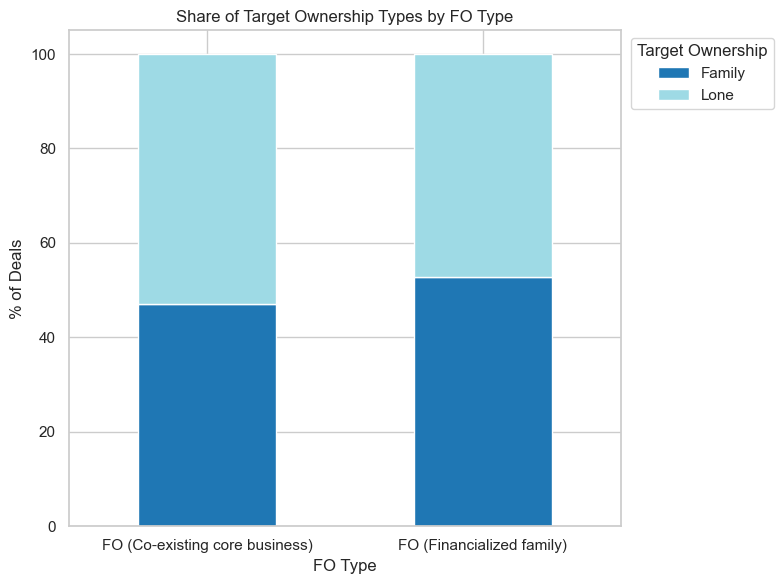

In [163]:
# Recreate the contingency table as percentages
percentages = pd.crosstab(fo_df["TYPE_A"],
                          fo_df["Ownership Type Before the Deal_D"],
                          normalize='index') * 100

# Create the stacked bar plot
ax = percentages.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="tab20")

# Set chart title and axis labels
plt.title("Share of Target Ownership Types by FO Type")
plt.ylabel("% of Deals")
plt.xlabel("FO Type")
plt.xticks(rotation=0)

# Move the legend outside to the right of the plot
plt.legend(title="Target Ownership", bbox_to_anchor=(1.005, 1), loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

## Chi-Squared Independence Test

In [164]:
# Contingency table with raw counts
contingency = pd.crosstab(fo_df["TYPE_A"], 
                          fo_df["Ownership Type Before the Deal_D"])

# Chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared: 0.1509433962264151
p-value: 0.697635440452867
Degrees of freedom: 1
Expected frequencies:
 [[26.5 26.5]
 [26.5 26.5]]


## Logistic Regression Model

In [165]:
# Define y (target variable)
y = fo_df["IS_FAMILY_TARGET"]

# Define X (independent variables)
X = fo_df[[
    "FO_Financialized",
    "log_Gearing_t-1",
    "log_Revenue_t-1",
    "wins_ROA_t-1",
    "Macro_Finance",
    "Macro_Industrial",
    "Macro_Real Estate",
    "Macro_Services",
    "Macro_Other"
]]

# Add intercept
X = sm.add_constant(X)

# Drop rows with NaNs in X
X = X.dropna()
y = y.loc[X.index]  # Align y with the filtered X

# Fit logistic regression
logit_model = sm.Logit(y, X).fit()

# Summary output
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.615802
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       IS_FAMILY_TARGET   No. Observations:                   79
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            9
Date:                Sat, 06 Sep 2025   Pseudo R-squ.:                  0.1115
Time:                        10:21:37   Log-Likelihood:                -48.648
converged:                       True   LL-Null:                       -54.752
Covariance Type:            nonrobust   LLR p-value:                    0.2018
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4410      1.112     -0.396      0.692      -2.621       1.739
FO_Finan

## Multicollinearity Check (VIF Analysis)

In [166]:
# Exclude constant for VIF calculation
X_vif = X.drop(columns='const')

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

             feature       VIF
0   FO_Financialized  2.338955
1    log_Gearing_t-1  7.978258
2    log_Revenue_t-1  7.870038
3       wins_ROA_t-1  1.268015
4      Macro_Finance  1.419436
5   Macro_Industrial  3.783932
6  Macro_Real Estate  1.348107
7     Macro_Services  1.944667
8        Macro_Other  1.134349


## Correlation Matrix of Independent Variables

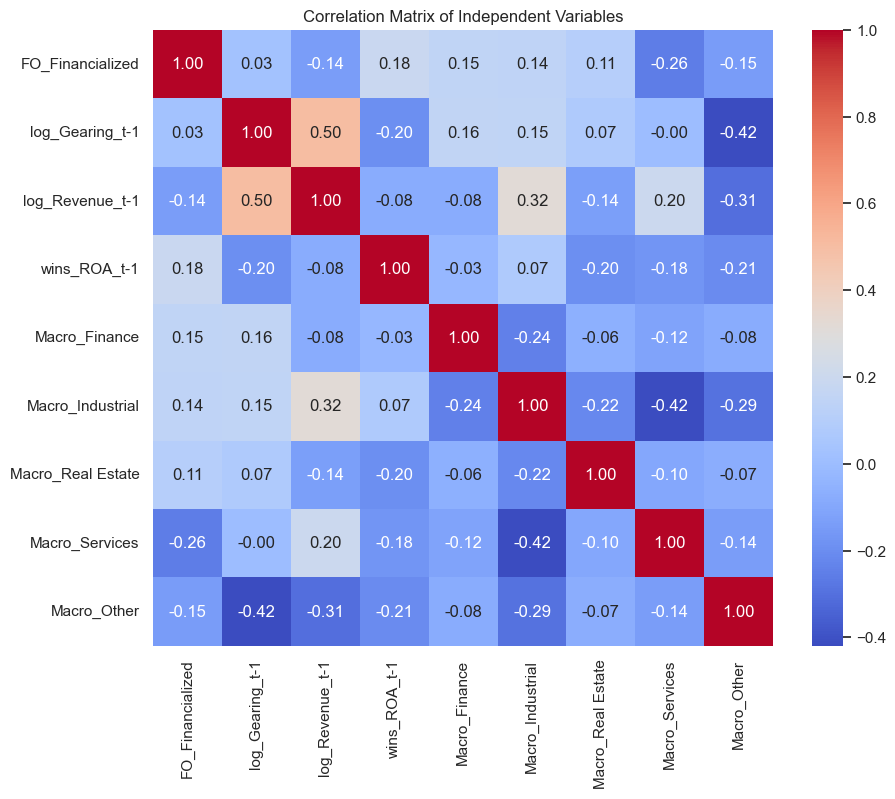

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_vif.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

## Prediction Accuracy and Classification Metrics

In [168]:
# Predict probabilities and labels
y_pred_prob = logit_model.predict(X)
y_pred_label = (y_pred_prob > 0.5).astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y, y_pred_label))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_label))

# AUC
print("AUC Score:", roc_auc_score(y, y_pred_prob))

Accuracy: 0.7088607594936709
Confusion Matrix:
 [[27 12]
 [11 29]]
AUC Score: 0.7272435897435897


In [169]:
print(classification_report(y, y_pred_label))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        39
           1       0.71      0.72      0.72        40

    accuracy                           0.71        79
   macro avg       0.71      0.71      0.71        79
weighted avg       0.71      0.71      0.71        79



## Residual Analysis

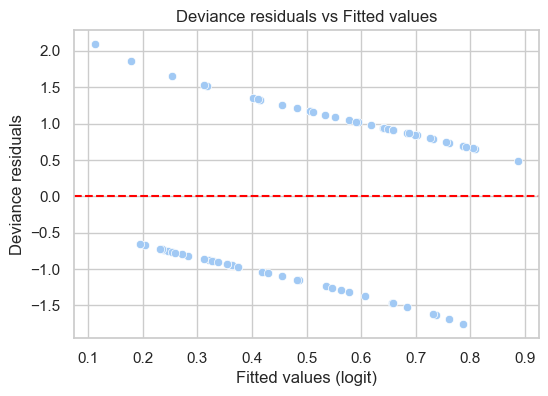

In [170]:
# Generalized Linear Model (GLM) with Binomial family
glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Deviance residuals vs fitted values
resid_dev = glm_results.resid_deviance
fitted_vals = glm_results.fittedvalues

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted_vals, y=resid_dev)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted values (logit)")
plt.ylabel("Deviance residuals")
plt.title("Deviance residuals vs Fitted values")
plt.show()

## Influence and Outlier Diagnostics

C:\Users\stesi\AppData\Local\Temp\ipykernel_140976\2377575471.py:5: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



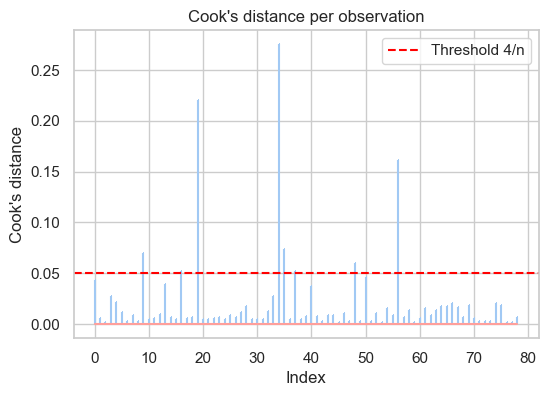

In [171]:
# Cook's Distance
influence = glm_results.get_influence()
cooks_d = influence.cooks_distance[0]
plt.figure(figsize=(6,4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Cook's distance per observation")
plt.xlabel("Index")
plt.ylabel("Cook's distance")
plt.axhline(4/len(cooks_d), color='red', linestyle='--', label='Threshold 4/n')
plt.legend()
plt.show()

## ROC Curve and Discriminatory Power

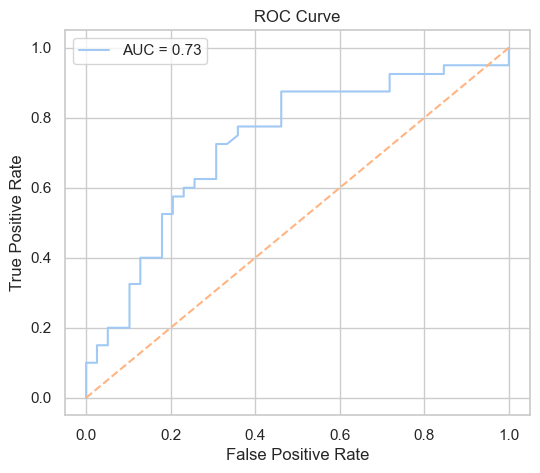

In [172]:
# ROC Curve + AUC

y_pred = glm_results.predict()
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<br>

# H3-bis: Likelihood of Pursuing Majority vs Minority Stakes

## Classification of Deals Into Majority and Minority Control

In [173]:
# Classify deals into Majority / Minority

def classify_control_type(deal_type):
    majority = [
        "Acquisition", "Institutional Buyout", "Leveraged Buyout", "Acquisition Increased"
    ]
    minority = [
        "Minority Stake", "Share Placement", "Stock Swap", "Privately Negotiated"
    ]
    if deal_type in majority:
        return "Majority"
    elif deal_type in minority:
        return "Minority"
    else:
        return "Other"

df_h3 = fo_df.copy()
df_h3["CONTROL_TYPE"] = df_h3["Deal Type Category_D"].apply(classify_control_type)

In [174]:
# Filter to include only Majority and Minority deals

df_h3 = df_h3[df_h3["CONTROL_TYPE"].isin(["Majority", "Minority"])]

## Percentage and Count Tables by FO Type

In [175]:
# Share of Majority/Minority deals by acquiror type (in %)
control_pct = pd.crosstab(df_h3["TYPE_A"],
                          df_h3["CONTROL_TYPE"],
                          normalize="index") * 100

# Raw counts for chi-squared test
control_counts = pd.crosstab(df_h3["TYPE_A"],
                             df_h3["CONTROL_TYPE"])


In [176]:
control_pct

CONTROL_TYPE                     Majority   Minority
TYPE_A                                              
FO (Co-existing core business)  80.392157  19.607843
FO (Financialized family)       66.037736  33.962264

In [177]:
control_counts

CONTROL_TYPE                    Majority  Minority
TYPE_A                                            
FO (Co-existing core business)        41        10
FO (Financialized family)             35        18

## Chi-Squared Independence Test

In [178]:
chi2, p, dof, expected = chi2_contingency(control_counts)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 2.04124072667796
p-value: 0.15308473828838556
Degrees of freedom: 1
Expected frequencies:
 [[37.26923077 13.73076923]
 [38.73076923 14.26923077]]


## Visualization of Majority vs Minority Control by FO Type

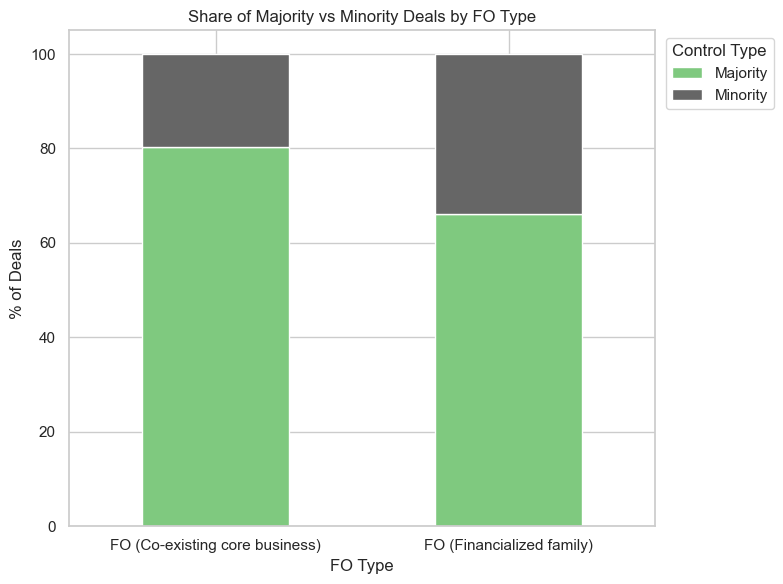

In [179]:
# Plot stacked bar chart

ax = control_pct.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="Accent")
plt.title("Share of Majority vs Minority Deals by FO Type")
plt.ylabel("% of Deals")
plt.xlabel("FO Type")
plt.xticks(rotation=0)
plt.legend(title="Control Type", bbox_to_anchor=(1.005, 1), loc='upper left')
plt.tight_layout()
plt.show()